In [45]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df_sourceData_01 = pd.read_csv('./现病史20190114内蒙古100患者.csv')
print(df_sourceData_01.info())
df_sourceData_01.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
SEQ_ID            1000 non-null int64
PATIENT_ID        1000 non-null int64
PATIENT_NO        1000 non-null object
INPATIENT_NO      1000 non-null int64
INDEX2            0 non-null float64
PARENTNODENAME    1000 non-null object
SOURCEDATA        1000 non-null object
NODENAME          1000 non-null object
NODEVALUE         1000 non-null object
HOSPITAL_CODE     1000 non-null object
dtypes: float64(1), int64(3), object(6)
memory usage: 78.2+ KB
None


SEQ_ID  PATIENT_ID PATIENT_NO  INPATIENT_NO  INDEX2 PARENTNODENAME  \
0  12409215      617387   10036263        722318     NaN       住院病历\现病史   
1  12409215      617387   10036263        722318     NaN       住院病历\现病史   
2  12409215      617387   10036263        722318     NaN       住院病历\现病史   
3  12409215      617387   10036263        722318     NaN       住院病历\现病史   
4  12409215      617387   10036263        722318     NaN       住院病历\现病史   

                                          SOURCEDATA     NODENAME NODEVALUE  \
0  患者5年前开始反复出现咳嗽、咳痰，白痰，伴气短，有时喘息，多于受凉后出现，就诊于当地卫生院给...     经常咳嗽_稳定期         有   
1  患者5年前开始反复出现咳嗽、咳痰，白痰，伴气短，有时喘息，多于受凉后出现，就诊于当地卫生院给...    双下肢水肿_加重期       未提及   
2  患者5年前开始反复出现咳嗽、咳痰，白痰，伴气短，有时喘息，多于受凉后出现，就诊于当地卫生院给...     经常胸闷_稳定期       未提及   
3  患者5年前开始反复出现咳嗽、咳痰，白痰，伴气短，有时喘息，多于受凉后出现，就诊于当地卫生院给...  经常活动后气促_稳定期       未提及   
4  患者5年前开始反复出现咳嗽、咳痰，白痰，伴气短，有时喘息，多于受凉后出现，就诊于当地卫生院给...     经常咳痰_稳定期         有   

        HOSPITAL_CODE  
0  12150000460028258G  
1  12150000460028258G  
2  12150000460028258G  
3  12150000460028258G  
4  12150000460028258G

In [3]:
df_sourceData_02 = pd.read_csv('./深圳现病史.csv')
print(df_sourceData_02.info())
df_sourceData_02.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 10 columns):
SEQ_ID            1008 non-null int64
PATIENT_ID        544 non-null object
PATIENT_NO        1008 non-null object
INPATIENT_NO      1008 non-null int64
INDEX2            1008 non-null object
PARENTNODENAME    1008 non-null object
SOURCEDATA        1008 non-null object
NODENAME          1008 non-null object
NODEVALUE         1008 non-null object
HOSPITAL_CODE     1000 non-null float64
dtypes: float64(1), int64(2), object(7)
memory usage: 78.8+ KB
None


SEQ_ID PATIENT_ID                        PATIENT_NO  INPATIENT_NO INDEX2  \
0  731177        NaN  3F2DF800C38BE92687B4D5EA9F207C52       1074211    陈锦欢   
1  731177        NaN  3F2DF800C38BE92687B4D5EA9F207C52       1074211    陈锦欢   
2  731177        NaN  3F2DF800C38BE92687B4D5EA9F207C52       1074211    陈锦欢   
3  731177        NaN  3F2DF800C38BE92687B4D5EA9F207C52       1074211    陈锦欢   
4  731177        NaN  3F2DF800C38BE92687B4D5EA9F207C52       1074211    陈锦欢   

  PARENTNODENAME                                         SOURCEDATA  \
0    入院记录\病史\现病史  患者1天前摔致右侧胸痛、气促，为持续性钝痛，偶有阵发性咳嗽，痰较多，无明显呼吸困难，无头痛、...   
1    入院记录\病史\现病史  患者1天前摔致右侧胸痛、气促，为持续性钝痛，偶有阵发性咳嗽，痰较多，无明显呼吸困难，无头痛、...   
2    入院记录\病史\现病史  患者1天前摔致右侧胸痛、气促，为持续性钝痛，偶有阵发性咳嗽，痰较多，无明显呼吸困难，无头痛、...   
3    入院记录\病史\现病史  患者1天前摔致右侧胸痛、气促，为持续性钝痛，偶有阵发性咳嗽，痰较多，无明显呼吸困难，无头痛、...   
4    入院记录\病史\现病史  患者1天前摔致右侧胸痛、气促，为持续性钝痛，偶有阵发性咳嗽，痰较多，无明显呼吸困难，无头痛、...   

      NODENAME NODEVALUE  HOSPITAL_CODE  
0     经常咳嗽_稳定期       未提及   1.240000e+17  
1     经常喘息_稳定期       未提及   1.240000e+17  
2     经常胸闷_稳定期       未提及   1.240000e+17  
3  经常活动后气促_稳定期       未提及   1.240000e+17  
4     经常咳痰_稳定期       未提及   1.240000e+17

In [4]:
df_sourceData = pd.concat([df_sourceData_01, df_sourceData_02], axis=0)
print(df_sourceData.info())
print(df_sourceData.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 0 to 1007
Data columns (total 10 columns):
SEQ_ID            2008 non-null int64
PATIENT_ID        1544 non-null object
PATIENT_NO        2008 non-null object
INPATIENT_NO      2008 non-null int64
INDEX2            1008 non-null object
PARENTNODENAME    2008 non-null object
SOURCEDATA        2008 non-null object
NODENAME          2008 non-null object
NODEVALUE         2008 non-null object
HOSPITAL_CODE     2000 non-null object
dtypes: int64(2), object(8)
memory usage: 172.6+ KB
None
     SEQ_ID PATIENT_ID PATIENT_NO  INPATIENT_NO INDEX2 PARENTNODENAME  \
0  12409215     617387   10036263        722318    NaN       住院病历\现病史   
1  12409215     617387   10036263        722318    NaN       住院病历\现病史   
2  12409215     617387   10036263        722318    NaN       住院病历\现病史   
3  12409215     617387   10036263        722318    NaN       住院病历\现病史   
4  12409215     617387   10036263        722318    NaN       住院病历\现病史   

         

In [5]:
df_sourceData_withFullFeature = df_sourceData.groupby('SOURCEDATA').filter(lambda x:len(x) == 16)
print(df_sourceData_withFullFeature.info())
print(df_sourceData_withFullFeature.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1936 entries, 0 to 1007
Data columns (total 10 columns):
SEQ_ID            1936 non-null int64
PATIENT_ID        1472 non-null object
PATIENT_NO        1936 non-null object
INPATIENT_NO      1936 non-null int64
INDEX2            1008 non-null object
PARENTNODENAME    1936 non-null object
SOURCEDATA        1936 non-null object
NODENAME          1936 non-null object
NODEVALUE         1936 non-null object
HOSPITAL_CODE     1928 non-null object
dtypes: int64(2), object(8)
memory usage: 166.4+ KB
None
     SEQ_ID PATIENT_ID PATIENT_NO  INPATIENT_NO INDEX2 PARENTNODENAME  \
0  12409215     617387   10036263        722318    NaN       住院病历\现病史   
1  12409215     617387   10036263        722318    NaN       住院病历\现病史   
2  12409215     617387   10036263        722318    NaN       住院病历\现病史   
3  12409215     617387   10036263        722318    NaN       住院病历\现病史   
4  12409215     617387   10036263        722318    NaN       住院病历\现病史   

         

In [6]:
df_groupByIPNO = df_sourceData_withFullFeature.groupby('SOURCEDATA')
print(df_groupByIPNO.groups)

{'2天前，患者受凉感冒后出现咳嗽、咳痰，痰液粘稠，不易咳出，无咯血、痰中带血，无发热，无潮热、盗汗、消瘦，无恶心、反酸、烧心，无鼻后滴流感，无气短、胸闷、呼吸困难，无心悸、胸闷、气促，无夜间阵发性呼吸困难，自服药物未见好转。今日来我院门诊肺部CT示1、右侧第6-10肋骨骨折。2、两肺上叶肺气肿。3、右侧少量胸腔积液。4、主动脉及两侧冠状动脉硬化。收入我科治疗，起病以来，精神、睡眠、饮食可，大小便未见明显异常，体重无明显改变。。起病以来，患者睡眠、食欲稍差，大便正常。患者约1周前肋骨骨折。': Int64Index([864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876,
            877, 878, 879],
           dtype='int64'), '4年前，患者受凉后出现咳嗽、咳痰，活动时气喘、气短不适，休息后稍好转，我科住院诊断COPD，经治疗好转。后多于受凉感冒，天气变化时上述症状再发。病程中无明显活动受限，无双下肢水肿，无夜间阵发性呼吸困难。10天前受凉后上述症状再发，咳嗽，咳黄绿色粘痰，伴胸痛，咳嗽、活动时加重，无咯血、痰中带血，无心悸、胸闷，无发热，活动时感气短不适。院外治疗未见好转，具体用药不详。为求进一步诊治收入。': Int64Index([416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428,
            429, 430, 431],
           dtype='int64'), '半月前，患者受凉感冒后出现咳嗽、咳痰，痰液较少，易咳出，伴活动时气短、胸闷，无咯血、痰中带血，无发热，无潮热、盗汗、消瘦，无恶心、反酸、烧心，无鼻后滴流感，无气短、胸闷、呼吸困难，无心悸、气促，无夜间阵发性呼吸困难，自服药物未见好转。今日来我院门诊胸片示右下肺感染，收入我科治疗，起病以来，精神、睡眠、饮食可，大小便未见明显异常，体重无明显改变。': Int64Index([592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604,
            605, 606, 607],
       

In [7]:
list_NODENAME = df_sourceData_withFullFeature[['NODENAME']].drop_duplicates()
list_NODENAME = list(list_NODENAME['NODENAME'])
print(list_NODENAME)

['经常咳嗽_稳定期', '双下肢水肿_加重期', '经常胸闷_稳定期', '经常活动后气促_稳定期', '经常咳痰_稳定期', '咳嗽_加重期', '咳痰_加重期', '胸闷_加重期', '喘息_加重期', '气促_加重期', '咯血_加重期', '发热_加重期', '胸痛_加重期', '心悸_加重期', '夜间阵发性呼吸困难_加重期', '经常喘息_稳定期']


In [8]:
list_NODEVALUE = df_sourceData_withFullFeature[['NODEVALUE']].drop_duplicates()
list_NODEVALUE = list(list_NODEVALUE['NODEVALUE'])
temp = list_NODEVALUE[1]
list_NODEVALUE[1] = list_NODEVALUE[2]
list_NODEVALUE[2] = temp
print(list_NODEVALUE)

['有', '无', '未提及']


In [9]:
def getLabelByGroup(group):
    label = [0]*(len(list_NODENAME)*len(list_NODEVALUE))
    for index, row in group.iterrows():
        name = row['NODENAME']
        nameIndex = list_NODENAME.index(name)
        value = row['NODEVALUE']
        valueIndex = list_NODEVALUE.index(value)
        labelIndex = len(list_NODEVALUE)*nameIndex+valueIndex
        label[labelIndex] = 1
        
    return label

In [10]:
list_NodeText = []
matrix_label = []
for name,group in df_groupByIPNO:
    list_NodeText.append(name)
    label = getLabelByGroup(group)
    matrix_label.append(label)
    

print(list_NodeText[:3])
print(matrix_label[:3])

['2天前，患者受凉感冒后出现咳嗽、咳痰，痰液粘稠，不易咳出，无咯血、痰中带血，无发热，无潮热、盗汗、消瘦，无恶心、反酸、烧心，无鼻后滴流感，无气短、胸闷、呼吸困难，无心悸、胸闷、气促，无夜间阵发性呼吸困难，自服药物未见好转。今日来我院门诊肺部CT示1、右侧第6-10肋骨骨折。2、两肺上叶肺气肿。3、右侧少量胸腔积液。4、主动脉及两侧冠状动脉硬化。收入我科治疗，起病以来，精神、睡眠、饮食可，大小便未见明显异常，体重无明显改变。。起病以来，患者睡眠、食欲稍差，大便正常。患者约1周前肋骨骨折。', '4年前，患者受凉后出现咳嗽、咳痰，活动时气喘、气短不适，休息后稍好转，我科住院诊断COPD，经治疗好转。后多于受凉感冒，天气变化时上述症状再发。病程中无明显活动受限，无双下肢水肿，无夜间阵发性呼吸困难。10天前受凉后上述症状再发，咳嗽，咳黄绿色粘痰，伴胸痛，咳嗽、活动时加重，无咯血、痰中带血，无心悸、胸闷，无发热，活动时感气短不适。院外治疗未见好转，具体用药不详。为求进一步诊治收入。', '半月前，患者受凉感冒后出现咳嗽、咳痰，痰液较少，易咳出，伴活动时气短、胸闷，无咯血、痰中带血，无发热，无潮热、盗汗、消瘦，无恶心、反酸、烧心，无鼻后滴流感，无气短、胸闷、呼吸困难，无心悸、气促，无夜间阵发性呼吸困难，自服药物未见好转。今日来我院门诊胸片示右下肺感染，收入我科治疗，起病以来，精神、睡眠、饮食可，大小便未见明显异常，体重无明显改变。']
[[0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1], [1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0], [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0

In [79]:
# from bert_serving.client import BertClient
# bc = BertClient(ip='localhost') 

In [80]:
# list_vecOfNodeText = bc.encode(list_NodeText)

# print(len(list_vecOfNodeText))
# print(len(list_vecOfNodeText[0]))
# print(list_vecOfNodeText[:5])

# import pickle
# file = open('list_vecOfNodeText.pkl','wb')
# pickle.dump(list_vecOfNodeText, file)
# file.close()

121
768
[[ 0.8453089  -0.39730355 -0.34256735 ...  0.55657053 -0.35914582
   0.3399743 ]
 [ 0.7569292  -0.237311   -0.19121414 ...  0.26455134 -0.17406131
   0.23887676]
 [ 0.53377724 -0.28528413 -0.3709756  ...  0.5838953  -0.38493901
   0.4552007 ]
 [ 0.49889338 -0.18010922  0.05094082 ...  0.30012956 -0.31746316
   0.35076818]
 [ 0.5720918  -0.15788887 -0.07993508 ...  0.27482608  0.14874916
   0.3781162 ]]


In [11]:
import pickle

with open('list_vecOfNodeText.pkl','rb') as file:
    list_vecOfNodeText = pickle.load(file)
    
print(len(list_vecOfNodeText))
print(len(list_vecOfNodeText[0]))
print(list_vecOfNodeText[:5])

121
768
[[ 0.8453089  -0.39730355 -0.34256735 ...  0.55657053 -0.35914582
   0.3399743 ]
 [ 0.7569292  -0.237311   -0.19121414 ...  0.26455134 -0.17406131
   0.23887676]
 [ 0.53377724 -0.28528413 -0.3709756  ...  0.5838953  -0.38493901
   0.4552007 ]
 [ 0.49889338 -0.18010922  0.05094082 ...  0.30012956 -0.31746316
   0.35076818]
 [ 0.5720918  -0.15788887 -0.07993508 ...  0.27482608  0.14874916
   0.3781162 ]]


In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

model = Sequential()
model.add(Dense(units=256, activation='relu', input_dim=len(list_vecOfNodeText[0])))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=len(list_NODENAME)*len(list_NODEVALUE), activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               196864    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 48)                3120      
Total params: 241,136
Trainable params: 241,136
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
check_point = keras.callbacks.ModelCheckpoint('./CheckPoint/extract_feature_model_checkpoint.hdf5', monitor='val_loss', verbose=0, 
                                              save_best_only=True, save_weights_only=False, mode='auto', period=1)
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3000, verbose=0,
                              mode='auto', baseline=None, restore_best_weights=True)
callbacks = [check_point, early_stop]

model.fit(np.array(list_vecOfNodeText), np.array(matrix_label), epochs=10000, batch_size=32,callbacks=callbacks, validation_split=0.5)

Train on 60 samples, validate on 61 samples
Epoch 1/10000
60/60 [==============================] - 0s 7ms/step - loss: 61.4606 - acc: 0.0000e+00 - val_loss: 60.4418 - val_acc: 0.0000e+00
Epoch 2/10000
60/60 [==============================] - 0s 211us/step - loss: 59.7286 - acc: 0.0000e+00 - val_loss: 59.7303 - val_acc: 0.0000e+00
Epoch 3/10000
60/60 [==============================] - 0s 255us/step - loss: 58.8080 - acc: 0.0000e+00 - val_loss: 59.0375 - val_acc: 0.0000e+00
Epoch 4/10000
60/60 [==============================] - 0s 237us/step - loss: 58.1917 - acc: 0.0000e+00 - val_loss: 58.8115 - val_acc: 0.0000e+00
Epoch 5/10000
60/60 [==============================] - 0s 226us/step - loss: 57.8745 - acc: 0.0000e+00 - val_loss: 58.2739 - val_acc: 0.0000e+00
Epoch 6/10000
60/60 [==============================] - 0s 228us/step - loss: 57.4947 - acc: 0.0000e+00 - val_loss: 58.3089 - val_acc: 0.0000e+00
Epoch 7/10000
60/60 [==============================] - 0s 271us/step - loss: 57.1012 - a

Epoch 58/10000
60/60 [==============================] - 0s 344us/step - loss: 52.2907 - acc: 0.1667 - val_loss: 58.1637 - val_acc: 0.0820
Epoch 59/10000
60/60 [==============================] - 0s 239us/step - loss: 52.0915 - acc: 0.1500 - val_loss: 58.8216 - val_acc: 0.0328
Epoch 60/10000
60/60 [==============================] - 0s 310us/step - loss: 52.2355 - acc: 0.1000 - val_loss: 60.1768 - val_acc: 0.0000e+00
Epoch 61/10000
60/60 [==============================] - 0s 272us/step - loss: 53.2627 - acc: 0.1000 - val_loss: 59.6469 - val_acc: 0.0328
Epoch 62/10000
60/60 [==============================] - 0s 305us/step - loss: 52.3840 - acc: 0.0500 - val_loss: 59.5589 - val_acc: 0.0328
Epoch 63/10000
60/60 [==============================] - 0s 289us/step - loss: 52.1586 - acc: 0.1500 - val_loss: 59.1366 - val_acc: 0.1311
Epoch 64/10000
60/60 [==============================] - 0s 303us/step - loss: 51.8151 - acc: 0.0667 - val_loss: 58.3101 - val_acc: 0.2295
Epoch 65/10000
60/60 [========

Epoch 117/10000
60/60 [==============================] - 0s 268us/step - loss: 49.2054 - acc: 0.0500 - val_loss: 62.8826 - val_acc: 0.0164
Epoch 118/10000
60/60 [==============================] - 0s 245us/step - loss: 50.1462 - acc: 0.0500 - val_loss: 62.9141 - val_acc: 0.0328
Epoch 119/10000
60/60 [==============================] - 0s 220us/step - loss: 49.7105 - acc: 0.0333 - val_loss: 63.3021 - val_acc: 0.0164
Epoch 120/10000
60/60 [==============================] - 0s 300us/step - loss: 49.4128 - acc: 0.0833 - val_loss: 65.3984 - val_acc: 0.0820
Epoch 121/10000
60/60 [==============================] - 0s 310us/step - loss: 49.8573 - acc: 0.1333 - val_loss: 63.2264 - val_acc: 0.0164
Epoch 122/10000
60/60 [==============================] - 0s 271us/step - loss: 49.5632 - acc: 0.0500 - val_loss: 62.7983 - val_acc: 0.0328
Epoch 123/10000
60/60 [==============================] - 0s 303us/step - loss: 49.2876 - acc: 0.0667 - val_loss: 63.6050 - val_acc: 0.0164
Epoch 124/10000
60/60 [====

Epoch 176/10000
60/60 [==============================] - 0s 248us/step - loss: 47.1367 - acc: 0.0667 - val_loss: 67.4413 - val_acc: 0.1311
Epoch 177/10000
60/60 [==============================] - 0s 280us/step - loss: 46.9721 - acc: 0.1167 - val_loss: 68.9813 - val_acc: 0.0820
Epoch 178/10000
60/60 [==============================] - 0s 244us/step - loss: 48.2048 - acc: 0.1000 - val_loss: 66.6969 - val_acc: 0.0164
Epoch 179/10000
60/60 [==============================] - 0s 310us/step - loss: 47.4665 - acc: 0.1500 - val_loss: 65.9949 - val_acc: 0.0984
Epoch 180/10000
60/60 [==============================] - 0s 320us/step - loss: 47.2787 - acc: 0.1333 - val_loss: 65.5573 - val_acc: 0.1475
Epoch 181/10000
60/60 [==============================] - 0s 353us/step - loss: 48.0646 - acc: 0.0833 - val_loss: 65.3479 - val_acc: 0.2131
Epoch 182/10000
60/60 [==============================] - 0s 282us/step - loss: 47.6993 - acc: 0.1500 - val_loss: 66.5824 - val_acc: 0.1311
Epoch 183/10000
60/60 [====

Epoch 235/10000
60/60 [==============================] - 0s 280us/step - loss: 46.6716 - acc: 0.1167 - val_loss: 70.8055 - val_acc: 0.1311
Epoch 236/10000
60/60 [==============================] - 0s 304us/step - loss: 46.5874 - acc: 0.1667 - val_loss: 71.8348 - val_acc: 0.0820
Epoch 237/10000
60/60 [==============================] - 0s 225us/step - loss: 46.1563 - acc: 0.1500 - val_loss: 72.4907 - val_acc: 0.1639
Epoch 238/10000
60/60 [==============================] - 0s 279us/step - loss: 45.8331 - acc: 0.2000 - val_loss: 74.1645 - val_acc: 0.1475
Epoch 239/10000
60/60 [==============================] - 0s 278us/step - loss: 45.9661 - acc: 0.1667 - val_loss: 75.1286 - val_acc: 0.1311
Epoch 240/10000
60/60 [==============================] - 0s 282us/step - loss: 46.2671 - acc: 0.1667 - val_loss: 75.2127 - val_acc: 0.1311
Epoch 241/10000
60/60 [==============================] - 0s 287us/step - loss: 46.6965 - acc: 0.1000 - val_loss: 72.4125 - val_acc: 0.1639
Epoch 242/10000
60/60 [====

Epoch 294/10000
60/60 [==============================] - 0s 278us/step - loss: 46.4041 - acc: 0.1667 - val_loss: 78.7595 - val_acc: 0.0492
Epoch 295/10000
60/60 [==============================] - 0s 252us/step - loss: 46.3973 - acc: 0.2500 - val_loss: 77.7900 - val_acc: 0.1311
Epoch 296/10000
60/60 [==============================] - 0s 271us/step - loss: 45.3997 - acc: 0.1667 - val_loss: 75.7492 - val_acc: 0.2131
Epoch 297/10000
60/60 [==============================] - 0s 244us/step - loss: 45.1855 - acc: 0.1833 - val_loss: 77.9966 - val_acc: 0.1967
Epoch 298/10000
60/60 [==============================] - 0s 281us/step - loss: 45.2820 - acc: 0.2000 - val_loss: 78.4283 - val_acc: 0.2459
Epoch 299/10000
60/60 [==============================] - 0s 246us/step - loss: 45.4655 - acc: 0.1667 - val_loss: 78.5077 - val_acc: 0.2459
Epoch 300/10000
60/60 [==============================] - 0s 292us/step - loss: 45.1289 - acc: 0.1500 - val_loss: 77.6972 - val_acc: 0.1967
Epoch 301/10000
60/60 [====

Epoch 353/10000
60/60 [==============================] - 0s 207us/step - loss: 44.8644 - acc: 0.1333 - val_loss: 81.5192 - val_acc: 0.1475
Epoch 354/10000
60/60 [==============================] - 0s 260us/step - loss: 44.8391 - acc: 0.1167 - val_loss: 83.2465 - val_acc: 0.2295
Epoch 355/10000
60/60 [==============================] - 0s 269us/step - loss: 44.8150 - acc: 0.1333 - val_loss: 82.8017 - val_acc: 0.1639
Epoch 356/10000
60/60 [==============================] - 0s 242us/step - loss: 44.7956 - acc: 0.1167 - val_loss: 82.7454 - val_acc: 0.1967
Epoch 357/10000
60/60 [==============================] - 0s 255us/step - loss: 44.9815 - acc: 0.1500 - val_loss: 83.8126 - val_acc: 0.1967
Epoch 358/10000
60/60 [==============================] - 0s 273us/step - loss: 47.2754 - acc: 0.1167 - val_loss: 78.3654 - val_acc: 0.2131
Epoch 359/10000
60/60 [==============================] - 0s 316us/step - loss: 45.9043 - acc: 0.1667 - val_loss: 79.3141 - val_acc: 0.1967
Epoch 360/10000
60/60 [====

Epoch 412/10000
60/60 [==============================] - 0s 264us/step - loss: 45.3387 - acc: 0.1833 - val_loss: 81.6290 - val_acc: 0.1967
Epoch 413/10000
60/60 [==============================] - 0s 232us/step - loss: 44.7651 - acc: 0.1167 - val_loss: 84.4056 - val_acc: 0.2295
Epoch 414/10000
60/60 [==============================] - 0s 258us/step - loss: 44.7119 - acc: 0.1167 - val_loss: 85.2878 - val_acc: 0.2295
Epoch 415/10000
60/60 [==============================] - 0s 303us/step - loss: 44.6583 - acc: 0.1333 - val_loss: 84.8196 - val_acc: 0.2131
Epoch 416/10000
60/60 [==============================] - 0s 288us/step - loss: 44.6586 - acc: 0.1000 - val_loss: 86.6723 - val_acc: 0.2623
Epoch 417/10000
60/60 [==============================] - 0s 279us/step - loss: 44.7431 - acc: 0.1167 - val_loss: 86.5392 - val_acc: 0.2623
Epoch 418/10000
60/60 [==============================] - 0s 279us/step - loss: 44.6484 - acc: 0.1167 - val_loss: 85.9714 - val_acc: 0.1967
Epoch 419/10000
60/60 [====

Epoch 471/10000
60/60 [==============================] - 0s 295us/step - loss: 44.8042 - acc: 0.1500 - val_loss: 83.7031 - val_acc: 0.1639
Epoch 472/10000
60/60 [==============================] - 0s 238us/step - loss: 44.6703 - acc: 0.1500 - val_loss: 85.0029 - val_acc: 0.1803
Epoch 473/10000
60/60 [==============================] - 0s 266us/step - loss: 44.6240 - acc: 0.1667 - val_loss: 85.5364 - val_acc: 0.1639
Epoch 474/10000
60/60 [==============================] - 0s 257us/step - loss: 44.5962 - acc: 0.1500 - val_loss: 86.5212 - val_acc: 0.1639
Epoch 475/10000
60/60 [==============================] - 0s 299us/step - loss: 44.6058 - acc: 0.1667 - val_loss: 86.4560 - val_acc: 0.1475
Epoch 476/10000
60/60 [==============================] - 0s 310us/step - loss: 44.6165 - acc: 0.1167 - val_loss: 88.3174 - val_acc: 0.2295
Epoch 477/10000
60/60 [==============================] - 0s 343us/step - loss: 44.6002 - acc: 0.1500 - val_loss: 86.7968 - val_acc: 0.1803
Epoch 478/10000
60/60 [====

Epoch 530/10000
60/60 [==============================] - 0s 260us/step - loss: 44.6317 - acc: 0.1500 - val_loss: 89.2091 - val_acc: 0.1967
Epoch 531/10000
60/60 [==============================] - 0s 259us/step - loss: 44.5966 - acc: 0.1500 - val_loss: 89.7807 - val_acc: 0.2459
Epoch 532/10000
60/60 [==============================] - 0s 246us/step - loss: 44.5345 - acc: 0.1167 - val_loss: 89.6954 - val_acc: 0.2131
Epoch 533/10000
60/60 [==============================] - 0s 332us/step - loss: 44.5878 - acc: 0.1500 - val_loss: 89.1581 - val_acc: 0.1967
Epoch 534/10000
60/60 [==============================] - 0s 276us/step - loss: 44.5703 - acc: 0.1333 - val_loss: 91.9315 - val_acc: 0.2295
Epoch 535/10000
60/60 [==============================] - 0s 234us/step - loss: 44.5351 - acc: 0.1500 - val_loss: 89.9014 - val_acc: 0.1967
Epoch 536/10000
60/60 [==============================] - 0s 215us/step - loss: 44.5309 - acc: 0.1333 - val_loss: 92.2355 - val_acc: 0.2295
Epoch 537/10000
60/60 [====

Epoch 589/10000
60/60 [==============================] - 0s 270us/step - loss: 44.4601 - acc: 0.1667 - val_loss: 91.7179 - val_acc: 0.2131
Epoch 590/10000
60/60 [==============================] - 0s 236us/step - loss: 44.4536 - acc: 0.1667 - val_loss: 92.0538 - val_acc: 0.2459
Epoch 591/10000
60/60 [==============================] - 0s 259us/step - loss: 44.4522 - acc: 0.1667 - val_loss: 92.2996 - val_acc: 0.2295
Epoch 592/10000
60/60 [==============================] - 0s 302us/step - loss: 44.4551 - acc: 0.1667 - val_loss: 92.3373 - val_acc: 0.2459
Epoch 593/10000
60/60 [==============================] - 0s 272us/step - loss: 44.4538 - acc: 0.1833 - val_loss: 92.5512 - val_acc: 0.2459
Epoch 594/10000
60/60 [==============================] - 0s 263us/step - loss: 44.5445 - acc: 0.1500 - val_loss: 94.8281 - val_acc: 0.1311
Epoch 595/10000
60/60 [==============================] - 0s 267us/step - loss: 46.3390 - acc: 0.1000 - val_loss: 98.5315 - val_acc: 0.1148
Epoch 596/10000
60/60 [====

Epoch 648/10000
60/60 [==============================] - 0s 301us/step - loss: 44.4507 - acc: 0.1833 - val_loss: 90.4956 - val_acc: 0.2295
Epoch 649/10000
60/60 [==============================] - 0s 242us/step - loss: 44.4461 - acc: 0.1667 - val_loss: 90.8178 - val_acc: 0.2295
Epoch 650/10000
60/60 [==============================] - 0s 311us/step - loss: 44.4429 - acc: 0.1833 - val_loss: 91.1894 - val_acc: 0.2295
Epoch 651/10000
60/60 [==============================] - 0s 290us/step - loss: 44.4446 - acc: 0.1667 - val_loss: 91.6469 - val_acc: 0.2295
Epoch 652/10000
60/60 [==============================] - 0s 267us/step - loss: 44.4426 - acc: 0.1833 - val_loss: 91.9143 - val_acc: 0.2295
Epoch 653/10000
60/60 [==============================] - 0s 367us/step - loss: 44.4360 - acc: 0.1833 - val_loss: 92.1926 - val_acc: 0.2295
Epoch 654/10000
60/60 [==============================] - 0s 362us/step - loss: 44.4406 - acc: 0.2000 - val_loss: 92.5204 - val_acc: 0.2623
Epoch 655/10000
60/60 [====

Epoch 707/10000
60/60 [==============================] - 0s 264us/step - loss: 44.4351 - acc: 0.1500 - val_loss: 92.0964 - val_acc: 0.1639
Epoch 708/10000
60/60 [==============================] - 0s 270us/step - loss: 44.4235 - acc: 0.1333 - val_loss: 92.4488 - val_acc: 0.1639
Epoch 709/10000
60/60 [==============================] - 0s 309us/step - loss: 44.4183 - acc: 0.1333 - val_loss: 92.7888 - val_acc: 0.1639
Epoch 710/10000
60/60 [==============================] - 0s 268us/step - loss: 44.4167 - acc: 0.1333 - val_loss: 93.2087 - val_acc: 0.1639
Epoch 711/10000
60/60 [==============================] - 0s 290us/step - loss: 44.4130 - acc: 0.1333 - val_loss: 93.5545 - val_acc: 0.1639
Epoch 712/10000
60/60 [==============================] - 0s 268us/step - loss: 44.4111 - acc: 0.1333 - val_loss: 93.9040 - val_acc: 0.1639
Epoch 713/10000
60/60 [==============================] - 0s 305us/step - loss: 44.4112 - acc: 0.1333 - val_loss: 94.2066 - val_acc: 0.1967
Epoch 714/10000
60/60 [====

Epoch 766/10000
60/60 [==============================] - 0s 321us/step - loss: 44.9230 - acc: 0.1500 - val_loss: 90.7913 - val_acc: 0.1803
Epoch 767/10000
60/60 [==============================] - 0s 281us/step - loss: 44.4721 - acc: 0.1667 - val_loss: 91.0079 - val_acc: 0.1803
Epoch 768/10000
60/60 [==============================] - 0s 242us/step - loss: 44.4350 - acc: 0.1667 - val_loss: 91.5637 - val_acc: 0.1803
Epoch 769/10000
60/60 [==============================] - 0s 323us/step - loss: 44.4227 - acc: 0.1500 - val_loss: 91.9822 - val_acc: 0.1967
Epoch 770/10000
60/60 [==============================] - 0s 321us/step - loss: 44.4162 - acc: 0.1500 - val_loss: 92.4502 - val_acc: 0.1967
Epoch 771/10000
60/60 [==============================] - 0s 332us/step - loss: 44.4124 - acc: 0.1500 - val_loss: 92.8498 - val_acc: 0.1967
Epoch 772/10000
60/60 [==============================] - 0s 296us/step - loss: 44.4090 - acc: 0.1500 - val_loss: 93.1844 - val_acc: 0.1967
Epoch 773/10000
60/60 [====

Epoch 825/10000
60/60 [==============================] - 0s 298us/step - loss: 44.4048 - acc: 0.2000 - val_loss: 93.7762 - val_acc: 0.1967
Epoch 826/10000
60/60 [==============================] - 0s 270us/step - loss: 44.4036 - acc: 0.2000 - val_loss: 94.0300 - val_acc: 0.1967
Epoch 827/10000
60/60 [==============================] - 0s 292us/step - loss: 44.4032 - acc: 0.2000 - val_loss: 94.2747 - val_acc: 0.1967
Epoch 828/10000
60/60 [==============================] - 0s 249us/step - loss: 44.4022 - acc: 0.2000 - val_loss: 94.5100 - val_acc: 0.1967
Epoch 829/10000
60/60 [==============================] - 0s 281us/step - loss: 44.4019 - acc: 0.2000 - val_loss: 94.7538 - val_acc: 0.1967
Epoch 830/10000
60/60 [==============================] - 0s 299us/step - loss: 44.4011 - acc: 0.1833 - val_loss: 94.9893 - val_acc: 0.1967
Epoch 831/10000
60/60 [==============================] - 0s 268us/step - loss: 44.4006 - acc: 0.1833 - val_loss: 95.2412 - val_acc: 0.1967
Epoch 832/10000
60/60 [====

Epoch 884/10000
60/60 [==============================] - 0s 328us/step - loss: 44.3997 - acc: 0.2167 - val_loss: 95.5521 - val_acc: 0.2131
Epoch 885/10000
60/60 [==============================] - 0s 263us/step - loss: 44.3995 - acc: 0.2167 - val_loss: 95.7894 - val_acc: 0.2131
Epoch 886/10000
60/60 [==============================] - 0s 254us/step - loss: 44.3990 - acc: 0.2167 - val_loss: 96.0390 - val_acc: 0.2131
Epoch 887/10000
60/60 [==============================] - 0s 275us/step - loss: 44.3986 - acc: 0.2167 - val_loss: 96.2793 - val_acc: 0.2131
Epoch 888/10000
60/60 [==============================] - 0s 324us/step - loss: 44.3986 - acc: 0.2167 - val_loss: 96.5269 - val_acc: 0.2131
Epoch 889/10000
60/60 [==============================] - 0s 317us/step - loss: 44.3982 - acc: 0.2167 - val_loss: 96.7681 - val_acc: 0.2131
Epoch 890/10000
60/60 [==============================] - 0s 266us/step - loss: 44.3982 - acc: 0.2167 - val_loss: 96.9322 - val_acc: 0.2131
Epoch 891/10000
60/60 [====

Epoch 943/10000
60/60 [==============================] - 0s 296us/step - loss: 44.3995 - acc: 0.2167 - val_loss: 95.6376 - val_acc: 0.2459
Epoch 944/10000
60/60 [==============================] - 0s 244us/step - loss: 44.3991 - acc: 0.2000 - val_loss: 95.8192 - val_acc: 0.2459
Epoch 945/10000
60/60 [==============================] - 0s 277us/step - loss: 44.3987 - acc: 0.2000 - val_loss: 96.0181 - val_acc: 0.2459
Epoch 946/10000
60/60 [==============================] - 0s 251us/step - loss: 44.3984 - acc: 0.2000 - val_loss: 96.1999 - val_acc: 0.2459
Epoch 947/10000
60/60 [==============================] - 0s 268us/step - loss: 44.3980 - acc: 0.2167 - val_loss: 96.3948 - val_acc: 0.2459
Epoch 948/10000
60/60 [==============================] - 0s 292us/step - loss: 44.3977 - acc: 0.2333 - val_loss: 96.5914 - val_acc: 0.2459
Epoch 949/10000
60/60 [==============================] - 0s 303us/step - loss: 44.3975 - acc: 0.2333 - val_loss: 96.7984 - val_acc: 0.2459
Epoch 950/10000
60/60 [====

Epoch 1002/10000
60/60 [==============================] - 0s 312us/step - loss: 44.5374 - acc: 0.2667 - val_loss: 94.2629 - val_acc: 0.2295
Epoch 1003/10000
60/60 [==============================] - 0s 237us/step - loss: 44.4496 - acc: 0.2500 - val_loss: 94.3176 - val_acc: 0.2459
Epoch 1004/10000
60/60 [==============================] - 0s 298us/step - loss: 44.4389 - acc: 0.2500 - val_loss: 94.4686 - val_acc: 0.2459
Epoch 1005/10000
60/60 [==============================] - 0s 273us/step - loss: 44.4281 - acc: 0.2500 - val_loss: 94.6585 - val_acc: 0.2459
Epoch 1006/10000
60/60 [==============================] - 0s 304us/step - loss: 44.4200 - acc: 0.2500 - val_loss: 94.8472 - val_acc: 0.2459
Epoch 1007/10000
60/60 [==============================] - 0s 318us/step - loss: 44.4126 - acc: 0.2500 - val_loss: 95.0569 - val_acc: 0.2459
Epoch 1008/10000
60/60 [==============================] - 0s 329us/step - loss: 44.4051 - acc: 0.2500 - val_loss: 95.2813 - val_acc: 0.2459
Epoch 1009/10000
60/

60/60 [==============================] - 0s 268us/step - loss: 44.3972 - acc: 0.2667 - val_loss: 96.7833 - val_acc: 0.2787
Epoch 1061/10000
60/60 [==============================] - 0s 307us/step - loss: 44.3969 - acc: 0.2667 - val_loss: 96.9610 - val_acc: 0.2787
Epoch 1062/10000
60/60 [==============================] - 0s 281us/step - loss: 44.3967 - acc: 0.2667 - val_loss: 97.1466 - val_acc: 0.2787
Epoch 1063/10000
60/60 [==============================] - 0s 267us/step - loss: 44.3964 - acc: 0.2667 - val_loss: 97.3204 - val_acc: 0.2787
Epoch 1064/10000
60/60 [==============================] - 0s 237us/step - loss: 44.3963 - acc: 0.2500 - val_loss: 97.5038 - val_acc: 0.2787
Epoch 1065/10000
60/60 [==============================] - 0s 264us/step - loss: 44.3961 - acc: 0.2500 - val_loss: 97.7091 - val_acc: 0.2787
Epoch 1066/10000
60/60 [==============================] - 0s 342us/step - loss: 44.3959 - acc: 0.2500 - val_loss: 97.8928 - val_acc: 0.2787
Epoch 1067/10000
60/60 [=============

60/60 [==============================] - 0s 273us/step - loss: 44.3950 - acc: 0.3167 - val_loss: 100.6251 - val_acc: 0.2787
Epoch 1119/10000
60/60 [==============================] - 0s 290us/step - loss: 44.3949 - acc: 0.3167 - val_loss: 100.7356 - val_acc: 0.2951
Epoch 1120/10000
60/60 [==============================] - 0s 259us/step - loss: 44.3948 - acc: 0.3167 - val_loss: 100.9803 - val_acc: 0.2787
Epoch 1121/10000
60/60 [==============================] - 0s 309us/step - loss: 44.3947 - acc: 0.3167 - val_loss: 101.1563 - val_acc: 0.2787
Epoch 1122/10000
60/60 [==============================] - 0s 252us/step - loss: 44.3947 - acc: 0.3167 - val_loss: 101.3385 - val_acc: 0.2787
Epoch 1123/10000
60/60 [==============================] - 0s 266us/step - loss: 44.3946 - acc: 0.3167 - val_loss: 101.5045 - val_acc: 0.2787
Epoch 1124/10000
60/60 [==============================] - 0s 244us/step - loss: 44.3946 - acc: 0.3167 - val_loss: 101.5748 - val_acc: 0.2787
Epoch 1125/10000
60/60 [======

60/60 [==============================] - 0s 264us/step - loss: 44.4131 - acc: 0.2833 - val_loss: 106.5746 - val_acc: 0.3279
Epoch 1177/10000
60/60 [==============================] - 0s 296us/step - loss: 49.1277 - acc: 0.2833 - val_loss: 104.5000 - val_acc: 0.1803
Epoch 1178/10000
60/60 [==============================] - 0s 265us/step - loss: 45.0020 - acc: 0.2333 - val_loss: 97.7742 - val_acc: 0.3279
Epoch 1179/10000
60/60 [==============================] - 0s 263us/step - loss: 44.4113 - acc: 0.3333 - val_loss: 97.9551 - val_acc: 0.3279
Epoch 1180/10000
60/60 [==============================] - 0s 315us/step - loss: 44.4039 - acc: 0.3333 - val_loss: 98.0958 - val_acc: 0.3115
Epoch 1181/10000
60/60 [==============================] - 0s 273us/step - loss: 44.4010 - acc: 0.3333 - val_loss: 98.2526 - val_acc: 0.3279
Epoch 1182/10000
60/60 [==============================] - 0s 296us/step - loss: 44.3997 - acc: 0.3333 - val_loss: 98.4171 - val_acc: 0.3279
Epoch 1183/10000
60/60 [===========

60/60 [==============================] - 0s 246us/step - loss: 44.3977 - acc: 0.3167 - val_loss: 99.3661 - val_acc: 0.2951
Epoch 1235/10000
60/60 [==============================] - 0s 245us/step - loss: 44.3974 - acc: 0.3167 - val_loss: 99.4296 - val_acc: 0.2951
Epoch 1236/10000
60/60 [==============================] - 0s 267us/step - loss: 44.3971 - acc: 0.3167 - val_loss: 99.4923 - val_acc: 0.2951
Epoch 1237/10000
60/60 [==============================] - 0s 298us/step - loss: 44.3969 - acc: 0.3167 - val_loss: 99.5628 - val_acc: 0.2951
Epoch 1238/10000
60/60 [==============================] - 0s 230us/step - loss: 44.3966 - acc: 0.3167 - val_loss: 99.6389 - val_acc: 0.2951
Epoch 1239/10000
60/60 [==============================] - 0s 267us/step - loss: 44.3964 - acc: 0.3167 - val_loss: 99.7231 - val_acc: 0.2951
Epoch 1240/10000
60/60 [==============================] - 0s 340us/step - loss: 44.3962 - acc: 0.3167 - val_loss: 99.8119 - val_acc: 0.2951
Epoch 1241/10000
60/60 [=============

60/60 [==============================] - 0s 372us/step - loss: 44.3963 - acc: 0.3667 - val_loss: 99.9040 - val_acc: 0.3279
Epoch 1293/10000
60/60 [==============================] - 0s 278us/step - loss: 44.3960 - acc: 0.3667 - val_loss: 99.9853 - val_acc: 0.3279
Epoch 1294/10000
60/60 [==============================] - 0s 262us/step - loss: 44.3958 - acc: 0.3667 - val_loss: 100.0641 - val_acc: 0.3279
Epoch 1295/10000
60/60 [==============================] - 0s 362us/step - loss: 44.3956 - acc: 0.3667 - val_loss: 100.1448 - val_acc: 0.3279
Epoch 1296/10000
60/60 [==============================] - 0s 302us/step - loss: 44.3955 - acc: 0.3667 - val_loss: 100.2347 - val_acc: 0.3279
Epoch 1297/10000
60/60 [==============================] - 0s 248us/step - loss: 44.3954 - acc: 0.3667 - val_loss: 100.3170 - val_acc: 0.3279
Epoch 1298/10000
60/60 [==============================] - 0s 305us/step - loss: 44.3952 - acc: 0.3667 - val_loss: 100.4058 - val_acc: 0.3279
Epoch 1299/10000
60/60 [========

60/60 [==============================] - 0s 269us/step - loss: 44.3952 - acc: 0.3667 - val_loss: 99.9496 - val_acc: 0.3607
Epoch 1351/10000
60/60 [==============================] - 0s 265us/step - loss: 44.3951 - acc: 0.3667 - val_loss: 100.0788 - val_acc: 0.3607
Epoch 1352/10000
60/60 [==============================] - 0s 282us/step - loss: 44.3950 - acc: 0.3667 - val_loss: 100.2209 - val_acc: 0.3607
Epoch 1353/10000
60/60 [==============================] - 0s 243us/step - loss: 44.3949 - acc: 0.3667 - val_loss: 100.3574 - val_acc: 0.3607
Epoch 1354/10000
60/60 [==============================] - 0s 287us/step - loss: 44.3948 - acc: 0.3667 - val_loss: 100.4981 - val_acc: 0.3607
Epoch 1355/10000
60/60 [==============================] - 0s 335us/step - loss: 44.3947 - acc: 0.3667 - val_loss: 100.6535 - val_acc: 0.3607
Epoch 1356/10000
60/60 [==============================] - 0s 352us/step - loss: 44.3946 - acc: 0.3667 - val_loss: 100.8045 - val_acc: 0.3607
Epoch 1357/10000
60/60 [=======

60/60 [==============================] - 0s 309us/step - loss: 44.3950 - acc: 0.3833 - val_loss: 99.0754 - val_acc: 0.3279
Epoch 1409/10000
60/60 [==============================] - 0s 234us/step - loss: 44.3949 - acc: 0.3833 - val_loss: 99.2507 - val_acc: 0.3279
Epoch 1410/10000
60/60 [==============================] - 0s 269us/step - loss: 44.3948 - acc: 0.3833 - val_loss: 99.4316 - val_acc: 0.3279
Epoch 1411/10000
60/60 [==============================] - 0s 295us/step - loss: 44.3947 - acc: 0.3833 - val_loss: 99.5948 - val_acc: 0.3279
Epoch 1412/10000
60/60 [==============================] - 0s 237us/step - loss: 44.3947 - acc: 0.3833 - val_loss: 99.7767 - val_acc: 0.3279
Epoch 1413/10000
60/60 [==============================] - 0s 281us/step - loss: 44.3946 - acc: 0.3833 - val_loss: 99.9550 - val_acc: 0.3279
Epoch 1414/10000
60/60 [==============================] - 0s 344us/step - loss: 44.3945 - acc: 0.3833 - val_loss: 100.1349 - val_acc: 0.3279
Epoch 1415/10000
60/60 [============

60/60 [==============================] - 0s 230us/step - loss: 44.3950 - acc: 0.4000 - val_loss: 99.6099 - val_acc: 0.3115
Epoch 1467/10000
60/60 [==============================] - 0s 278us/step - loss: 44.3949 - acc: 0.4000 - val_loss: 99.7731 - val_acc: 0.3115
Epoch 1468/10000
60/60 [==============================] - 0s 249us/step - loss: 44.3948 - acc: 0.4000 - val_loss: 99.9390 - val_acc: 0.3115
Epoch 1469/10000
60/60 [==============================] - 0s 262us/step - loss: 44.3947 - acc: 0.4000 - val_loss: 100.0956 - val_acc: 0.3115
Epoch 1470/10000
60/60 [==============================] - 0s 302us/step - loss: 44.3946 - acc: 0.4000 - val_loss: 100.2690 - val_acc: 0.3115
Epoch 1471/10000
60/60 [==============================] - 0s 280us/step - loss: 44.3946 - acc: 0.4000 - val_loss: 100.4373 - val_acc: 0.3115
Epoch 1472/10000
60/60 [==============================] - 0s 244us/step - loss: 44.3945 - acc: 0.4000 - val_loss: 100.6059 - val_acc: 0.3115
Epoch 1473/10000
60/60 [=========

60/60 [==============================] - 0s 287us/step - loss: 44.3944 - acc: 0.3667 - val_loss: 101.8724 - val_acc: 0.3443
Epoch 1525/10000
60/60 [==============================] - 0s 275us/step - loss: 44.3944 - acc: 0.3667 - val_loss: 102.0011 - val_acc: 0.3443
Epoch 1526/10000
60/60 [==============================] - 0s 279us/step - loss: 44.3943 - acc: 0.3667 - val_loss: 102.1553 - val_acc: 0.3443
Epoch 1527/10000
60/60 [==============================] - 0s 309us/step - loss: 44.3943 - acc: 0.3667 - val_loss: 102.3173 - val_acc: 0.3443
Epoch 1528/10000
60/60 [==============================] - 0s 264us/step - loss: 44.3942 - acc: 0.3667 - val_loss: 102.4375 - val_acc: 0.3443
Epoch 1529/10000
60/60 [==============================] - 0s 356us/step - loss: 44.3942 - acc: 0.3667 - val_loss: 102.6180 - val_acc: 0.3443
Epoch 1530/10000
60/60 [==============================] - 0s 255us/step - loss: 44.3942 - acc: 0.3667 - val_loss: 102.7845 - val_acc: 0.3443
Epoch 1531/10000
60/60 [======

60/60 [==============================] - 0s 263us/step - loss: 44.3946 - acc: 0.3500 - val_loss: 101.0774 - val_acc: 0.3443
Epoch 1583/10000
60/60 [==============================] - 0s 276us/step - loss: 44.3946 - acc: 0.3500 - val_loss: 101.1632 - val_acc: 0.3443
Epoch 1584/10000
60/60 [==============================] - 0s 280us/step - loss: 44.3945 - acc: 0.3500 - val_loss: 101.2293 - val_acc: 0.3443
Epoch 1585/10000
60/60 [==============================] - 0s 239us/step - loss: 44.3945 - acc: 0.3500 - val_loss: 101.3464 - val_acc: 0.3443
Epoch 1586/10000
60/60 [==============================] - 0s 261us/step - loss: 44.3944 - acc: 0.3500 - val_loss: 101.4308 - val_acc: 0.3443
Epoch 1587/10000
60/60 [==============================] - 0s 340us/step - loss: 44.3944 - acc: 0.3500 - val_loss: 101.5312 - val_acc: 0.3443
Epoch 1588/10000
60/60 [==============================] - 0s 309us/step - loss: 44.3943 - acc: 0.3500 - val_loss: 101.6307 - val_acc: 0.3443
Epoch 1589/10000
60/60 [======

60/60 [==============================] - 0s 286us/step - loss: 44.3965 - acc: 0.4500 - val_loss: 99.8164 - val_acc: 0.3934
Epoch 1641/10000
60/60 [==============================] - 0s 249us/step - loss: 44.3962 - acc: 0.4500 - val_loss: 99.8953 - val_acc: 0.3934
Epoch 1642/10000
60/60 [==============================] - 0s 306us/step - loss: 44.3959 - acc: 0.4500 - val_loss: 99.9676 - val_acc: 0.3934
Epoch 1643/10000
60/60 [==============================] - 0s 276us/step - loss: 44.3957 - acc: 0.4500 - val_loss: 100.0487 - val_acc: 0.3934
Epoch 1644/10000
60/60 [==============================] - 0s 309us/step - loss: 44.3955 - acc: 0.4500 - val_loss: 100.1268 - val_acc: 0.3934
Epoch 1645/10000
60/60 [==============================] - 0s 285us/step - loss: 44.3953 - acc: 0.4500 - val_loss: 100.2153 - val_acc: 0.3934
Epoch 1646/10000
60/60 [==============================] - 0s 284us/step - loss: 44.3952 - acc: 0.4500 - val_loss: 100.3141 - val_acc: 0.3934
Epoch 1647/10000
60/60 [=========

60/60 [==============================] - 0s 273us/step - loss: 44.9812 - acc: 0.4000 - val_loss: 107.9902 - val_acc: 0.4426
Epoch 1699/10000
60/60 [==============================] - 0s 299us/step - loss: 52.7658 - acc: 0.5500 - val_loss: 102.7621 - val_acc: 0.2951
Epoch 1700/10000
60/60 [==============================] - 0s 251us/step - loss: 44.5181 - acc: 0.3333 - val_loss: 100.1551 - val_acc: 0.3607
Epoch 1701/10000
60/60 [==============================] - 0s 304us/step - loss: 44.4132 - acc: 0.3667 - val_loss: 100.3268 - val_acc: 0.3607
Epoch 1702/10000
60/60 [==============================] - 0s 278us/step - loss: 44.4050 - acc: 0.3667 - val_loss: 100.4397 - val_acc: 0.3607
Epoch 1703/10000
60/60 [==============================] - 0s 242us/step - loss: 44.4000 - acc: 0.3667 - val_loss: 100.5417 - val_acc: 0.3607
Epoch 1704/10000
60/60 [==============================] - 0s 330us/step - loss: 44.3986 - acc: 0.3667 - val_loss: 100.6465 - val_acc: 0.3607
Epoch 1705/10000
60/60 [======

60/60 [==============================] - 0s 243us/step - loss: 44.3938 - acc: 0.3833 - val_loss: 107.1754 - val_acc: 0.3279
Epoch 1757/10000
60/60 [==============================] - 0s 252us/step - loss: 44.3938 - acc: 0.3833 - val_loss: 107.3196 - val_acc: 0.3279
Epoch 1758/10000
60/60 [==============================] - 0s 299us/step - loss: 44.3938 - acc: 0.3833 - val_loss: 107.4442 - val_acc: 0.3279
Epoch 1759/10000
60/60 [==============================] - 0s 258us/step - loss: 44.3938 - acc: 0.3833 - val_loss: 107.5830 - val_acc: 0.3279
Epoch 1760/10000
60/60 [==============================] - 0s 319us/step - loss: 44.3938 - acc: 0.3833 - val_loss: 107.6890 - val_acc: 0.3279
Epoch 1761/10000
60/60 [==============================] - 0s 269us/step - loss: 44.3938 - acc: 0.3833 - val_loss: 107.8492 - val_acc: 0.3279
Epoch 1762/10000
60/60 [==============================] - 0s 306us/step - loss: 44.3938 - acc: 0.3833 - val_loss: 108.0259 - val_acc: 0.3279
Epoch 1763/10000
60/60 [======

60/60 [==============================] - 0s 311us/step - loss: 44.3939 - acc: 0.3833 - val_loss: 105.8872 - val_acc: 0.3607
Epoch 1815/10000
60/60 [==============================] - 0s 253us/step - loss: 44.3939 - acc: 0.3833 - val_loss: 105.9859 - val_acc: 0.3607
Epoch 1816/10000
60/60 [==============================] - 0s 242us/step - loss: 44.3939 - acc: 0.3833 - val_loss: 106.1024 - val_acc: 0.3607
Epoch 1817/10000
60/60 [==============================] - 0s 278us/step - loss: 44.3939 - acc: 0.3833 - val_loss: 106.2186 - val_acc: 0.3607
Epoch 1818/10000
60/60 [==============================] - 0s 222us/step - loss: 44.3939 - acc: 0.3833 - val_loss: 106.3300 - val_acc: 0.3607
Epoch 1819/10000
60/60 [==============================] - 0s 225us/step - loss: 44.3939 - acc: 0.3833 - val_loss: 106.4518 - val_acc: 0.3607
Epoch 1820/10000
60/60 [==============================] - 0s 275us/step - loss: 44.3938 - acc: 0.3833 - val_loss: 106.5748 - val_acc: 0.3607
Epoch 1821/10000
60/60 [======

60/60 [==============================] - 0s 279us/step - loss: 44.3945 - acc: 0.3833 - val_loss: 103.7853 - val_acc: 0.3443
Epoch 1873/10000
60/60 [==============================] - 0s 348us/step - loss: 44.3945 - acc: 0.3833 - val_loss: 103.8531 - val_acc: 0.3443
Epoch 1874/10000
60/60 [==============================] - 0s 265us/step - loss: 44.3944 - acc: 0.4000 - val_loss: 103.9201 - val_acc: 0.3443
Epoch 1875/10000
60/60 [==============================] - 0s 269us/step - loss: 44.3943 - acc: 0.4000 - val_loss: 103.9857 - val_acc: 0.3443
Epoch 1876/10000
60/60 [==============================] - 0s 293us/step - loss: 44.3943 - acc: 0.4000 - val_loss: 104.0457 - val_acc: 0.3443
Epoch 1877/10000
60/60 [==============================] - 0s 325us/step - loss: 44.3943 - acc: 0.4000 - val_loss: 104.1138 - val_acc: 0.3443
Epoch 1878/10000
60/60 [==============================] - 0s 286us/step - loss: 44.3942 - acc: 0.4000 - val_loss: 104.1953 - val_acc: 0.3443
Epoch 1879/10000
60/60 [======

60/60 [==============================] - 0s 267us/step - loss: 44.3938 - acc: 0.4167 - val_loss: 110.3185 - val_acc: 0.3443
Epoch 1931/10000
60/60 [==============================] - 0s 289us/step - loss: 44.3938 - acc: 0.4333 - val_loss: 110.4957 - val_acc: 0.3443
Epoch 1932/10000
60/60 [==============================] - 0s 300us/step - loss: 44.3938 - acc: 0.4333 - val_loss: 110.5641 - val_acc: 0.3443
Epoch 1933/10000
60/60 [==============================] - 0s 246us/step - loss: 44.3938 - acc: 0.4333 - val_loss: 110.6696 - val_acc: 0.3443
Epoch 1934/10000
60/60 [==============================] - 0s 271us/step - loss: 44.3938 - acc: 0.4333 - val_loss: 110.8602 - val_acc: 0.3443
Epoch 1935/10000
60/60 [==============================] - 0s 313us/step - loss: 44.3938 - acc: 0.4333 - val_loss: 110.9088 - val_acc: 0.3770
Epoch 1936/10000
60/60 [==============================] - 0s 273us/step - loss: 44.3938 - acc: 0.4333 - val_loss: 111.1921 - val_acc: 0.3607
Epoch 1937/10000
60/60 [======

60/60 [==============================] - 0s 321us/step - loss: 44.3938 - acc: 0.4333 - val_loss: 106.0921 - val_acc: 0.4098
Epoch 1989/10000
60/60 [==============================] - 0s 231us/step - loss: 44.3938 - acc: 0.4333 - val_loss: 106.2218 - val_acc: 0.4098
Epoch 1990/10000
60/60 [==============================] - 0s 265us/step - loss: 44.3938 - acc: 0.4333 - val_loss: 106.3529 - val_acc: 0.4098
Epoch 1991/10000
60/60 [==============================] - 0s 234us/step - loss: 44.3938 - acc: 0.4333 - val_loss: 106.4724 - val_acc: 0.4098
Epoch 1992/10000
60/60 [==============================] - 0s 264us/step - loss: 44.3938 - acc: 0.4333 - val_loss: 106.5996 - val_acc: 0.4098
Epoch 1993/10000
60/60 [==============================] - 0s 328us/step - loss: 44.3938 - acc: 0.4333 - val_loss: 106.6936 - val_acc: 0.4262
Epoch 1994/10000
60/60 [==============================] - 0s 334us/step - loss: 44.3938 - acc: 0.4333 - val_loss: 106.8284 - val_acc: 0.4262
Epoch 1995/10000
60/60 [======

60/60 [==============================] - 0s 291us/step - loss: 44.3941 - acc: 0.5000 - val_loss: 103.8055 - val_acc: 0.4426
Epoch 2047/10000
60/60 [==============================] - 0s 225us/step - loss: 44.3941 - acc: 0.5000 - val_loss: 103.9199 - val_acc: 0.4426
Epoch 2048/10000
60/60 [==============================] - 0s 379us/step - loss: 44.3941 - acc: 0.5000 - val_loss: 104.0470 - val_acc: 0.4426
Epoch 2049/10000
60/60 [==============================] - 0s 232us/step - loss: 44.3940 - acc: 0.5000 - val_loss: 104.1617 - val_acc: 0.4426
Epoch 2050/10000
60/60 [==============================] - 0s 332us/step - loss: 44.3940 - acc: 0.5000 - val_loss: 104.2732 - val_acc: 0.4426
Epoch 2051/10000
60/60 [==============================] - 0s 307us/step - loss: 44.3940 - acc: 0.5000 - val_loss: 104.3945 - val_acc: 0.4426
Epoch 2052/10000
60/60 [==============================] - 0s 303us/step - loss: 44.3940 - acc: 0.4667 - val_loss: 104.5032 - val_acc: 0.4426
Epoch 2053/10000
60/60 [======

60/60 [==============================] - 0s 287us/step - loss: 44.3938 - acc: 0.4667 - val_loss: 111.5958 - val_acc: 0.4098
Epoch 2105/10000
60/60 [==============================] - 0s 259us/step - loss: 44.3938 - acc: 0.4667 - val_loss: 111.7466 - val_acc: 0.4098
Epoch 2106/10000
60/60 [==============================] - 0s 310us/step - loss: 44.3938 - acc: 0.4667 - val_loss: 111.8729 - val_acc: 0.4098
Epoch 2107/10000
60/60 [==============================] - 0s 264us/step - loss: 44.3938 - acc: 0.4667 - val_loss: 111.9139 - val_acc: 0.4098
Epoch 2108/10000
60/60 [==============================] - 0s 218us/step - loss: 44.3938 - acc: 0.4667 - val_loss: 112.1254 - val_acc: 0.4098
Epoch 2109/10000
60/60 [==============================] - 0s 313us/step - loss: 44.3938 - acc: 0.4667 - val_loss: 112.0844 - val_acc: 0.4262
Epoch 2110/10000
60/60 [==============================] - 0s 309us/step - loss: 44.3938 - acc: 0.4667 - val_loss: 111.8259 - val_acc: 0.4098
Epoch 2111/10000
60/60 [======

60/60 [==============================] - 0s 280us/step - loss: 44.3938 - acc: 0.5000 - val_loss: 107.5527 - val_acc: 0.4590
Epoch 2163/10000
60/60 [==============================] - 0s 265us/step - loss: 44.3938 - acc: 0.5000 - val_loss: 107.6797 - val_acc: 0.4590
Epoch 2164/10000
60/60 [==============================] - 0s 280us/step - loss: 44.3938 - acc: 0.5000 - val_loss: 107.7467 - val_acc: 0.4590
Epoch 2165/10000
60/60 [==============================] - 0s 289us/step - loss: 44.3938 - acc: 0.5000 - val_loss: 107.9021 - val_acc: 0.4590
Epoch 2166/10000
60/60 [==============================] - 0s 254us/step - loss: 44.3938 - acc: 0.5000 - val_loss: 108.0333 - val_acc: 0.4590
Epoch 2167/10000
60/60 [==============================] - 0s 262us/step - loss: 44.3938 - acc: 0.5000 - val_loss: 108.1210 - val_acc: 0.4590
Epoch 2168/10000
60/60 [==============================] - 0s 299us/step - loss: 44.3938 - acc: 0.5000 - val_loss: 108.2797 - val_acc: 0.4590
Epoch 2169/10000
60/60 [======

60/60 [==============================] - 0s 242us/step - loss: 44.3941 - acc: 0.5167 - val_loss: 105.7361 - val_acc: 0.4590
Epoch 2221/10000
60/60 [==============================] - 0s 362us/step - loss: 44.3940 - acc: 0.5167 - val_loss: 105.8129 - val_acc: 0.4590
Epoch 2222/10000
60/60 [==============================] - 0s 247us/step - loss: 44.3940 - acc: 0.5167 - val_loss: 105.8891 - val_acc: 0.4590
Epoch 2223/10000
60/60 [==============================] - 0s 295us/step - loss: 44.3940 - acc: 0.5167 - val_loss: 105.9611 - val_acc: 0.4590
Epoch 2224/10000
60/60 [==============================] - 0s 340us/step - loss: 44.3940 - acc: 0.5167 - val_loss: 106.0403 - val_acc: 0.4590
Epoch 2225/10000
60/60 [==============================] - 0s 346us/step - loss: 44.3939 - acc: 0.5167 - val_loss: 106.1086 - val_acc: 0.4590
Epoch 2226/10000
60/60 [==============================] - 0s 378us/step - loss: 44.3939 - acc: 0.5167 - val_loss: 106.1738 - val_acc: 0.4590
Epoch 2227/10000
60/60 [======

60/60 [==============================] - 0s 239us/step - loss: 44.3938 - acc: 0.4833 - val_loss: 111.6066 - val_acc: 0.4590
Epoch 2279/10000
60/60 [==============================] - 0s 304us/step - loss: 44.3938 - acc: 0.4833 - val_loss: 111.7458 - val_acc: 0.4590
Epoch 2280/10000
60/60 [==============================] - 0s 270us/step - loss: 44.3938 - acc: 0.4833 - val_loss: 111.8547 - val_acc: 0.4590
Epoch 2281/10000
60/60 [==============================] - 0s 296us/step - loss: 44.3938 - acc: 0.4833 - val_loss: 111.9757 - val_acc: 0.4590
Epoch 2282/10000
60/60 [==============================] - 0s 240us/step - loss: 44.3938 - acc: 0.4833 - val_loss: 112.0737 - val_acc: 0.4590
Epoch 2283/10000
60/60 [==============================] - 0s 303us/step - loss: 44.3938 - acc: 0.4833 - val_loss: 112.2011 - val_acc: 0.4590
Epoch 2284/10000
60/60 [==============================] - 0s 312us/step - loss: 44.3938 - acc: 0.4833 - val_loss: 112.3381 - val_acc: 0.4590
Epoch 2285/10000
60/60 [======

60/60 [==============================] - 0s 261us/step - loss: 44.3939 - acc: 0.6167 - val_loss: 107.8582 - val_acc: 0.4754
Epoch 2337/10000
60/60 [==============================] - 0s 265us/step - loss: 44.3939 - acc: 0.6167 - val_loss: 107.9445 - val_acc: 0.4754
Epoch 2338/10000
60/60 [==============================] - 0s 300us/step - loss: 44.3939 - acc: 0.6167 - val_loss: 108.0431 - val_acc: 0.4754
Epoch 2339/10000
60/60 [==============================] - 0s 234us/step - loss: 44.3939 - acc: 0.6167 - val_loss: 108.1350 - val_acc: 0.4918
Epoch 2340/10000
60/60 [==============================] - 0s 244us/step - loss: 44.3938 - acc: 0.6167 - val_loss: 108.2288 - val_acc: 0.4918
Epoch 2341/10000
60/60 [==============================] - 0s 272us/step - loss: 44.3938 - acc: 0.6167 - val_loss: 108.3192 - val_acc: 0.4918
Epoch 2342/10000
60/60 [==============================] - 0s 277us/step - loss: 44.3938 - acc: 0.6000 - val_loss: 108.4141 - val_acc: 0.4918
Epoch 2343/10000
60/60 [======

60/60 [==============================] - 0s 228us/step - loss: 44.3938 - acc: 0.6333 - val_loss: 113.1178 - val_acc: 0.5082
Epoch 2395/10000
60/60 [==============================] - 0s 343us/step - loss: 44.3938 - acc: 0.6333 - val_loss: 113.1756 - val_acc: 0.5082
Epoch 2396/10000
60/60 [==============================] - 0s 259us/step - loss: 44.3938 - acc: 0.6333 - val_loss: 113.1948 - val_acc: 0.5082
Epoch 2397/10000
60/60 [==============================] - 0s 234us/step - loss: 44.3938 - acc: 0.6333 - val_loss: 113.2274 - val_acc: 0.5082
Epoch 2398/10000
60/60 [==============================] - 0s 334us/step - loss: 44.3938 - acc: 0.6333 - val_loss: 113.3710 - val_acc: 0.5082
Epoch 2399/10000
60/60 [==============================] - 0s 354us/step - loss: 44.3938 - acc: 0.6333 - val_loss: 113.4104 - val_acc: 0.4918
Epoch 2400/10000
60/60 [==============================] - 0s 340us/step - loss: 44.3938 - acc: 0.6333 - val_loss: 113.4578 - val_acc: 0.4918
Epoch 2401/10000
60/60 [======

60/60 [==============================] - 0s 256us/step - loss: 44.3938 - acc: 0.5833 - val_loss: 109.1655 - val_acc: 0.4426
Epoch 2453/10000
60/60 [==============================] - 0s 343us/step - loss: 44.3938 - acc: 0.5833 - val_loss: 109.2949 - val_acc: 0.4426
Epoch 2454/10000
60/60 [==============================] - 0s 261us/step - loss: 44.3938 - acc: 0.5833 - val_loss: 109.4178 - val_acc: 0.4426
Epoch 2455/10000
60/60 [==============================] - 0s 250us/step - loss: 44.3938 - acc: 0.6000 - val_loss: 109.5422 - val_acc: 0.4426
Epoch 2456/10000
60/60 [==============================] - 0s 313us/step - loss: 44.3938 - acc: 0.6000 - val_loss: 109.6943 - val_acc: 0.4426
Epoch 2457/10000
60/60 [==============================] - 0s 378us/step - loss: 44.3938 - acc: 0.5833 - val_loss: 109.8227 - val_acc: 0.4426
Epoch 2458/10000
60/60 [==============================] - 0s 303us/step - loss: 44.3938 - acc: 0.5833 - val_loss: 109.9412 - val_acc: 0.4426
Epoch 2459/10000
60/60 [======

60/60 [==============================] - 0s 336us/step - loss: 44.3938 - acc: 0.6000 - val_loss: 113.8958 - val_acc: 0.4918
Epoch 2511/10000
60/60 [==============================] - 0s 237us/step - loss: 44.3938 - acc: 0.6000 - val_loss: 114.0584 - val_acc: 0.4918
Epoch 2512/10000
60/60 [==============================] - 0s 253us/step - loss: 44.3938 - acc: 0.6000 - val_loss: 114.0196 - val_acc: 0.4918
Epoch 2513/10000
60/60 [==============================] - 0s 307us/step - loss: 44.3938 - acc: 0.6000 - val_loss: 114.2565 - val_acc: 0.4918
Epoch 2514/10000
60/60 [==============================] - 0s 219us/step - loss: 44.3938 - acc: 0.6000 - val_loss: 113.8007 - val_acc: 0.4918
Epoch 2515/10000
60/60 [==============================] - 0s 256us/step - loss: 45.9765 - acc: 0.6000 - val_loss: 121.0381 - val_acc: 0.4590
Epoch 2516/10000
60/60 [==============================] - 0s 347us/step - loss: 53.7356 - acc: 0.6000 - val_loss: 109.1328 - val_acc: 0.4754
Epoch 2517/10000
60/60 [======

60/60 [==============================] - 0s 228us/step - loss: 44.3938 - acc: 0.6500 - val_loss: 106.3887 - val_acc: 0.4918
Epoch 2569/10000
60/60 [==============================] - 0s 417us/step - loss: 44.3938 - acc: 0.6500 - val_loss: 106.4546 - val_acc: 0.4918
Epoch 2570/10000
60/60 [==============================] - 0s 263us/step - loss: 44.3938 - acc: 0.6500 - val_loss: 106.5203 - val_acc: 0.4918
Epoch 2571/10000
60/60 [==============================] - 0s 250us/step - loss: 44.3938 - acc: 0.6500 - val_loss: 106.5924 - val_acc: 0.4918
Epoch 2572/10000
60/60 [==============================] - 0s 282us/step - loss: 44.3938 - acc: 0.6500 - val_loss: 106.6678 - val_acc: 0.5082
Epoch 2573/10000
60/60 [==============================] - 0s 256us/step - loss: 44.3938 - acc: 0.6500 - val_loss: 106.7470 - val_acc: 0.5082
Epoch 2574/10000
60/60 [==============================] - 0s 356us/step - loss: 44.3938 - acc: 0.6500 - val_loss: 106.8177 - val_acc: 0.5082
Epoch 2575/10000
60/60 [======

60/60 [==============================] - 0s 269us/step - loss: 44.3938 - acc: 0.6500 - val_loss: 113.3801 - val_acc: 0.5082
Epoch 2627/10000
60/60 [==============================] - 0s 266us/step - loss: 44.3938 - acc: 0.6500 - val_loss: 113.4826 - val_acc: 0.5082
Epoch 2628/10000
60/60 [==============================] - 0s 298us/step - loss: 44.3938 - acc: 0.6500 - val_loss: 113.3321 - val_acc: 0.5082
Epoch 2629/10000
60/60 [==============================] - 0s 285us/step - loss: 44.3938 - acc: 0.6333 - val_loss: 114.1479 - val_acc: 0.5082
Epoch 2630/10000
60/60 [==============================] - 0s 253us/step - loss: 56.7757 - acc: 0.5833 - val_loss: 120.2715 - val_acc: 0.5738
Epoch 2631/10000
60/60 [==============================] - 0s 314us/step - loss: 47.5391 - acc: 0.6833 - val_loss: 104.1502 - val_acc: 0.4754
Epoch 2632/10000
60/60 [==============================] - 0s 315us/step - loss: 44.4292 - acc: 0.6833 - val_loss: 104.1744 - val_acc: 0.4754
Epoch 2633/10000
60/60 [======

Epoch 2684/10000
60/60 [==============================] - 0s 252us/step - loss: 44.3938 - acc: 0.6000 - val_loss: 106.8822 - val_acc: 0.4918
Epoch 2685/10000
60/60 [==============================] - 0s 313us/step - loss: 44.3938 - acc: 0.6000 - val_loss: 106.9517 - val_acc: 0.4918
Epoch 2686/10000
60/60 [==============================] - 0s 303us/step - loss: 44.3938 - acc: 0.5833 - val_loss: 107.0354 - val_acc: 0.4918
Epoch 2687/10000
60/60 [==============================] - 0s 257us/step - loss: 44.3938 - acc: 0.5833 - val_loss: 107.1092 - val_acc: 0.4918
Epoch 2688/10000
60/60 [==============================] - 0s 339us/step - loss: 44.3938 - acc: 0.5833 - val_loss: 107.1872 - val_acc: 0.4918
Epoch 2689/10000
60/60 [==============================] - 0s 278us/step - loss: 44.3938 - acc: 0.5833 - val_loss: 107.2703 - val_acc: 0.4918
Epoch 2690/10000
60/60 [==============================] - 0s 297us/step - loss: 44.3938 - acc: 0.5833 - val_loss: 107.3538 - val_acc: 0.4918
Epoch 2691/10

60/60 [==============================] - 0s 249us/step - loss: 44.3938 - acc: 0.5833 - val_loss: 113.3082 - val_acc: 0.5246
Epoch 2743/10000
60/60 [==============================] - 0s 281us/step - loss: 44.3938 - acc: 0.6000 - val_loss: 113.2853 - val_acc: 0.5246
Epoch 2744/10000
60/60 [==============================] - 0s 290us/step - loss: 44.3938 - acc: 0.5833 - val_loss: 113.4949 - val_acc: 0.5246
Epoch 2745/10000
60/60 [==============================] - 0s 320us/step - loss: 44.3938 - acc: 0.6000 - val_loss: 113.8362 - val_acc: 0.5082
Epoch 2746/10000
60/60 [==============================] - 0s 315us/step - loss: 45.1438 - acc: 0.6000 - val_loss: 123.6156 - val_acc: 0.3934
Epoch 2747/10000
60/60 [==============================] - 0s 264us/step - loss: 52.2643 - acc: 0.5667 - val_loss: 106.7292 - val_acc: 0.4918
Epoch 2748/10000
60/60 [==============================] - 0s 268us/step - loss: 44.5805 - acc: 0.6667 - val_loss: 106.3304 - val_acc: 0.4754
Epoch 2749/10000
60/60 [======

60/60 [==============================] - 0s 250us/step - loss: 44.3938 - acc: 0.6333 - val_loss: 108.4593 - val_acc: 0.5246
Epoch 2801/10000
60/60 [==============================] - 0s 310us/step - loss: 44.3938 - acc: 0.6333 - val_loss: 108.5625 - val_acc: 0.5246
Epoch 2802/10000
60/60 [==============================] - 0s 295us/step - loss: 44.3938 - acc: 0.6333 - val_loss: 108.6569 - val_acc: 0.5246
Epoch 2803/10000
60/60 [==============================] - 0s 268us/step - loss: 44.3938 - acc: 0.6333 - val_loss: 108.7559 - val_acc: 0.5246
Epoch 2804/10000
60/60 [==============================] - 0s 337us/step - loss: 44.3938 - acc: 0.6333 - val_loss: 108.8590 - val_acc: 0.5246
Epoch 2805/10000
60/60 [==============================] - 0s 291us/step - loss: 44.3938 - acc: 0.6333 - val_loss: 108.9632 - val_acc: 0.5246
Epoch 2806/10000
60/60 [==============================] - 0s 295us/step - loss: 44.3938 - acc: 0.6333 - val_loss: 109.0663 - val_acc: 0.5246
Epoch 2807/10000
60/60 [======

60/60 [==============================] - 0s 267us/step - loss: 44.3938 - acc: 0.5833 - val_loss: 114.6902 - val_acc: 0.5246
Epoch 2859/10000
60/60 [==============================] - 0s 291us/step - loss: 44.3938 - acc: 0.5833 - val_loss: 114.6571 - val_acc: 0.5246
Epoch 2860/10000
60/60 [==============================] - 0s 261us/step - loss: 44.3938 - acc: 0.5833 - val_loss: 114.8385 - val_acc: 0.5246
Epoch 2861/10000
60/60 [==============================] - 0s 299us/step - loss: 44.3938 - acc: 0.5833 - val_loss: 114.8647 - val_acc: 0.5246
Epoch 2862/10000
60/60 [==============================] - 0s 296us/step - loss: 44.3938 - acc: 0.5667 - val_loss: 115.0366 - val_acc: 0.5246
Epoch 2863/10000
60/60 [==============================] - 0s 326us/step - loss: 44.3938 - acc: 0.5833 - val_loss: 114.9337 - val_acc: 0.5246
Epoch 2864/10000
60/60 [==============================] - 0s 261us/step - loss: 44.3938 - acc: 0.6000 - val_loss: 115.2602 - val_acc: 0.5246
Epoch 2865/10000
60/60 [======

60/60 [==============================] - 0s 311us/step - loss: 44.3938 - acc: 0.4667 - val_loss: 107.9834 - val_acc: 0.4754
Epoch 2917/10000
60/60 [==============================] - 0s 270us/step - loss: 44.3938 - acc: 0.4667 - val_loss: 108.0307 - val_acc: 0.4754
Epoch 2918/10000
60/60 [==============================] - 0s 348us/step - loss: 44.3938 - acc: 0.4667 - val_loss: 108.0802 - val_acc: 0.4754
Epoch 2919/10000
60/60 [==============================] - 0s 262us/step - loss: 44.3938 - acc: 0.4667 - val_loss: 108.1319 - val_acc: 0.4754
Epoch 2920/10000
60/60 [==============================] - 0s 234us/step - loss: 44.3938 - acc: 0.4667 - val_loss: 108.1813 - val_acc: 0.4754
Epoch 2921/10000
60/60 [==============================] - 0s 396us/step - loss: 44.3938 - acc: 0.4667 - val_loss: 108.2314 - val_acc: 0.4754
Epoch 2922/10000
60/60 [==============================] - 0s 336us/step - loss: 44.3938 - acc: 0.4667 - val_loss: 108.2800 - val_acc: 0.4754
Epoch 2923/10000
60/60 [======

60/60 [==============================] - 0s 310us/step - loss: 44.3938 - acc: 0.5167 - val_loss: 113.1957 - val_acc: 0.4918
Epoch 2975/10000
60/60 [==============================] - 0s 279us/step - loss: 44.3938 - acc: 0.5333 - val_loss: 113.3078 - val_acc: 0.4918
Epoch 2976/10000
60/60 [==============================] - 0s 260us/step - loss: 44.3938 - acc: 0.5333 - val_loss: 113.3698 - val_acc: 0.5082
Epoch 2977/10000
60/60 [==============================] - 0s 311us/step - loss: 44.3938 - acc: 0.5500 - val_loss: 113.4659 - val_acc: 0.4918
Epoch 2978/10000
60/60 [==============================] - 0s 245us/step - loss: 44.3938 - acc: 0.5500 - val_loss: 113.5787 - val_acc: 0.4918
Epoch 2979/10000
60/60 [==============================] - 0s 287us/step - loss: 44.3938 - acc: 0.5500 - val_loss: 113.6406 - val_acc: 0.5082
Epoch 2980/10000
60/60 [==============================] - 0s 374us/step - loss: 44.3938 - acc: 0.5500 - val_loss: 113.7781 - val_acc: 0.5082
Epoch 2981/10000
60/60 [======

60/60 [==============================] - 0s 246us/step - loss: 44.3939 - acc: 0.8167 - val_loss: 106.2141 - val_acc: 0.5574
Epoch 3033/10000
60/60 [==============================] - 0s 252us/step - loss: 44.3939 - acc: 0.8167 - val_loss: 106.2569 - val_acc: 0.5574


In [92]:
result = model.predict(np.array(list_vecOfNodeText))
print(result[:5])

[[2.33114786e-12 0.00000000e+00 1.00000000e+00 0.00000000e+00
  3.46946554e-28 1.00000000e+00 0.00000000e+00 9.37452512e-21
  1.00000000e+00 1.40506367e-18 0.00000000e+00 1.00000000e+00
  9.96861794e-12 8.76475407e-22 1.00000000e+00 1.00000000e+00
  0.00000000e+00 8.10716689e-34 1.00000000e+00 0.00000000e+00
  6.05765607e-15 2.52394626e-14 9.99994993e-01 1.00938615e-11
  6.06451395e-18 6.68989100e-28 1.00000000e+00 1.25263636e-11
  1.00000000e+00 1.24511246e-17 0.00000000e+00 1.00000000e+00
  1.98601509e-12 9.59894837e-12 9.99995351e-01 2.30885821e-24
  0.00000000e+00 5.96483349e-11 1.00000000e+00 7.74209313e-24
  1.00000000e+00 1.32207814e-16 0.00000000e+00 1.00000000e+00
  4.86026771e-21 1.89316386e-28 4.57437568e-14 1.00000000e+00]
 [9.99999642e-01 5.84066961e-14 0.00000000e+00 0.00000000e+00
  4.85902016e-31 1.00000000e+00 1.06288576e-26 5.07410318e-29
  9.99992847e-01 9.99999881e-01 1.28616445e-35 2.82683816e-13
  9.99997497e-01 2.32392167e-26 8.80878615e-32 9.99998689e-01
  5.060

# 分单项模型结果

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()


[[0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]]
121
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_141 (Dense)            (None, 256)               196864    
_________________________________________________________________
dense_142 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_143 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_144 (Dense)            (None, 3)                 195       
Total params: 238,211
Trainable params: 238,211
Non-trainable params: 0
_________________________________________________________________
None
Train on 60 samples, validate on 61 samples
Epoch 1/10000
60/60 [==============================] - 2s 27ms/step - loss: 0.9580 - acc: 0.7167 - val_loss: 1.2412 - val_acc: 0.6721
Epoch 2/10000
60/60 [==============

60/60 [==============================] - 0s 367us/step - loss: 0.0046 - acc: 1.0000 - val_loss: 0.3445 - val_acc: 0.9180
Epoch 55/10000
60/60 [==============================] - 0s 320us/step - loss: 0.0045 - acc: 1.0000 - val_loss: 0.3521 - val_acc: 0.9180
Epoch 56/10000
60/60 [==============================] - 0s 357us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 0.3411 - val_acc: 0.9180
Epoch 57/10000
60/60 [==============================] - 0s 357us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 0.3486 - val_acc: 0.9180
Epoch 58/10000
60/60 [==============================] - 0s 402us/step - loss: 0.0031 - acc: 1.0000 - val_loss: 0.3487 - val_acc: 0.9180
Epoch 59/10000
60/60 [==============================] - 0s 319us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.3489 - val_acc: 0.9180
Epoch 60/10000
60/60 [==============================] - 0s 383us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.3632 - val_acc: 0.9180
Epoch 61/10000
60/60 [==============================] - 0s 380u

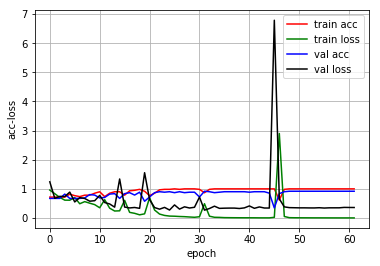

[[2.78637954e-03 2.45908905e-06 8.74734521e-01]
 [2.99826264e-01 1.21630752e-03 7.11471803e-05]
 [4.68748529e-03 5.08206449e-06 7.62158275e-01]
 [7.99861908e-01 6.58909048e-05 1.29694981e-05]
 [8.50666881e-01 3.05056619e-05 2.71941444e-05]
 [9.04767811e-01 1.39018521e-05 1.39068379e-05]
 [8.56256485e-01 6.54977339e-05 1.87043304e-06]
 [5.37616074e-01 2.48537021e-04 1.55290654e-05]
 [2.51288642e-03 2.83684194e-01 4.82415635e-05]
 [2.29342490e-01 4.58678463e-03 1.63579280e-05]
 [9.24813092e-01 2.05812976e-05 3.17540776e-06]
 [9.31821778e-05 4.57644317e-04 6.74052954e-01]
 [4.26442223e-03 1.27537214e-06 8.33518445e-01]
 [2.51008278e-05 6.87741383e-04 4.80139583e-01]
 [7.29532123e-01 1.03946455e-04 8.42945337e-06]
 [8.61927509e-01 3.56339547e-06 1.63091201e-04]
 [8.62557650e-01 2.48423294e-05 4.76853529e-06]
 [6.89487875e-01 2.04656724e-04 1.23608806e-05]
 [6.75957680e-01 9.69221437e-05 1.49704458e-04]
 [7.58022964e-01 1.57760460e-05 1.79613577e-04]
 [2.60892540e-01 4.39448704e-05 1.456810

In [58]:
matrix_label01 = np.array(matrix_label)[:,:3]
print(matrix_label01[:5])
print(len(matrix_label01))

model_01 = Sequential()
model_01.add(Dense(units=256, activation='relu', input_dim=len(list_vecOfNodeText[0])))
model_01.add(Dense(units=128, activation='relu'))
model_01.add(Dense(units=64, activation='relu'))
model_01.add(Dense(units=len(list_NODEVALUE), activation='sigmoid'))

model_01.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

print(model_01.summary())

check_point_01 = keras.callbacks.ModelCheckpoint('./CheckPoint/extract_feature_model01_checkpoint.hdf5', monitor='val_loss', verbose=0, 
                                              save_best_only=True, save_weights_only=False, mode='auto', period=1)
early_stop_01 = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=30, verbose=0,
                              mode='auto', baseline=None, restore_best_weights=False)
#创建一个实例history
history_01 = LossHistory()
callbacks_01 = [check_point_01, early_stop_01,history_01]

model_01.fit(np.array(list_vecOfNodeText), matrix_label01, epochs=10000, batch_size=32,
             callbacks=callbacks_01, validation_split=0.5)

score_01 = model_01.evaluate(np.array(list_vecOfNodeText), matrix_label01, verbose=0)
print('Test score:', score_01[0])
print('Test accuracy:', score_01[1])

#绘制acc-loss曲线
history_01.loss_plot('epoch')

predict_01 = model_01.predict(np.array(list_vecOfNodeText))
print(predict_01)
print(matrix_label01)

In [107]:
matrix_label02 = np.array(matrix_label)[:,3:6]
print(matrix_label02[:5])
print(len(matrix_label02))

model_02 = Sequential()
model_02.add(Dense(units=256, activation='relu', input_dim=len(list_vecOfNodeText[0])))
model_02.add(Dense(units=128, activation='relu'))
model_02.add(Dense(units=64, activation='relu'))
model_02.add(Dense(units=len(list_NODEVALUE), activation='sigmoid'))

model_02.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

print(model_02.summary())

check_point_02 = keras.callbacks.ModelCheckpoint('./CheckPoint/extract_feature_model02_checkpoint.hdf5', monitor='val_loss', verbose=0, 
                                              save_best_only=True, save_weights_only=False, mode='auto', period=1)
early_stop_02 = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3000, verbose=0,
                              mode='auto', baseline=None, restore_best_weights=False)
callbacks_02 = [check_point_02, early_stop_02]

model_02.fit(np.array(list_vecOfNodeText), matrix_label02, epochs=10000, batch_size=32,callbacks=callbacks_02, validation_split=0.5)

Train on 60 samples, validate on 61 samples
Epoch 1/10000
60/60 [==============================] - 1s 10ms/step - loss: 0.8600 - acc: 0.6167 - val_loss: 0.8921 - val_acc: 0.8033
Epoch 2/10000
60/60 [==============================] - 0s 230us/step - loss: 0.7423 - acc: 0.8500 - val_loss: 0.7508 - val_acc: 0.8033
Epoch 3/10000
60/60 [==============================] - 0s 224us/step - loss: 0.5886 - acc: 0.8500 - val_loss: 0.6512 - val_acc: 0.8033
Epoch 4/10000
60/60 [==============================] - 0s 254us/step - loss: 0.4928 - acc: 0.8500 - val_loss: 0.7661 - val_acc: 0.8033
Epoch 5/10000
60/60 [==============================] - 0s 242us/step - loss: 0.4858 - acc: 0.8500 - val_loss: 0.6999 - val_acc: 0.8033
Epoch 6/10000
60/60 [==============================] - 0s 381us/step - loss: 0.4723 - acc: 0.8500 - val_loss: 0.6937 - val_acc: 0.8033
Epoch 7/10000
60/60 [==============================] - 0s 456us/step - loss: 0.5042 - acc: 0.8500 - val_loss: 0.6908 - val_acc: 0.8033
Epoch 8/1000

Epoch 61/10000
60/60 [==============================] - 0s 237us/step - loss: 0.0787 - acc: 0.9833 - val_loss: 1.6398 - val_acc: 0.8033
Epoch 62/10000
60/60 [==============================] - 0s 298us/step - loss: 0.0661 - acc: 0.9833 - val_loss: 1.4998 - val_acc: 0.7869
Epoch 63/10000
60/60 [==============================] - 0s 252us/step - loss: 0.0563 - acc: 0.9833 - val_loss: 1.4418 - val_acc: 0.7869
Epoch 64/10000
60/60 [==============================] - 0s 232us/step - loss: 0.0423 - acc: 0.9833 - val_loss: 2.0122 - val_acc: 0.8033
Epoch 65/10000
60/60 [==============================] - 0s 241us/step - loss: 0.0446 - acc: 0.9833 - val_loss: 1.3966 - val_acc: 0.7049
Epoch 66/10000
60/60 [==============================] - 0s 263us/step - loss: 0.2438 - acc: 0.9333 - val_loss: 1.9289 - val_acc: 0.5246
Epoch 67/10000
60/60 [==============================] - 0s 301us/step - loss: 0.4661 - acc: 0.8500 - val_loss: 2.2366 - val_acc: 0.8033
Epoch 68/10000
60/60 [==========================

Epoch 121/10000
60/60 [==============================] - 0s 338us/step - loss: 0.0127 - acc: 0.9833 - val_loss: 2.2214 - val_acc: 0.8033
Epoch 122/10000
60/60 [==============================] - 0s 486us/step - loss: 0.0127 - acc: 0.9833 - val_loss: 2.2291 - val_acc: 0.8033
Epoch 123/10000
60/60 [==============================] - 0s 322us/step - loss: 0.0126 - acc: 0.9833 - val_loss: 2.2293 - val_acc: 0.8033
Epoch 124/10000
60/60 [==============================] - 0s 299us/step - loss: 0.0125 - acc: 0.9833 - val_loss: 2.2259 - val_acc: 0.8033
Epoch 125/10000
60/60 [==============================] - 0s 303us/step - loss: 0.0125 - acc: 0.9833 - val_loss: 2.2398 - val_acc: 0.8033
Epoch 126/10000
60/60 [==============================] - 0s 321us/step - loss: 0.0124 - acc: 0.9833 - val_loss: 2.2626 - val_acc: 0.8033
Epoch 127/10000
60/60 [==============================] - 0s 366us/step - loss: 0.0124 - acc: 0.9833 - val_loss: 2.2612 - val_acc: 0.8033
Epoch 128/10000
60/60 [==================

Epoch 181/10000
60/60 [==============================] - 0s 322us/step - loss: 0.0117 - acc: 0.9833 - val_loss: 2.5422 - val_acc: 0.7869
Epoch 182/10000
60/60 [==============================] - 0s 336us/step - loss: 0.0117 - acc: 0.9833 - val_loss: 2.5384 - val_acc: 0.7869
Epoch 183/10000
60/60 [==============================] - 0s 300us/step - loss: 0.0117 - acc: 0.9833 - val_loss: 2.5488 - val_acc: 0.7869
Epoch 184/10000
60/60 [==============================] - 0s 276us/step - loss: 0.0117 - acc: 0.9833 - val_loss: 2.5318 - val_acc: 0.7869
Epoch 185/10000
60/60 [==============================] - 0s 343us/step - loss: 0.0117 - acc: 0.9833 - val_loss: 2.5295 - val_acc: 0.7869
Epoch 186/10000
60/60 [==============================] - 0s 412us/step - loss: 0.0117 - acc: 0.9833 - val_loss: 2.5305 - val_acc: 0.7869
Epoch 187/10000
60/60 [==============================] - 0s 431us/step - loss: 0.0117 - acc: 0.9833 - val_loss: 2.5301 - val_acc: 0.7869
Epoch 188/10000
60/60 [==================

Epoch 241/10000
60/60 [==============================] - 0s 420us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.0751 - val_acc: 0.8033
Epoch 242/10000
60/60 [==============================] - 0s 284us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.1574 - val_acc: 0.8033
Epoch 243/10000
60/60 [==============================] - 0s 280us/step - loss: 3.0435 - acc: 0.6667 - val_loss: 3.1216 - val_acc: 0.8033
Epoch 244/10000
60/60 [==============================] - 0s 330us/step - loss: 0.2868 - acc: 0.9333 - val_loss: 3.1352 - val_acc: 0.7869
Epoch 245/10000
60/60 [==============================] - 0s 361us/step - loss: 0.0117 - acc: 0.9833 - val_loss: 3.1336 - val_acc: 0.8033
Epoch 246/10000
60/60 [==============================] - 0s 315us/step - loss: 0.0117 - acc: 0.9833 - val_loss: 3.1320 - val_acc: 0.8033
Epoch 247/10000
60/60 [==============================] - 0s 344us/step - loss: 0.0117 - acc: 0.9833 - val_loss: 3.1306 - val_acc: 0.8033
Epoch 248/10000
60/60 [==================

Epoch 301/10000
60/60 [==============================] - 0s 320us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.0347 - val_acc: 0.8033
Epoch 302/10000
60/60 [==============================] - 0s 327us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.0333 - val_acc: 0.8033
Epoch 303/10000
60/60 [==============================] - 0s 324us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.0315 - val_acc: 0.8033
Epoch 304/10000
60/60 [==============================] - 0s 366us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.0300 - val_acc: 0.8033
Epoch 305/10000
60/60 [==============================] - 0s 358us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.0292 - val_acc: 0.7869
Epoch 306/10000
60/60 [==============================] - 0s 360us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.0294 - val_acc: 0.7869
Epoch 307/10000
60/60 [==============================] - 0s 363us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.0285 - val_acc: 0.7869
Epoch 308/10000
60/60 [==================

Epoch 420/10000
60/60 [==============================] - 0s 397us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2182 - val_acc: 0.7869
Epoch 421/10000
60/60 [==============================] - 0s 383us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2134 - val_acc: 0.7869
Epoch 422/10000
60/60 [==============================] - 0s 387us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2207 - val_acc: 0.7869
Epoch 423/10000
60/60 [==============================] - 0s 289us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2123 - val_acc: 0.7869
Epoch 424/10000
60/60 [==============================] - 0s 341us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2086 - val_acc: 0.7869
Epoch 425/10000
60/60 [==============================] - 0s 441us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2131 - val_acc: 0.7869
Epoch 426/10000
60/60 [==============================] - 0s 374us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2084 - val_acc: 0.7869
Epoch 427/10000
60/60 [==================

Epoch 480/10000
60/60 [==============================] - 0s 347us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2209 - val_acc: 0.7869
Epoch 481/10000
60/60 [==============================] - 0s 454us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2209 - val_acc: 0.7869
Epoch 482/10000
60/60 [==============================] - 0s 326us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2209 - val_acc: 0.7869
Epoch 483/10000
60/60 [==============================] - 0s 328us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2210 - val_acc: 0.7869
Epoch 484/10000
60/60 [==============================] - 0s 366us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2210 - val_acc: 0.7869
Epoch 485/10000
60/60 [==============================] - 0s 378us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2210 - val_acc: 0.7869
Epoch 486/10000
60/60 [==============================] - 0s 355us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2211 - val_acc: 0.7869
Epoch 487/10000
60/60 [==================

Epoch 540/10000
60/60 [==============================] - 0s 320us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2209 - val_acc: 0.7869
Epoch 541/10000
60/60 [==============================] - 0s 318us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2209 - val_acc: 0.7869
Epoch 542/10000
60/60 [==============================] - 0s 328us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2210 - val_acc: 0.7869
Epoch 543/10000
60/60 [==============================] - 0s 274us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2210 - val_acc: 0.7869
Epoch 544/10000
60/60 [==============================] - 0s 360us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2210 - val_acc: 0.7869
Epoch 545/10000
60/60 [==============================] - 0s 346us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2210 - val_acc: 0.7869
Epoch 546/10000
60/60 [==============================] - 0s 400us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2211 - val_acc: 0.7869
Epoch 547/10000
60/60 [==================

Epoch 600/10000
60/60 [==============================] - 0s 415us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2225 - val_acc: 0.7869
Epoch 601/10000
60/60 [==============================] - 0s 298us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2226 - val_acc: 0.7869
Epoch 602/10000
60/60 [==============================] - 0s 334us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2226 - val_acc: 0.7869
Epoch 603/10000
60/60 [==============================] - 0s 411us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2226 - val_acc: 0.7869
Epoch 604/10000
60/60 [==============================] - 0s 399us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2226 - val_acc: 0.7869
Epoch 605/10000
60/60 [==============================] - 0s 434us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2148 - val_acc: 0.7869
Epoch 606/10000
60/60 [==============================] - 0s 407us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2165 - val_acc: 0.7869
Epoch 607/10000
60/60 [==================

Epoch 660/10000
60/60 [==============================] - 0s 280us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2180 - val_acc: 0.7869
Epoch 661/10000
60/60 [==============================] - 0s 301us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2180 - val_acc: 0.7869
Epoch 662/10000
60/60 [==============================] - 0s 261us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2181 - val_acc: 0.7869
Epoch 663/10000
60/60 [==============================] - 0s 367us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2181 - val_acc: 0.7869
Epoch 664/10000
60/60 [==============================] - 0s 344us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2181 - val_acc: 0.7869
Epoch 665/10000
60/60 [==============================] - 0s 383us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2181 - val_acc: 0.7869
Epoch 666/10000
60/60 [==============================] - 0s 407us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2182 - val_acc: 0.7869
Epoch 667/10000
60/60 [==================

Epoch 779/10000
60/60 [==============================] - 0s 341us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2168 - val_acc: 0.7869
Epoch 780/10000
60/60 [==============================] - 0s 341us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2169 - val_acc: 0.7869
Epoch 781/10000
60/60 [==============================] - 0s 417us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2169 - val_acc: 0.7869
Epoch 782/10000
60/60 [==============================] - 0s 315us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2169 - val_acc: 0.7869
Epoch 783/10000
60/60 [==============================] - 0s 334us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2169 - val_acc: 0.7869
Epoch 784/10000
60/60 [==============================] - 0s 401us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2169 - val_acc: 0.7869
Epoch 785/10000
60/60 [==============================] - 0s 447us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2170 - val_acc: 0.7869
Epoch 786/10000
60/60 [==================

Epoch 839/10000
60/60 [==============================] - 0s 407us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2182 - val_acc: 0.7869
Epoch 840/10000
60/60 [==============================] - 0s 286us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2182 - val_acc: 0.7869
Epoch 841/10000
60/60 [==============================] - 0s 306us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2183 - val_acc: 0.7869
Epoch 842/10000
60/60 [==============================] - 0s 334us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2183 - val_acc: 0.7869
Epoch 843/10000
60/60 [==============================] - 0s 303us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2183 - val_acc: 0.7869
Epoch 844/10000
60/60 [==============================] - 0s 386us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2183 - val_acc: 0.7869
Epoch 845/10000
60/60 [==============================] - 0s 428us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2184 - val_acc: 0.7869
Epoch 846/10000
60/60 [==================

Epoch 899/10000
60/60 [==============================] - 0s 338us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2195 - val_acc: 0.7869
Epoch 900/10000
60/60 [==============================] - 0s 315us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2195 - val_acc: 0.7869
Epoch 901/10000
60/60 [==============================] - 0s 446us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2196 - val_acc: 0.7869
Epoch 902/10000
60/60 [==============================] - 0s 350us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2196 - val_acc: 0.7869
Epoch 903/10000
60/60 [==============================] - 0s 408us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2196 - val_acc: 0.7869
Epoch 904/10000
60/60 [==============================] - 0s 310us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2196 - val_acc: 0.7869
Epoch 905/10000
60/60 [==============================] - 0s 372us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2196 - val_acc: 0.7869
Epoch 906/10000
60/60 [==================

Epoch 959/10000
60/60 [==============================] - 0s 321us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2187 - val_acc: 0.7869
Epoch 960/10000
60/60 [==============================] - 0s 388us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2187 - val_acc: 0.7869
Epoch 961/10000
60/60 [==============================] - 0s 507us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2187 - val_acc: 0.7869
Epoch 962/10000
60/60 [==============================] - 0s 342us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2188 - val_acc: 0.7869
Epoch 963/10000
60/60 [==============================] - 0s 305us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2188 - val_acc: 0.7869
Epoch 964/10000
60/60 [==============================] - 0s 404us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2188 - val_acc: 0.7869
Epoch 965/10000
60/60 [==============================] - 0s 330us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2188 - val_acc: 0.7869
Epoch 966/10000
60/60 [==================

60/60 [==============================] - 0s 330us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2213 - val_acc: 0.7869
Epoch 1078/10000
60/60 [==============================] - 0s 313us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2213 - val_acc: 0.7869
Epoch 1079/10000
60/60 [==============================] - 0s 386us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2213 - val_acc: 0.7869
Epoch 1080/10000
60/60 [==============================] - 0s 283us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2213 - val_acc: 0.7869
Epoch 1081/10000
60/60 [==============================] - 0s 335us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2213 - val_acc: 0.7869
Epoch 1082/10000
60/60 [==============================] - 0s 358us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2214 - val_acc: 0.7869
Epoch 1083/10000
60/60 [==============================] - 0s 389us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2214 - val_acc: 0.7869
Epoch 1084/10000
60/60 [===========================

60/60 [==============================] - 0s 308us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2229 - val_acc: 0.7869
Epoch 1196/10000
60/60 [==============================] - 0s 311us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2230 - val_acc: 0.7869
Epoch 1197/10000
60/60 [==============================] - 0s 404us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2230 - val_acc: 0.7869
Epoch 1198/10000
60/60 [==============================] - 0s 293us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2230 - val_acc: 0.7869
Epoch 1199/10000
60/60 [==============================] - 0s 357us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2230 - val_acc: 0.7869
Epoch 1200/10000
60/60 [==============================] - 0s 420us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2230 - val_acc: 0.7869
Epoch 1201/10000
60/60 [==============================] - 0s 332us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2230 - val_acc: 0.7869
Epoch 1202/10000
60/60 [===========================

60/60 [==============================] - 0s 291us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2249 - val_acc: 0.7869
Epoch 1314/10000
60/60 [==============================] - 0s 353us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2249 - val_acc: 0.7869
Epoch 1315/10000
60/60 [==============================] - 0s 309us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2249 - val_acc: 0.7869
Epoch 1316/10000
60/60 [==============================] - 0s 407us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2250 - val_acc: 0.7869
Epoch 1317/10000
60/60 [==============================] - 0s 471us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2250 - val_acc: 0.7869
Epoch 1318/10000
60/60 [==============================] - 0s 421us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2250 - val_acc: 0.7869
Epoch 1319/10000
60/60 [==============================] - 0s 328us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2250 - val_acc: 0.7869
Epoch 1320/10000
60/60 [===========================

60/60 [==============================] - 0s 294us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2221 - val_acc: 0.7869
Epoch 1432/10000
60/60 [==============================] - 0s 281us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2221 - val_acc: 0.7869
Epoch 1433/10000
60/60 [==============================] - 0s 405us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2221 - val_acc: 0.7869
Epoch 1434/10000
60/60 [==============================] - 0s 312us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2221 - val_acc: 0.7869
Epoch 1435/10000
60/60 [==============================] - 0s 270us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2221 - val_acc: 0.7869
Epoch 1436/10000
60/60 [==============================] - 0s 314us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2222 - val_acc: 0.7869
Epoch 1437/10000
60/60 [==============================] - 0s 316us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2222 - val_acc: 0.7869
Epoch 1438/10000
60/60 [===========================

60/60 [==============================] - 0s 363us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2238 - val_acc: 0.7869
Epoch 1550/10000
60/60 [==============================] - 0s 297us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2238 - val_acc: 0.7869
Epoch 1551/10000
60/60 [==============================] - 0s 333us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2238 - val_acc: 0.7869
Epoch 1552/10000
60/60 [==============================] - 0s 265us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2239 - val_acc: 0.7869
Epoch 1553/10000
60/60 [==============================] - 0s 335us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2239 - val_acc: 0.7869
Epoch 1554/10000
60/60 [==============================] - 0s 340us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2239 - val_acc: 0.7869
Epoch 1555/10000
60/60 [==============================] - 0s 353us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2239 - val_acc: 0.7869
Epoch 1556/10000
60/60 [===========================

60/60 [==============================] - 0s 259us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2254 - val_acc: 0.7869
Epoch 1668/10000
60/60 [==============================] - 0s 256us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2254 - val_acc: 0.7869
Epoch 1669/10000
60/60 [==============================] - 0s 253us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2254 - val_acc: 0.7869
Epoch 1670/10000
60/60 [==============================] - 0s 260us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2255 - val_acc: 0.7869
Epoch 1671/10000
60/60 [==============================] - 0s 246us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2255 - val_acc: 0.7869
Epoch 1672/10000
60/60 [==============================] - 0s 287us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2255 - val_acc: 0.7869
Epoch 1673/10000
60/60 [==============================] - 0s 277us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2255 - val_acc: 0.7869
Epoch 1674/10000
60/60 [===========================

60/60 [==============================] - 0s 347us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2195 - val_acc: 0.7869
Epoch 1786/10000
60/60 [==============================] - 0s 278us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2195 - val_acc: 0.7869
Epoch 1787/10000
60/60 [==============================] - 0s 364us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2195 - val_acc: 0.7869
Epoch 1788/10000
60/60 [==============================] - 0s 291us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2196 - val_acc: 0.7869
Epoch 1789/10000
60/60 [==============================] - 0s 292us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2196 - val_acc: 0.7869
Epoch 1790/10000
60/60 [==============================] - 0s 333us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2196 - val_acc: 0.7869
Epoch 1791/10000
60/60 [==============================] - 0s 315us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2196 - val_acc: 0.7869
Epoch 1792/10000
60/60 [===========================

60/60 [==============================] - 0s 357us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2211 - val_acc: 0.7869
Epoch 1904/10000
60/60 [==============================] - 0s 267us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2211 - val_acc: 0.7869
Epoch 1905/10000
60/60 [==============================] - 0s 318us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2211 - val_acc: 0.7869
Epoch 1906/10000
60/60 [==============================] - 0s 267us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2211 - val_acc: 0.7869
Epoch 1907/10000
60/60 [==============================] - 0s 345us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2211 - val_acc: 0.7869
Epoch 1908/10000
60/60 [==============================] - 0s 349us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2211 - val_acc: 0.7869
Epoch 1909/10000
60/60 [==============================] - 0s 332us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2211 - val_acc: 0.7869
Epoch 1910/10000
60/60 [===========================

60/60 [==============================] - 0s 327us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2225 - val_acc: 0.7869
Epoch 2022/10000
60/60 [==============================] - 0s 288us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2225 - val_acc: 0.7869
Epoch 2023/10000
60/60 [==============================] - 0s 280us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2225 - val_acc: 0.7869
Epoch 2024/10000
60/60 [==============================] - 0s 291us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2225 - val_acc: 0.7869
Epoch 2025/10000
60/60 [==============================] - 0s 263us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2225 - val_acc: 0.7869
Epoch 2026/10000
60/60 [==============================] - 0s 307us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2225 - val_acc: 0.7869
Epoch 2027/10000
60/60 [==============================] - 0s 411us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2226 - val_acc: 0.7869
Epoch 2028/10000
60/60 [===========================

60/60 [==============================] - 0s 376us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2238 - val_acc: 0.7869
Epoch 2140/10000
60/60 [==============================] - 0s 377us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2238 - val_acc: 0.7869
Epoch 2141/10000
60/60 [==============================] - 0s 251us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2238 - val_acc: 0.7869
Epoch 2142/10000
60/60 [==============================] - 0s 360us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2238 - val_acc: 0.7869
Epoch 2143/10000
60/60 [==============================] - 0s 374us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2238 - val_acc: 0.7869
Epoch 2144/10000
60/60 [==============================] - 0s 467us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2238 - val_acc: 0.7869
Epoch 2145/10000
60/60 [==============================] - 0s 420us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2239 - val_acc: 0.7869
Epoch 2146/10000
60/60 [===========================

60/60 [==============================] - 0s 362us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2208 - val_acc: 0.7869
Epoch 2258/10000
60/60 [==============================] - 0s 258us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2208 - val_acc: 0.7869
Epoch 2259/10000
60/60 [==============================] - 0s 341us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2209 - val_acc: 0.7869
Epoch 2260/10000
60/60 [==============================] - 0s 355us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2209 - val_acc: 0.7869
Epoch 2261/10000
60/60 [==============================] - 0s 258us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2209 - val_acc: 0.7869
Epoch 2262/10000
60/60 [==============================] - 0s 355us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2209 - val_acc: 0.7869
Epoch 2263/10000
60/60 [==============================] - 0s 361us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2209 - val_acc: 0.7869
Epoch 2264/10000
60/60 [===========================

60/60 [==============================] - 0s 265us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2221 - val_acc: 0.7869
Epoch 2376/10000
60/60 [==============================] - 0s 327us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2221 - val_acc: 0.7869
Epoch 2377/10000
60/60 [==============================] - 0s 264us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2221 - val_acc: 0.7869
Epoch 2378/10000
60/60 [==============================] - 0s 283us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2221 - val_acc: 0.7869
Epoch 2379/10000
60/60 [==============================] - 0s 258us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2221 - val_acc: 0.7869
Epoch 2380/10000
60/60 [==============================] - 0s 407us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2221 - val_acc: 0.7869
Epoch 2381/10000
60/60 [==============================] - 0s 365us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2221 - val_acc: 0.7869
Epoch 2382/10000
60/60 [===========================

60/60 [==============================] - 0s 414us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2232 - val_acc: 0.7869
Epoch 2494/10000
60/60 [==============================] - 0s 277us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2232 - val_acc: 0.7869
Epoch 2495/10000
60/60 [==============================] - 0s 390us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2232 - val_acc: 0.7869
Epoch 2496/10000
60/60 [==============================] - 0s 285us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2232 - val_acc: 0.7869
Epoch 2497/10000
60/60 [==============================] - 0s 290us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2232 - val_acc: 0.7869
Epoch 2498/10000
60/60 [==============================] - 0s 414us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2233 - val_acc: 0.7869
Epoch 2499/10000
60/60 [==============================] - 0s 336us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2233 - val_acc: 0.7869
Epoch 2500/10000
60/60 [===========================

60/60 [==============================] - 0s 256us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2199 - val_acc: 0.7869
Epoch 2612/10000
60/60 [==============================] - 0s 318us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2199 - val_acc: 0.7869
Epoch 2613/10000
60/60 [==============================] - 0s 396us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2199 - val_acc: 0.7869
Epoch 2614/10000
60/60 [==============================] - 0s 296us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2199 - val_acc: 0.7869
Epoch 2615/10000
60/60 [==============================] - 0s 270us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2199 - val_acc: 0.7869
Epoch 2616/10000
60/60 [==============================] - 0s 371us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2199 - val_acc: 0.7869
Epoch 2617/10000
60/60 [==============================] - 0s 417us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2199 - val_acc: 0.7869
Epoch 2618/10000
60/60 [===========================

60/60 [==============================] - 0s 285us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2210 - val_acc: 0.7869
Epoch 2730/10000
60/60 [==============================] - 0s 325us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2210 - val_acc: 0.7869
Epoch 2731/10000
60/60 [==============================] - 0s 273us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2210 - val_acc: 0.7869
Epoch 2732/10000
60/60 [==============================] - 0s 362us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2210 - val_acc: 0.7869
Epoch 2733/10000
60/60 [==============================] - 0s 280us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2210 - val_acc: 0.7869
Epoch 2734/10000
60/60 [==============================] - 0s 306us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2210 - val_acc: 0.7869
Epoch 2735/10000
60/60 [==============================] - 0s 324us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2210 - val_acc: 0.7869
Epoch 2736/10000
60/60 [===========================

60/60 [==============================] - 0s 277us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2220 - val_acc: 0.7869
Epoch 2848/10000
60/60 [==============================] - 0s 364us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2220 - val_acc: 0.7869
Epoch 2849/10000
60/60 [==============================] - 0s 289us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2220 - val_acc: 0.7869
Epoch 2850/10000
60/60 [==============================] - 0s 309us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2220 - val_acc: 0.7869
Epoch 2851/10000
60/60 [==============================] - 0s 407us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2220 - val_acc: 0.7869
Epoch 2852/10000
60/60 [==============================] - 0s 348us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2221 - val_acc: 0.7869
Epoch 2853/10000
60/60 [==============================] - 0s 314us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2221 - val_acc: 0.7869
Epoch 2854/10000
60/60 [===========================

60/60 [==============================] - 0s 329us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2230 - val_acc: 0.7869
Epoch 2966/10000
60/60 [==============================] - 0s 374us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2230 - val_acc: 0.7869
Epoch 2967/10000
60/60 [==============================] - 0s 265us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2230 - val_acc: 0.7869
Epoch 2968/10000
60/60 [==============================] - 0s 300us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2230 - val_acc: 0.7869
Epoch 2969/10000
60/60 [==============================] - 0s 426us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2230 - val_acc: 0.7869
Epoch 2970/10000
60/60 [==============================] - 0s 345us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2230 - val_acc: 0.7869
Epoch 2971/10000
60/60 [==============================] - 0s 316us/step - loss: 0.0116 - acc: 0.9833 - val_loss: 3.2230 - val_acc: 0.7869
Epoch 2972/10000
60/60 [===========================

In [110]:
matrix_label03 = np.array(matrix_label)[:,6:9]
print(matrix_label03[:5])
print(len(matrix_label03))

model_03 = Sequential()
model_03.add(Dense(units=256, activation='relu', input_dim=len(list_vecOfNodeText[0])))
model_03.add(Dense(units=128, activation='relu'))
model_03.add(Dense(units=64, activation='relu'))
model_03.add(Dense(units=len(list_NODEVALUE), activation='sigmoid'))

model_03.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

print(model_03.summary())

check_point_03 = keras.callbacks.ModelCheckpoint('./CheckPoint/extract_feature_model03_checkpoint.hdf5', monitor='val_loss', verbose=0, 
                                              save_best_only=True, save_weights_only=False, mode='auto', period=1)
early_stop_03 = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3000, verbose=0,
                              mode='auto', baseline=None, restore_best_weights=False)
callbacks_03 = [check_point_03, early_stop_03]

model_03.fit(np.array(list_vecOfNodeText), matrix_label03, epochs=10000, batch_size=32,
             callbacks=callbacks_03, validation_split=0.5)

Train on 60 samples, validate on 61 samples
Epoch 1/10000
60/60 [==============================] - 1s 13ms/step - loss: 0.9197 - acc: 0.4167 - val_loss: 0.9028 - val_acc: 0.8033
Epoch 2/10000
60/60 [==============================] - 0s 236us/step - loss: 0.7865 - acc: 0.8333 - val_loss: 0.6490 - val_acc: 0.8033
Epoch 3/10000
60/60 [==============================] - 0s 327us/step - loss: 0.6160 - acc: 0.8333 - val_loss: 0.6326 - val_acc: 0.8033
Epoch 4/10000
60/60 [==============================] - 0s 256us/step - loss: 0.5509 - acc: 0.8333 - val_loss: 0.6732 - val_acc: 0.8033
Epoch 5/10000
60/60 [==============================] - 0s 253us/step - loss: 0.5364 - acc: 0.8333 - val_loss: 0.6336 - val_acc: 0.8033
Epoch 6/10000
60/60 [==============================] - 0s 371us/step - loss: 0.5397 - acc: 0.8333 - val_loss: 0.6318 - val_acc: 0.8033
Epoch 7/10000
60/60 [==============================] - 0s 265us/step - loss: 0.5950 - acc: 0.8333 - val_loss: 0.6644 - val_acc: 0.8033
Epoch 8/1000

Epoch 61/10000
60/60 [==============================] - 0s 283us/step - loss: 0.1729 - acc: 0.9333 - val_loss: 0.8378 - val_acc: 0.7869
Epoch 62/10000
60/60 [==============================] - 0s 305us/step - loss: 0.0623 - acc: 1.0000 - val_loss: 0.9978 - val_acc: 0.8033
Epoch 63/10000
60/60 [==============================] - 0s 296us/step - loss: 0.0516 - acc: 0.9833 - val_loss: 1.0013 - val_acc: 0.7869
Epoch 64/10000
60/60 [==============================] - 0s 333us/step - loss: 0.0389 - acc: 1.0000 - val_loss: 0.9733 - val_acc: 0.7705
Epoch 65/10000
60/60 [==============================] - 0s 325us/step - loss: 0.0477 - acc: 0.9833 - val_loss: 0.9089 - val_acc: 0.7213
Epoch 66/10000
60/60 [==============================] - 0s 317us/step - loss: 0.0817 - acc: 0.9833 - val_loss: 0.9972 - val_acc: 0.5902
Epoch 67/10000
60/60 [==============================] - 0s 325us/step - loss: 0.2859 - acc: 0.8833 - val_loss: 0.8754 - val_acc: 0.6885
Epoch 68/10000
60/60 [==========================

60/60 [==============================] - 0s 303us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 1.4971 - val_acc: 0.8033
Epoch 122/10000
60/60 [==============================] - 0s 342us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 1.6362 - val_acc: 0.8033
Epoch 123/10000
60/60 [==============================] - 0s 323us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 1.4447 - val_acc: 0.7869
Epoch 124/10000
60/60 [==============================] - 0s 374us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 1.5263 - val_acc: 0.7869
Epoch 125/10000
60/60 [==============================] - 0s 410us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 1.3794 - val_acc: 0.7705
Epoch 126/10000
60/60 [==============================] - 0s 372us/step - loss: 0.0277 - acc: 0.9833 - val_loss: 4.0370 - val_acc: 0.3115
Epoch 127/10000
60/60 [==============================] - 0s 315us/step - loss: 2.5866 - acc: 0.5333 - val_loss: 2.1369 - val_acc: 0.7869
Epoch 128/10000
60/60 [==============================] - 

60/60 [==============================] - 0s 356us/step - loss: 1.1255e-05 - acc: 1.0000 - val_loss: 2.1138 - val_acc: 0.8033
Epoch 239/10000
60/60 [==============================] - 0s 285us/step - loss: 1.0103e-05 - acc: 1.0000 - val_loss: 2.1771 - val_acc: 0.8033
Epoch 240/10000
60/60 [==============================] - 0s 291us/step - loss: 8.9925e-06 - acc: 1.0000 - val_loss: 2.2892 - val_acc: 0.7869
Epoch 241/10000
60/60 [==============================] - 0s 306us/step - loss: 1.2155e-04 - acc: 1.0000 - val_loss: 3.1347 - val_acc: 0.8033
Epoch 242/10000
60/60 [==============================] - 0s 279us/step - loss: 3.5996 - acc: 0.4500 - val_loss: 2.2208 - val_acc: 0.8033
Epoch 243/10000
60/60 [==============================] - 0s 295us/step - loss: 1.1348 - acc: 0.8833 - val_loss: 2.1180 - val_acc: 0.8033
Epoch 244/10000
60/60 [==============================] - 0s 272us/step - loss: 1.1252 - acc: 0.9000 - val_loss: 2.0610 - val_acc: 0.8033
Epoch 245/10000
60/60 [==================

60/60 [==============================] - 0s 335us/step - loss: 2.0005e-05 - acc: 1.0000 - val_loss: 2.3710 - val_acc: 0.8197
Epoch 355/10000
60/60 [==============================] - 0s 284us/step - loss: 1.7948e-05 - acc: 1.0000 - val_loss: 2.3662 - val_acc: 0.8033
Epoch 356/10000
60/60 [==============================] - 0s 305us/step - loss: 1.6342e-05 - acc: 1.0000 - val_loss: 2.3612 - val_acc: 0.8033
Epoch 357/10000
60/60 [==============================] - 0s 259us/step - loss: 1.5026e-05 - acc: 1.0000 - val_loss: 2.3559 - val_acc: 0.8033
Epoch 358/10000
60/60 [==============================] - 0s 293us/step - loss: 1.3903e-05 - acc: 1.0000 - val_loss: 2.3505 - val_acc: 0.8033
Epoch 359/10000
60/60 [==============================] - 0s 307us/step - loss: 1.2531e-05 - acc: 1.0000 - val_loss: 2.3455 - val_acc: 0.8033
Epoch 360/10000
60/60 [==============================] - 0s 349us/step - loss: 1.1525e-05 - acc: 1.0000 - val_loss: 2.3411 - val_acc: 0.8033
Epoch 361/10000
60/60 [======

60/60 [==============================] - 0s 295us/step - loss: 9.5754e-05 - acc: 1.0000 - val_loss: 2.6759 - val_acc: 0.7705
Epoch 471/10000
60/60 [==============================] - 0s 270us/step - loss: 8.5625e-05 - acc: 1.0000 - val_loss: 2.6736 - val_acc: 0.7705
Epoch 472/10000
60/60 [==============================] - 0s 347us/step - loss: 7.5564e-05 - acc: 1.0000 - val_loss: 2.6707 - val_acc: 0.7705
Epoch 473/10000
60/60 [==============================] - 0s 319us/step - loss: 6.7426e-05 - acc: 1.0000 - val_loss: 2.6685 - val_acc: 0.7705
Epoch 474/10000
60/60 [==============================] - 0s 310us/step - loss: 6.0814e-05 - acc: 1.0000 - val_loss: 2.6660 - val_acc: 0.7705
Epoch 475/10000
60/60 [==============================] - 0s 332us/step - loss: 5.4186e-05 - acc: 1.0000 - val_loss: 2.6637 - val_acc: 0.7705
Epoch 476/10000
60/60 [==============================] - 0s 339us/step - loss: 4.9457e-05 - acc: 1.0000 - val_loss: 2.6609 - val_acc: 0.7705
Epoch 477/10000
60/60 [======

60/60 [==============================] - 0s 251us/step - loss: 1.2020e-07 - acc: 1.0000 - val_loss: 2.5601 - val_acc: 0.8033
Epoch 587/10000
60/60 [==============================] - 0s 272us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5550 - val_acc: 0.8033
Epoch 588/10000
60/60 [==============================] - 0s 320us/step - loss: 1.2020e-07 - acc: 1.0000 - val_loss: 2.5637 - val_acc: 0.8033
Epoch 589/10000
60/60 [==============================] - 0s 249us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5601 - val_acc: 0.8033
Epoch 590/10000
60/60 [==============================] - 0s 257us/step - loss: 1.2020e-07 - acc: 1.0000 - val_loss: 2.5665 - val_acc: 0.8033
Epoch 591/10000
60/60 [==============================] - 0s 276us/step - loss: 1.2020e-07 - acc: 1.0000 - val_loss: 2.5590 - val_acc: 0.8033
Epoch 592/10000
60/60 [==============================] - 0s 427us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5652 - val_acc: 0.8033
Epoch 593/10000
60/60 [======

60/60 [==============================] - 0s 323us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 703/10000
60/60 [==============================] - 0s 310us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 704/10000
60/60 [==============================] - 0s 296us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 705/10000
60/60 [==============================] - 0s 296us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 706/10000
60/60 [==============================] - 0s 373us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 707/10000
60/60 [==============================] - 0s 341us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 708/10000
60/60 [==============================] - 0s 282us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 709/10000
60/60 [======

60/60 [==============================] - 0s 307us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 819/10000
60/60 [==============================] - 0s 316us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 820/10000
60/60 [==============================] - 0s 305us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 821/10000
60/60 [==============================] - 0s 305us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 822/10000
60/60 [==============================] - 0s 288us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 823/10000
60/60 [==============================] - 0s 348us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 824/10000
60/60 [==============================] - 0s 364us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 825/10000
60/60 [======

60/60 [==============================] - 0s 318us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 935/10000
60/60 [==============================] - 0s 273us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 936/10000
60/60 [==============================] - 0s 305us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 937/10000
60/60 [==============================] - 0s 281us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 938/10000
60/60 [==============================] - 0s 277us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 939/10000
60/60 [==============================] - 0s 360us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 940/10000
60/60 [==============================] - 0s 344us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 941/10000
60/60 [======

Epoch 1050/10000
60/60 [==============================] - 0s 324us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1051/10000
60/60 [==============================] - 0s 273us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1052/10000
60/60 [==============================] - 0s 327us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1053/10000
60/60 [==============================] - 0s 335us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1054/10000
60/60 [==============================] - 0s 315us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1055/10000
60/60 [==============================] - 0s 319us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1056/10000
60/60 [==============================] - 0s 296us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 

Epoch 1108/10000
60/60 [==============================] - 0s 319us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1109/10000
60/60 [==============================] - 0s 257us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1110/10000
60/60 [==============================] - 0s 241us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1111/10000
60/60 [==============================] - 0s 263us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1112/10000
60/60 [==============================] - 0s 340us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1113/10000
60/60 [==============================] - 0s 263us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1114/10000
60/60 [==============================] - 0s 312us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 

Epoch 1166/10000
60/60 [==============================] - 0s 262us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1167/10000
60/60 [==============================] - 0s 340us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1168/10000
60/60 [==============================] - 0s 301us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1169/10000
60/60 [==============================] - 0s 297us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1170/10000
60/60 [==============================] - 0s 391us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1171/10000
60/60 [==============================] - 0s 355us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1172/10000
60/60 [==============================] - 0s 394us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 

Epoch 1281/10000
60/60 [==============================] - 0s 264us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1282/10000
60/60 [==============================] - 0s 296us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1283/10000
60/60 [==============================] - 0s 293us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1284/10000
60/60 [==============================] - 0s 295us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1285/10000
60/60 [==============================] - 0s 359us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1286/10000
60/60 [==============================] - 0s 304us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1287/10000
60/60 [==============================] - 0s 303us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 

Epoch 1339/10000
60/60 [==============================] - 0s 289us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1340/10000
60/60 [==============================] - 0s 243us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1341/10000
60/60 [==============================] - 0s 349us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1342/10000
60/60 [==============================] - 0s 273us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1343/10000
60/60 [==============================] - 0s 349us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1344/10000
60/60 [==============================] - 0s 371us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1345/10000
60/60 [==============================] - 0s 335us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 

Epoch 1397/10000
60/60 [==============================] - 0s 322us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1398/10000
60/60 [==============================] - 0s 322us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1399/10000
60/60 [==============================] - 0s 242us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1400/10000
60/60 [==============================] - 0s 309us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1401/10000
60/60 [==============================] - 0s 346us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1402/10000
60/60 [==============================] - 0s 324us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1403/10000
60/60 [==============================] - 0s 305us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 

Epoch 1455/10000
60/60 [==============================] - 0s 284us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1456/10000
60/60 [==============================] - 0s 289us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1457/10000
60/60 [==============================] - 0s 331us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1458/10000
60/60 [==============================] - 0s 276us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1459/10000
60/60 [==============================] - 0s 277us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1460/10000
60/60 [==============================] - 0s 393us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1461/10000
60/60 [==============================] - 0s 309us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 

Epoch 1513/10000
60/60 [==============================] - 0s 362us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1514/10000
60/60 [==============================] - 0s 263us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1515/10000
60/60 [==============================] - 0s 302us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1516/10000
60/60 [==============================] - 0s 301us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1517/10000
60/60 [==============================] - 0s 354us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1518/10000
60/60 [==============================] - 0s 352us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1519/10000
60/60 [==============================] - 0s 457us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 

Epoch 1571/10000
60/60 [==============================] - 0s 310us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1572/10000
60/60 [==============================] - 0s 257us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1573/10000
60/60 [==============================] - 0s 316us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1574/10000
60/60 [==============================] - 0s 266us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1575/10000
60/60 [==============================] - 0s 322us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1576/10000
60/60 [==============================] - 0s 357us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1577/10000
60/60 [==============================] - 0s 325us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 

Epoch 1629/10000
60/60 [==============================] - 0s 283us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1630/10000
60/60 [==============================] - 0s 276us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1631/10000
60/60 [==============================] - 0s 252us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1632/10000
60/60 [==============================] - 0s 269us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1633/10000
60/60 [==============================] - 0s 327us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1634/10000
60/60 [==============================] - 0s 317us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1635/10000
60/60 [==============================] - 0s 378us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 

Epoch 1687/10000
60/60 [==============================] - 0s 301us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1688/10000
60/60 [==============================] - 0s 298us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1689/10000
60/60 [==============================] - 0s 317us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1690/10000
60/60 [==============================] - 0s 321us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1691/10000
60/60 [==============================] - 0s 374us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1692/10000
60/60 [==============================] - 0s 276us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1693/10000
60/60 [==============================] - 0s 317us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 

Epoch 1745/10000
60/60 [==============================] - 0s 289us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1746/10000
60/60 [==============================] - 0s 280us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1747/10000
60/60 [==============================] - 0s 277us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1748/10000
60/60 [==============================] - 0s 312us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1749/10000
60/60 [==============================] - 0s 333us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1750/10000
60/60 [==============================] - 0s 335us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1751/10000
60/60 [==============================] - 0s 269us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 

Epoch 1803/10000
60/60 [==============================] - 0s 387us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1804/10000
60/60 [==============================] - 0s 278us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1805/10000
60/60 [==============================] - 0s 318us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1806/10000
60/60 [==============================] - 0s 307us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1807/10000
60/60 [==============================] - 0s 376us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1808/10000
60/60 [==============================] - 0s 327us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1809/10000
60/60 [==============================] - 0s 307us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 

Epoch 1861/10000
60/60 [==============================] - 0s 334us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1862/10000
60/60 [==============================] - 0s 280us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1863/10000
60/60 [==============================] - 0s 301us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1864/10000
60/60 [==============================] - 0s 311us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1865/10000
60/60 [==============================] - 0s 300us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1866/10000
60/60 [==============================] - 0s 317us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1867/10000
60/60 [==============================] - 0s 333us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 

Epoch 1919/10000
60/60 [==============================] - 0s 305us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1920/10000
60/60 [==============================] - 0s 307us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1921/10000
60/60 [==============================] - 0s 271us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1922/10000
60/60 [==============================] - 0s 296us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1923/10000
60/60 [==============================] - 0s 340us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1924/10000
60/60 [==============================] - 0s 352us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1925/10000
60/60 [==============================] - 0s 326us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 

Epoch 1977/10000
60/60 [==============================] - 0s 339us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1978/10000
60/60 [==============================] - 0s 399us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1979/10000
60/60 [==============================] - 0s 266us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1980/10000
60/60 [==============================] - 0s 270us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1981/10000
60/60 [==============================] - 0s 288us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1982/10000
60/60 [==============================] - 0s 385us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 1983/10000
60/60 [==============================] - 0s 342us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 

Epoch 2035/10000
60/60 [==============================] - 0s 290us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2036/10000
60/60 [==============================] - 0s 323us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2037/10000
60/60 [==============================] - 0s 338us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2038/10000
60/60 [==============================] - 0s 299us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2039/10000
60/60 [==============================] - 0s 318us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2040/10000
60/60 [==============================] - 0s 340us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2041/10000
60/60 [==============================] - 0s 310us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 

Epoch 2093/10000
60/60 [==============================] - 0s 304us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2094/10000
60/60 [==============================] - 0s 289us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2095/10000
60/60 [==============================] - 0s 341us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2096/10000
60/60 [==============================] - 0s 346us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2097/10000
60/60 [==============================] - 0s 302us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2098/10000
60/60 [==============================] - 0s 392us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2099/10000
60/60 [==============================] - 0s 351us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 

Epoch 2151/10000
60/60 [==============================] - 0s 358us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2152/10000
60/60 [==============================] - 0s 269us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2153/10000
60/60 [==============================] - 0s 223us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2154/10000
60/60 [==============================] - 0s 362us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2155/10000
60/60 [==============================] - 0s 379us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2156/10000
60/60 [==============================] - 0s 340us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2157/10000
60/60 [==============================] - 0s 315us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 

Epoch 2209/10000
60/60 [==============================] - 0s 288us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2210/10000
60/60 [==============================] - 0s 278us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2211/10000
60/60 [==============================] - 0s 281us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2212/10000
60/60 [==============================] - 0s 341us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2213/10000
60/60 [==============================] - 0s 350us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2214/10000
60/60 [==============================] - 0s 403us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2215/10000
60/60 [==============================] - 0s 336us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 

Epoch 2267/10000
60/60 [==============================] - 0s 311us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2268/10000
60/60 [==============================] - 0s 302us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2269/10000
60/60 [==============================] - 0s 261us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2270/10000
60/60 [==============================] - 0s 298us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2271/10000
60/60 [==============================] - 0s 336us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2272/10000
60/60 [==============================] - 0s 322us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2273/10000
60/60 [==============================] - 0s 322us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 

Epoch 2325/10000
60/60 [==============================] - 0s 305us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2326/10000
60/60 [==============================] - 0s 269us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2327/10000
60/60 [==============================] - 0s 297us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2328/10000
60/60 [==============================] - 0s 359us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2329/10000
60/60 [==============================] - 0s 315us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2330/10000
60/60 [==============================] - 0s 322us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2331/10000
60/60 [==============================] - 0s 327us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 

Epoch 2383/10000
60/60 [==============================] - 0s 289us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2384/10000
60/60 [==============================] - 0s 276us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2385/10000
60/60 [==============================] - 0s 329us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2386/10000
60/60 [==============================] - 0s 325us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2387/10000
60/60 [==============================] - 0s 318us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2388/10000
60/60 [==============================] - 0s 317us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2389/10000
60/60 [==============================] - 0s 267us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 

Epoch 2441/10000
60/60 [==============================] - 0s 331us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2442/10000
60/60 [==============================] - 0s 310us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2443/10000
60/60 [==============================] - 0s 319us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2444/10000
60/60 [==============================] - 0s 327us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2445/10000
60/60 [==============================] - 0s 302us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2446/10000
60/60 [==============================] - 0s 334us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2447/10000
60/60 [==============================] - 0s 290us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 

Epoch 2499/10000
60/60 [==============================] - 0s 252us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2500/10000
60/60 [==============================] - 0s 311us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2501/10000
60/60 [==============================] - 0s 231us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2502/10000
60/60 [==============================] - 0s 270us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2503/10000
60/60 [==============================] - 0s 338us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2504/10000
60/60 [==============================] - 0s 288us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2505/10000
60/60 [==============================] - 0s 324us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 

Epoch 2614/10000
60/60 [==============================] - 0s 271us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2615/10000
60/60 [==============================] - 0s 293us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2616/10000
60/60 [==============================] - 0s 308us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2617/10000
60/60 [==============================] - 0s 300us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2618/10000
60/60 [==============================] - 0s 325us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2619/10000
60/60 [==============================] - 0s 338us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2620/10000
60/60 [==============================] - 0s 325us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 

Epoch 2672/10000
60/60 [==============================] - 0s 283us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2673/10000
60/60 [==============================] - 0s 274us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2674/10000
60/60 [==============================] - 0s 344us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2675/10000
60/60 [==============================] - 0s 276us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2676/10000
60/60 [==============================] - 0s 266us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2677/10000
60/60 [==============================] - 0s 335us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2678/10000
60/60 [==============================] - 0s 391us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 

Epoch 2730/10000
60/60 [==============================] - 0s 335us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2731/10000
60/60 [==============================] - 0s 292us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2732/10000
60/60 [==============================] - 0s 258us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2733/10000
60/60 [==============================] - 0s 331us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2734/10000
60/60 [==============================] - 0s 299us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2735/10000
60/60 [==============================] - 0s 323us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2736/10000
60/60 [==============================] - 0s 340us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 

Epoch 2788/10000
60/60 [==============================] - 0s 269us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2789/10000
60/60 [==============================] - 0s 301us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2790/10000
60/60 [==============================] - 0s 315us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2791/10000
60/60 [==============================] - 0s 336us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2792/10000
60/60 [==============================] - 0s 328us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2793/10000
60/60 [==============================] - 0s 316us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2794/10000
60/60 [==============================] - 0s 335us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 

Epoch 2846/10000
60/60 [==============================] - 0s 400us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2847/10000
60/60 [==============================] - 0s 306us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2848/10000
60/60 [==============================] - 0s 310us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2849/10000
60/60 [==============================] - 0s 299us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2850/10000
60/60 [==============================] - 0s 295us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2851/10000
60/60 [==============================] - 0s 322us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2852/10000
60/60 [==============================] - 0s 327us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 

Epoch 2904/10000
60/60 [==============================] - 0s 340us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2905/10000
60/60 [==============================] - 0s 269us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2906/10000
60/60 [==============================] - 0s 353us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2907/10000
60/60 [==============================] - 0s 283us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2908/10000
60/60 [==============================] - 0s 302us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2909/10000
60/60 [==============================] - 0s 309us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2910/10000
60/60 [==============================] - 0s 327us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 

Epoch 2962/10000
60/60 [==============================] - 0s 265us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2963/10000
60/60 [==============================] - 0s 333us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2964/10000
60/60 [==============================] - 0s 250us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2965/10000
60/60 [==============================] - 0s 270us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2966/10000
60/60 [==============================] - 0s 319us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2967/10000
60/60 [==============================] - 0s 323us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 2968/10000
60/60 [==============================] - 0s 294us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.5828 - val_acc: 0.8033
Epoch 

In [16]:
matrix_label04 = np.array(matrix_label)[:,9:12]
print(matrix_label04[:5])
print(len(matrix_label04))

model_04 = Sequential()
model_04.add(Dense(units=256, activation='relu', input_dim=len(list_vecOfNodeText[0])))
model_04.add(Dense(units=128, activation='relu'))
model_04.add(Dense(units=64, activation='relu'))
model_04.add(Dense(units=len(list_NODEVALUE), activation='sigmoid'))

model_04.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

print(model_04.summary())

check_point_04 = keras.callbacks.ModelCheckpoint('./CheckPoint/extract_feature_model04_checkpoint.hdf5', monitor='val_loss', verbose=0, 
                                              save_best_only=True, save_weights_only=False, mode='auto', period=1)
early_stop_04 = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3000, verbose=0,
                              mode='auto', baseline=None, restore_best_weights=True)
callbacks_04 = [check_point_04, early_stop_04]

model_04.fit(np.array(list_vecOfNodeText), matrix_label04, epochs=10000, 
             batch_size=32,callbacks=callbacks_04, validation_split=0.5)

Train on 60 samples, validate on 61 samples
Epoch 1/10000
60/60 [==============================] - 0s 6ms/step - loss: 1.0877 - acc: 0.2667 - val_loss: 0.9018 - val_acc: 0.2951
Epoch 2/10000
60/60 [==============================] - 0s 202us/step - loss: 0.8251 - acc: 0.4000 - val_loss: 0.7221 - val_acc: 0.6885
Epoch 3/10000
60/60 [==============================] - 0s 240us/step - loss: 0.6681 - acc: 0.6333 - val_loss: 0.6775 - val_acc: 0.6885
Epoch 4/10000
60/60 [==============================] - 0s 237us/step - loss: 0.6398 - acc: 0.6333 - val_loss: 0.6907 - val_acc: 0.6885
Epoch 5/10000
60/60 [==============================] - 0s 292us/step - loss: 0.6262 - acc: 0.6333 - val_loss: 0.7484 - val_acc: 0.6230
Epoch 6/10000
60/60 [==============================] - 0s 470us/step - loss: 0.6853 - acc: 0.6833 - val_loss: 0.7699 - val_acc: 0.5738
Epoch 7/10000
60/60 [==============================] - 0s 431us/step - loss: 0.6563 - acc: 0.7167 - val_loss: 0.6912 - val_acc: 0.6885
Epoch 8/10000

Epoch 61/10000
60/60 [==============================] - 0s 229us/step - loss: 0.1611 - acc: 0.9333 - val_loss: 1.0434 - val_acc: 0.6066
Epoch 62/10000
60/60 [==============================] - 0s 261us/step - loss: 0.1691 - acc: 0.9333 - val_loss: 1.0879 - val_acc: 0.5738
Epoch 63/10000
60/60 [==============================] - 0s 350us/step - loss: 0.1233 - acc: 0.9667 - val_loss: 1.2557 - val_acc: 0.6557
Epoch 64/10000
60/60 [==============================] - 0s 319us/step - loss: 0.2460 - acc: 0.9000 - val_loss: 1.3080 - val_acc: 0.6885
Epoch 65/10000
60/60 [==============================] - 0s 234us/step - loss: 0.1585 - acc: 0.9333 - val_loss: 1.1932 - val_acc: 0.6393
Epoch 66/10000
60/60 [==============================] - 0s 312us/step - loss: 0.1894 - acc: 0.9500 - val_loss: 1.5920 - val_acc: 0.6885
Epoch 67/10000
60/60 [==============================] - 0s 435us/step - loss: 0.4211 - acc: 0.7167 - val_loss: 1.6011 - val_acc: 0.6885
Epoch 68/10000
60/60 [==========================

60/60 [==============================] - 0s 295us/step - loss: 0.0382 - acc: 0.9667 - val_loss: 1.4754 - val_acc: 0.6557
Epoch 122/10000
60/60 [==============================] - 0s 263us/step - loss: 0.0446 - acc: 0.9667 - val_loss: 1.5097 - val_acc: 0.6393
Epoch 123/10000
60/60 [==============================] - 0s 228us/step - loss: 0.0417 - acc: 0.9833 - val_loss: 1.5976 - val_acc: 0.6557
Epoch 124/10000
60/60 [==============================] - 0s 252us/step - loss: 0.0368 - acc: 0.9833 - val_loss: 1.5409 - val_acc: 0.6557
Epoch 125/10000
60/60 [==============================] - 0s 337us/step - loss: 0.0433 - acc: 0.9833 - val_loss: 1.6199 - val_acc: 0.6393
Epoch 126/10000
60/60 [==============================] - 0s 259us/step - loss: 0.0330 - acc: 0.9833 - val_loss: 1.5881 - val_acc: 0.6393
Epoch 127/10000
60/60 [==============================] - 0s 342us/step - loss: 0.1006 - acc: 0.9667 - val_loss: 1.7165 - val_acc: 0.5574
Epoch 128/10000
60/60 [==============================] - 

Epoch 181/10000
60/60 [==============================] - 0s 245us/step - loss: 0.0275 - acc: 1.0000 - val_loss: 1.6294 - val_acc: 0.6557
Epoch 182/10000
60/60 [==============================] - 0s 282us/step - loss: 0.0251 - acc: 0.9833 - val_loss: 1.6593 - val_acc: 0.6557
Epoch 183/10000
60/60 [==============================] - 0s 323us/step - loss: 0.0286 - acc: 0.9833 - val_loss: 1.6897 - val_acc: 0.6557
Epoch 184/10000
60/60 [==============================] - 0s 259us/step - loss: 0.0287 - acc: 0.9833 - val_loss: 1.7134 - val_acc: 0.6557
Epoch 185/10000
60/60 [==============================] - 0s 232us/step - loss: 0.0265 - acc: 0.9833 - val_loss: 1.7304 - val_acc: 0.6557
Epoch 186/10000
60/60 [==============================] - 0s 318us/step - loss: 0.0290 - acc: 0.9833 - val_loss: 1.7505 - val_acc: 0.6557
Epoch 187/10000
60/60 [==============================] - 0s 359us/step - loss: 0.0315 - acc: 0.9667 - val_loss: 1.7528 - val_acc: 0.6557
Epoch 188/10000
60/60 [==================

Epoch 241/10000
60/60 [==============================] - 0s 247us/step - loss: 0.0107 - acc: 1.0000 - val_loss: 2.2175 - val_acc: 0.6721
Epoch 242/10000
60/60 [==============================] - 0s 280us/step - loss: 0.0126 - acc: 1.0000 - val_loss: 2.2528 - val_acc: 0.6557
Epoch 243/10000
60/60 [==============================] - 0s 316us/step - loss: 0.0145 - acc: 1.0000 - val_loss: 2.2760 - val_acc: 0.6557
Epoch 244/10000
60/60 [==============================] - 0s 264us/step - loss: 0.0126 - acc: 1.0000 - val_loss: 2.2687 - val_acc: 0.6721
Epoch 245/10000
60/60 [==============================] - 0s 269us/step - loss: 0.0116 - acc: 1.0000 - val_loss: 2.3346 - val_acc: 0.6557
Epoch 246/10000
60/60 [==============================] - 0s 318us/step - loss: 0.0110 - acc: 1.0000 - val_loss: 2.3174 - val_acc: 0.6721
Epoch 247/10000
60/60 [==============================] - 0s 357us/step - loss: 0.0156 - acc: 1.0000 - val_loss: 2.3139 - val_acc: 0.6721
Epoch 248/10000
60/60 [==================

Epoch 301/10000
60/60 [==============================] - 0s 235us/step - loss: 0.0110 - acc: 1.0000 - val_loss: 1.9906 - val_acc: 0.6557
Epoch 302/10000
60/60 [==============================] - 0s 278us/step - loss: 0.0086 - acc: 1.0000 - val_loss: 2.0649 - val_acc: 0.6557
Epoch 303/10000
60/60 [==============================] - 0s 280us/step - loss: 0.0105 - acc: 1.0000 - val_loss: 2.0957 - val_acc: 0.6721
Epoch 304/10000
60/60 [==============================] - 0s 270us/step - loss: 0.0157 - acc: 0.9833 - val_loss: 2.1946 - val_acc: 0.6230
Epoch 305/10000
60/60 [==============================] - 0s 283us/step - loss: 0.0215 - acc: 0.9833 - val_loss: 2.0376 - val_acc: 0.7049
Epoch 306/10000
60/60 [==============================] - 0s 305us/step - loss: 0.0291 - acc: 0.9833 - val_loss: 2.2963 - val_acc: 0.6721
Epoch 307/10000
60/60 [==============================] - 0s 263us/step - loss: 0.0417 - acc: 0.9833 - val_loss: 2.1048 - val_acc: 0.6557
Epoch 308/10000
60/60 [==================

Epoch 361/10000
60/60 [==============================] - 0s 247us/step - loss: 0.0076 - acc: 1.0000 - val_loss: 2.3478 - val_acc: 0.6721
Epoch 362/10000
60/60 [==============================] - 0s 276us/step - loss: 0.0068 - acc: 1.0000 - val_loss: 2.3722 - val_acc: 0.6721
Epoch 363/10000
60/60 [==============================] - 0s 275us/step - loss: 0.0072 - acc: 1.0000 - val_loss: 2.4053 - val_acc: 0.6721
Epoch 364/10000
60/60 [==============================] - 0s 237us/step - loss: 0.0056 - acc: 1.0000 - val_loss: 2.4295 - val_acc: 0.6557
Epoch 365/10000
60/60 [==============================] - 0s 267us/step - loss: 0.0048 - acc: 1.0000 - val_loss: 2.4590 - val_acc: 0.6557
Epoch 366/10000
60/60 [==============================] - 0s 267us/step - loss: 0.0052 - acc: 1.0000 - val_loss: 2.5015 - val_acc: 0.6721
Epoch 367/10000
60/60 [==============================] - 0s 317us/step - loss: 0.0040 - acc: 1.0000 - val_loss: 2.5290 - val_acc: 0.6557
Epoch 368/10000
60/60 [==================

Epoch 421/10000
60/60 [==============================] - 0s 257us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 2.5328 - val_acc: 0.6885
Epoch 422/10000
60/60 [==============================] - 0s 229us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 2.5519 - val_acc: 0.6885
Epoch 423/10000
60/60 [==============================] - 0s 301us/step - loss: 9.9701e-04 - acc: 1.0000 - val_loss: 2.5870 - val_acc: 0.6885
Epoch 424/10000
60/60 [==============================] - 0s 271us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 2.6169 - val_acc: 0.6885
Epoch 425/10000
60/60 [==============================] - 0s 270us/step - loss: 9.0096e-04 - acc: 1.0000 - val_loss: 2.6370 - val_acc: 0.6721
Epoch 426/10000
60/60 [==============================] - 0s 248us/step - loss: 9.8716e-04 - acc: 1.0000 - val_loss: 2.6710 - val_acc: 0.6721
Epoch 427/10000
60/60 [==============================] - 0s 417us/step - loss: 5.9469e-04 - acc: 1.0000 - val_loss: 2.7034 - val_acc: 0.6885
Epoch 428/10000
60/60 [==

60/60 [==============================] - 0s 239us/step - loss: 7.0036e-04 - acc: 1.0000 - val_loss: 2.9266 - val_acc: 0.6721
Epoch 480/10000
60/60 [==============================] - 0s 266us/step - loss: 6.2805e-04 - acc: 1.0000 - val_loss: 2.9298 - val_acc: 0.6721
Epoch 481/10000
60/60 [==============================] - 0s 270us/step - loss: 5.7800e-04 - acc: 1.0000 - val_loss: 2.9330 - val_acc: 0.6721
Epoch 482/10000
60/60 [==============================] - 0s 289us/step - loss: 5.1823e-04 - acc: 1.0000 - val_loss: 2.9388 - val_acc: 0.6721
Epoch 483/10000
60/60 [==============================] - 0s 216us/step - loss: 4.7032e-04 - acc: 1.0000 - val_loss: 2.9437 - val_acc: 0.6721
Epoch 484/10000
60/60 [==============================] - 0s 261us/step - loss: 4.3488e-04 - acc: 1.0000 - val_loss: 2.9494 - val_acc: 0.6721
Epoch 485/10000
60/60 [==============================] - 0s 305us/step - loss: 4.1152e-04 - acc: 1.0000 - val_loss: 2.9556 - val_acc: 0.6721
Epoch 486/10000
60/60 [======

60/60 [==============================] - 0s 270us/step - loss: 1.3257e-04 - acc: 1.0000 - val_loss: 2.8540 - val_acc: 0.6721
Epoch 538/10000
60/60 [==============================] - 0s 250us/step - loss: 1.2797e-04 - acc: 1.0000 - val_loss: 2.8576 - val_acc: 0.6721
Epoch 539/10000
60/60 [==============================] - 0s 237us/step - loss: 1.2372e-04 - acc: 1.0000 - val_loss: 2.8611 - val_acc: 0.6721
Epoch 540/10000
60/60 [==============================] - 0s 228us/step - loss: 1.2039e-04 - acc: 1.0000 - val_loss: 2.8650 - val_acc: 0.6721
Epoch 541/10000
60/60 [==============================] - 0s 261us/step - loss: 1.2057e-04 - acc: 1.0000 - val_loss: 2.8695 - val_acc: 0.6721
Epoch 542/10000
60/60 [==============================] - 0s 261us/step - loss: 1.1364e-04 - acc: 1.0000 - val_loss: 2.8739 - val_acc: 0.6721
Epoch 543/10000
60/60 [==============================] - 0s 293us/step - loss: 1.1002e-04 - acc: 1.0000 - val_loss: 2.8796 - val_acc: 0.6721
Epoch 544/10000
60/60 [======

60/60 [==============================] - 0s 257us/step - loss: 1.0246e-04 - acc: 1.0000 - val_loss: 2.7894 - val_acc: 0.6721
Epoch 596/10000
60/60 [==============================] - 0s 291us/step - loss: 9.1760e-05 - acc: 1.0000 - val_loss: 2.8006 - val_acc: 0.6721
Epoch 597/10000
60/60 [==============================] - 0s 282us/step - loss: 1.0436e-04 - acc: 1.0000 - val_loss: 2.8055 - val_acc: 0.6721
Epoch 598/10000
60/60 [==============================] - 0s 270us/step - loss: 1.0253e-04 - acc: 1.0000 - val_loss: 2.8161 - val_acc: 0.6721
Epoch 599/10000
60/60 [==============================] - 0s 211us/step - loss: 7.8454e-05 - acc: 1.0000 - val_loss: 2.8323 - val_acc: 0.6885
Epoch 600/10000
60/60 [==============================] - 0s 340us/step - loss: 8.2569e-05 - acc: 1.0000 - val_loss: 2.8497 - val_acc: 0.6885
Epoch 601/10000
60/60 [==============================] - 0s 280us/step - loss: 6.9099e-05 - acc: 1.0000 - val_loss: 2.8516 - val_acc: 0.6885
Epoch 602/10000
60/60 [======

60/60 [==============================] - 0s 301us/step - loss: 5.1712e-05 - acc: 1.0000 - val_loss: 3.0685 - val_acc: 0.6721
Epoch 654/10000
60/60 [==============================] - 0s 252us/step - loss: 4.8020e-05 - acc: 1.0000 - val_loss: 3.0783 - val_acc: 0.6721
Epoch 655/10000
60/60 [==============================] - 0s 248us/step - loss: 4.1253e-05 - acc: 1.0000 - val_loss: 3.0880 - val_acc: 0.6721
Epoch 656/10000
60/60 [==============================] - 0s 257us/step - loss: 3.8454e-05 - acc: 1.0000 - val_loss: 3.0981 - val_acc: 0.6721
Epoch 657/10000
60/60 [==============================] - 0s 264us/step - loss: 3.9390e-05 - acc: 1.0000 - val_loss: 3.1104 - val_acc: 0.6721
Epoch 658/10000
60/60 [==============================] - 0s 266us/step - loss: 3.6971e-05 - acc: 1.0000 - val_loss: 3.1221 - val_acc: 0.6721
Epoch 659/10000
60/60 [==============================] - 0s 259us/step - loss: 3.4813e-05 - acc: 1.0000 - val_loss: 3.1340 - val_acc: 0.6721
Epoch 660/10000
60/60 [======

60/60 [==============================] - 0s 234us/step - loss: 2.7181e-05 - acc: 1.0000 - val_loss: 3.1787 - val_acc: 0.6393
Epoch 712/10000
60/60 [==============================] - 0s 250us/step - loss: 2.4734e-05 - acc: 1.0000 - val_loss: 3.1842 - val_acc: 0.6393
Epoch 713/10000
60/60 [==============================] - 0s 280us/step - loss: 2.3241e-05 - acc: 1.0000 - val_loss: 3.1914 - val_acc: 0.6393
Epoch 714/10000
60/60 [==============================] - 0s 224us/step - loss: 2.1675e-05 - acc: 1.0000 - val_loss: 3.2142 - val_acc: 0.6393
Epoch 715/10000
60/60 [==============================] - 0s 329us/step - loss: 2.1211e-05 - acc: 1.0000 - val_loss: 3.2303 - val_acc: 0.6393
Epoch 716/10000
60/60 [==============================] - 0s 249us/step - loss: 1.7644e-05 - acc: 1.0000 - val_loss: 3.2466 - val_acc: 0.6393
Epoch 717/10000
60/60 [==============================] - 0s 296us/step - loss: 1.7479e-05 - acc: 1.0000 - val_loss: 3.2654 - val_acc: 0.6393
Epoch 718/10000
60/60 [======

60/60 [==============================] - 0s 215us/step - loss: 8.3547e-05 - acc: 1.0000 - val_loss: 3.7748 - val_acc: 0.6557
Epoch 770/10000
60/60 [==============================] - 0s 290us/step - loss: 7.5796e-05 - acc: 1.0000 - val_loss: 3.7745 - val_acc: 0.6557
Epoch 771/10000
60/60 [==============================] - 0s 284us/step - loss: 6.9699e-05 - acc: 1.0000 - val_loss: 3.7743 - val_acc: 0.6557
Epoch 772/10000
60/60 [==============================] - 0s 271us/step - loss: 6.4590e-05 - acc: 1.0000 - val_loss: 3.7744 - val_acc: 0.6557
Epoch 773/10000
60/60 [==============================] - 0s 332us/step - loss: 6.0444e-05 - acc: 1.0000 - val_loss: 3.7747 - val_acc: 0.6557
Epoch 774/10000
60/60 [==============================] - 0s 262us/step - loss: 5.8022e-05 - acc: 1.0000 - val_loss: 3.7752 - val_acc: 0.6557
Epoch 775/10000
60/60 [==============================] - 0s 294us/step - loss: 5.3141e-05 - acc: 1.0000 - val_loss: 3.7759 - val_acc: 0.6557
Epoch 776/10000
60/60 [======

60/60 [==============================] - 0s 229us/step - loss: 6.0427e-05 - acc: 1.0000 - val_loss: 2.8804 - val_acc: 0.6721
Epoch 828/10000
60/60 [==============================] - 0s 231us/step - loss: 5.0358e-05 - acc: 1.0000 - val_loss: 2.8850 - val_acc: 0.6721
Epoch 829/10000
60/60 [==============================] - 0s 253us/step - loss: 5.9648e-05 - acc: 1.0000 - val_loss: 2.8907 - val_acc: 0.6721
Epoch 830/10000
60/60 [==============================] - 0s 276us/step - loss: 5.1484e-05 - acc: 1.0000 - val_loss: 2.8985 - val_acc: 0.6721
Epoch 831/10000
60/60 [==============================] - 0s 237us/step - loss: 5.1548e-05 - acc: 1.0000 - val_loss: 2.9041 - val_acc: 0.6721
Epoch 832/10000
60/60 [==============================] - 0s 230us/step - loss: 4.9547e-05 - acc: 1.0000 - val_loss: 2.9090 - val_acc: 0.6721
Epoch 833/10000
60/60 [==============================] - 0s 296us/step - loss: 3.9964e-05 - acc: 1.0000 - val_loss: 2.9137 - val_acc: 0.6721
Epoch 834/10000
60/60 [======

60/60 [==============================] - 0s 249us/step - loss: 5.4561e-05 - acc: 1.0000 - val_loss: 3.1803 - val_acc: 0.6885
Epoch 886/10000
60/60 [==============================] - 0s 279us/step - loss: 5.0703e-05 - acc: 1.0000 - val_loss: 3.1925 - val_acc: 0.6885
Epoch 887/10000
60/60 [==============================] - 0s 252us/step - loss: 4.4509e-05 - acc: 1.0000 - val_loss: 3.1979 - val_acc: 0.6885
Epoch 888/10000
60/60 [==============================] - 0s 253us/step - loss: 4.0775e-05 - acc: 1.0000 - val_loss: 3.2029 - val_acc: 0.6885
Epoch 889/10000
60/60 [==============================] - 0s 238us/step - loss: 3.7383e-05 - acc: 1.0000 - val_loss: 3.2081 - val_acc: 0.6885
Epoch 890/10000
60/60 [==============================] - 0s 240us/step - loss: 3.4507e-05 - acc: 1.0000 - val_loss: 3.2136 - val_acc: 0.6885
Epoch 891/10000
60/60 [==============================] - 0s 277us/step - loss: 3.1653e-05 - acc: 1.0000 - val_loss: 3.2186 - val_acc: 0.6885
Epoch 892/10000
60/60 [======

60/60 [==============================] - 0s 265us/step - loss: 1.9183e-06 - acc: 1.0000 - val_loss: 3.5258 - val_acc: 0.6721
Epoch 944/10000
60/60 [==============================] - 0s 228us/step - loss: 1.8061e-06 - acc: 1.0000 - val_loss: 3.5355 - val_acc: 0.6721
Epoch 945/10000
60/60 [==============================] - 0s 335us/step - loss: 1.7504e-06 - acc: 1.0000 - val_loss: 3.5455 - val_acc: 0.6721
Epoch 946/10000
60/60 [==============================] - 0s 240us/step - loss: 1.5815e-06 - acc: 1.0000 - val_loss: 3.5541 - val_acc: 0.6721
Epoch 947/10000
60/60 [==============================] - 0s 251us/step - loss: 1.5676e-06 - acc: 1.0000 - val_loss: 3.5633 - val_acc: 0.6721
Epoch 948/10000
60/60 [==============================] - 0s 263us/step - loss: 1.3948e-06 - acc: 1.0000 - val_loss: 3.5728 - val_acc: 0.6721
Epoch 949/10000
60/60 [==============================] - 0s 299us/step - loss: 1.3660e-06 - acc: 1.0000 - val_loss: 3.5829 - val_acc: 0.6721
Epoch 950/10000
60/60 [======

60/60 [==============================] - 0s 284us/step - loss: 1.2905e-06 - acc: 1.0000 - val_loss: 4.0469 - val_acc: 0.6721
Epoch 1002/10000
60/60 [==============================] - 0s 271us/step - loss: 1.2905e-06 - acc: 1.0000 - val_loss: 4.0469 - val_acc: 0.6721
Epoch 1003/10000
60/60 [==============================] - 0s 267us/step - loss: 1.2895e-06 - acc: 1.0000 - val_loss: 4.0469 - val_acc: 0.6721
Epoch 1004/10000
60/60 [==============================] - 0s 247us/step - loss: 1.2875e-06 - acc: 1.0000 - val_loss: 4.0468 - val_acc: 0.6721
Epoch 1005/10000
60/60 [==============================] - 0s 289us/step - loss: 1.2865e-06 - acc: 1.0000 - val_loss: 4.0468 - val_acc: 0.6721
Epoch 1006/10000
60/60 [==============================] - 0s 354us/step - loss: 1.2845e-06 - acc: 1.0000 - val_loss: 4.0468 - val_acc: 0.6721
Epoch 1007/10000
60/60 [==============================] - 0s 275us/step - loss: 1.2835e-06 - acc: 1.0000 - val_loss: 4.0468 - val_acc: 0.6721
Epoch 1008/10000
60/60 

Epoch 1059/10000
60/60 [==============================] - 0s 272us/step - loss: 4.4505e-07 - acc: 1.0000 - val_loss: 4.0275 - val_acc: 0.6721
Epoch 1060/10000
60/60 [==============================] - 0s 332us/step - loss: 4.2220e-07 - acc: 1.0000 - val_loss: 4.0264 - val_acc: 0.6721
Epoch 1061/10000
60/60 [==============================] - 0s 244us/step - loss: 4.0035e-07 - acc: 1.0000 - val_loss: 4.0253 - val_acc: 0.6721
Epoch 1062/10000
60/60 [==============================] - 0s 255us/step - loss: 3.8445e-07 - acc: 1.0000 - val_loss: 4.0244 - val_acc: 0.6721
Epoch 1063/10000
60/60 [==============================] - 0s 256us/step - loss: 3.6856e-07 - acc: 1.0000 - val_loss: 4.0235 - val_acc: 0.6721
Epoch 1064/10000
60/60 [==============================] - 0s 300us/step - loss: 3.5564e-07 - acc: 1.0000 - val_loss: 4.0224 - val_acc: 0.6721
Epoch 1065/10000
60/60 [==============================] - 0s 222us/step - loss: 3.3776e-07 - acc: 1.0000 - val_loss: 4.0215 - val_acc: 0.6721
Epoch 

Epoch 1117/10000
60/60 [==============================] - 0s 267us/step - loss: 1.3709e-07 - acc: 1.0000 - val_loss: 4.0604 - val_acc: 0.6557
Epoch 1118/10000
60/60 [==============================] - 0s 255us/step - loss: 1.3212e-07 - acc: 1.0000 - val_loss: 4.0729 - val_acc: 0.6557
Epoch 1119/10000
60/60 [==============================] - 0s 293us/step - loss: 1.3113e-07 - acc: 1.0000 - val_loss: 4.0699 - val_acc: 0.6557
Epoch 1120/10000
60/60 [==============================] - 0s 283us/step - loss: 1.2914e-07 - acc: 1.0000 - val_loss: 4.0708 - val_acc: 0.6557
Epoch 1121/10000
60/60 [==============================] - 0s 284us/step - loss: 1.2914e-07 - acc: 1.0000 - val_loss: 4.0708 - val_acc: 0.6557
Epoch 1122/10000
60/60 [==============================] - 0s 324us/step - loss: 1.2914e-07 - acc: 1.0000 - val_loss: 4.0738 - val_acc: 0.6557
Epoch 1123/10000
60/60 [==============================] - 0s 323us/step - loss: 1.2914e-07 - acc: 1.0000 - val_loss: 4.0787 - val_acc: 0.6557
Epoch 

Epoch 1175/10000
60/60 [==============================] - 0s 271us/step - loss: 1.0193e-06 - acc: 1.0000 - val_loss: 3.5938 - val_acc: 0.6885
Epoch 1176/10000
60/60 [==============================] - 0s 228us/step - loss: 9.4773e-07 - acc: 1.0000 - val_loss: 3.5941 - val_acc: 0.6885
Epoch 1177/10000
60/60 [==============================] - 0s 243us/step - loss: 8.8017e-07 - acc: 1.0000 - val_loss: 3.5944 - val_acc: 0.6885
Epoch 1178/10000
60/60 [==============================] - 0s 282us/step - loss: 8.2355e-07 - acc: 1.0000 - val_loss: 3.5947 - val_acc: 0.6885
Epoch 1179/10000
60/60 [==============================] - 0s 253us/step - loss: 7.5997e-07 - acc: 1.0000 - val_loss: 3.5952 - val_acc: 0.6885
Epoch 1180/10000
60/60 [==============================] - 0s 274us/step - loss: 7.0831e-07 - acc: 1.0000 - val_loss: 3.5957 - val_acc: 0.6885
Epoch 1181/10000
60/60 [==============================] - 0s 253us/step - loss: 6.6658e-07 - acc: 1.0000 - val_loss: 3.5965 - val_acc: 0.6885
Epoch 

Epoch 1233/10000
60/60 [==============================] - 0s 282us/step - loss: 1.3212e-07 - acc: 1.0000 - val_loss: 3.7508 - val_acc: 0.6885
Epoch 1234/10000
60/60 [==============================] - 0s 247us/step - loss: 1.3014e-07 - acc: 1.0000 - val_loss: 3.7557 - val_acc: 0.6721
Epoch 1235/10000
60/60 [==============================] - 0s 295us/step - loss: 1.3014e-07 - acc: 1.0000 - val_loss: 3.7598 - val_acc: 0.6721
Epoch 1236/10000
60/60 [==============================] - 0s 348us/step - loss: 1.3014e-07 - acc: 1.0000 - val_loss: 3.7631 - val_acc: 0.6721
Epoch 1237/10000
60/60 [==============================] - 0s 322us/step - loss: 1.2716e-07 - acc: 1.0000 - val_loss: 3.7678 - val_acc: 0.6721
Epoch 1238/10000
60/60 [==============================] - 0s 269us/step - loss: 1.2815e-07 - acc: 1.0000 - val_loss: 3.7744 - val_acc: 0.6885
Epoch 1239/10000
60/60 [==============================] - 0s 267us/step - loss: 1.2616e-07 - acc: 1.0000 - val_loss: 3.7778 - val_acc: 0.6721
Epoch 

Epoch 1291/10000
60/60 [==============================] - 0s 237us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1292/10000
60/60 [==============================] - 0s 232us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1293/10000
60/60 [==============================] - 0s 272us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1294/10000
60/60 [==============================] - 0s 220us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1295/10000
60/60 [==============================] - 0s 267us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1296/10000
60/60 [==============================] - 0s 270us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1297/10000
60/60 [==============================] - 0s 289us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 

Epoch 1349/10000
60/60 [==============================] - 0s 277us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1350/10000
60/60 [==============================] - 0s 263us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1351/10000
60/60 [==============================] - 0s 271us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1352/10000
60/60 [==============================] - 0s 247us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1353/10000
60/60 [==============================] - 0s 279us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1354/10000
60/60 [==============================] - 0s 292us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1355/10000
60/60 [==============================] - 0s 282us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 

Epoch 1407/10000
60/60 [==============================] - 0s 277us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1408/10000
60/60 [==============================] - 0s 256us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1409/10000
60/60 [==============================] - 0s 232us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1410/10000
60/60 [==============================] - 0s 323us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1411/10000
60/60 [==============================] - 0s 283us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1412/10000
60/60 [==============================] - 0s 295us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1413/10000
60/60 [==============================] - 0s 262us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 

Epoch 1465/10000
60/60 [==============================] - 0s 288us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1466/10000
60/60 [==============================] - 0s 295us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1467/10000
60/60 [==============================] - 0s 260us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1468/10000
60/60 [==============================] - 0s 266us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1469/10000
60/60 [==============================] - 0s 289us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1470/10000
60/60 [==============================] - 0s 284us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1471/10000
60/60 [==============================] - 0s 342us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 

Epoch 1523/10000
60/60 [==============================] - 0s 259us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1524/10000
60/60 [==============================] - 0s 279us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1525/10000
60/60 [==============================] - 0s 254us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1526/10000
60/60 [==============================] - 0s 201us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1527/10000
60/60 [==============================] - 0s 352us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1528/10000
60/60 [==============================] - 0s 252us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1529/10000
60/60 [==============================] - 0s 277us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 

Epoch 1581/10000
60/60 [==============================] - 0s 250us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1582/10000
60/60 [==============================] - 0s 263us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1583/10000
60/60 [==============================] - 0s 270us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1584/10000
60/60 [==============================] - 0s 267us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1585/10000
60/60 [==============================] - 0s 269us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1586/10000
60/60 [==============================] - 0s 344us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1587/10000
60/60 [==============================] - 0s 317us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 

Epoch 1639/10000
60/60 [==============================] - 0s 245us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1640/10000
60/60 [==============================] - 0s 284us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1641/10000
60/60 [==============================] - 0s 218us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1642/10000
60/60 [==============================] - 0s 252us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1643/10000
60/60 [==============================] - 0s 231us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1644/10000
60/60 [==============================] - 0s 236us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1645/10000
60/60 [==============================] - 0s 308us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 

Epoch 1697/10000
60/60 [==============================] - 0s 261us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1698/10000
60/60 [==============================] - 0s 250us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1699/10000
60/60 [==============================] - 0s 295us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1700/10000
60/60 [==============================] - 0s 294us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1701/10000
60/60 [==============================] - 0s 265us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1702/10000
60/60 [==============================] - 0s 261us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1703/10000
60/60 [==============================] - 0s 332us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 

Epoch 1755/10000
60/60 [==============================] - 0s 254us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1756/10000
60/60 [==============================] - 0s 269us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1757/10000
60/60 [==============================] - 0s 272us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1758/10000
60/60 [==============================] - 0s 317us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1759/10000
60/60 [==============================] - 0s 287us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1760/10000
60/60 [==============================] - 0s 265us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1761/10000
60/60 [==============================] - 0s 275us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 

Epoch 1813/10000
60/60 [==============================] - 0s 266us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1814/10000
60/60 [==============================] - 0s 303us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1815/10000
60/60 [==============================] - 0s 248us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1816/10000
60/60 [==============================] - 0s 306us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1817/10000
60/60 [==============================] - 0s 276us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1818/10000
60/60 [==============================] - 0s 299us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1819/10000
60/60 [==============================] - 0s 300us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 

Epoch 1871/10000
60/60 [==============================] - 0s 236us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1872/10000
60/60 [==============================] - 0s 274us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1873/10000
60/60 [==============================] - 0s 265us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1874/10000
60/60 [==============================] - 0s 275us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1875/10000
60/60 [==============================] - 0s 277us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1876/10000
60/60 [==============================] - 0s 255us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1877/10000
60/60 [==============================] - 0s 317us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 

Epoch 1929/10000
60/60 [==============================] - 0s 281us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1930/10000
60/60 [==============================] - 0s 306us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1931/10000
60/60 [==============================] - 0s 294us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1932/10000
60/60 [==============================] - 0s 256us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1933/10000
60/60 [==============================] - 0s 284us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1934/10000
60/60 [==============================] - 0s 250us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1935/10000
60/60 [==============================] - 0s 258us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 

Epoch 1987/10000
60/60 [==============================] - 0s 226us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1988/10000
60/60 [==============================] - 0s 296us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1989/10000
60/60 [==============================] - 0s 268us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1990/10000
60/60 [==============================] - 0s 219us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1991/10000
60/60 [==============================] - 0s 231us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1992/10000
60/60 [==============================] - 0s 245us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 1993/10000
60/60 [==============================] - 0s 280us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 

Epoch 2045/10000
60/60 [==============================] - 0s 241us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2046/10000
60/60 [==============================] - 0s 239us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2047/10000
60/60 [==============================] - 0s 301us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2048/10000
60/60 [==============================] - 0s 287us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2049/10000
60/60 [==============================] - 0s 249us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2050/10000
60/60 [==============================] - 0s 274us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2051/10000
60/60 [==============================] - 0s 304us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 

Epoch 2103/10000
60/60 [==============================] - 0s 268us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2104/10000
60/60 [==============================] - 0s 224us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2105/10000
60/60 [==============================] - 0s 259us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2106/10000
60/60 [==============================] - 0s 260us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2107/10000
60/60 [==============================] - 0s 260us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2108/10000
60/60 [==============================] - 0s 305us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2109/10000
60/60 [==============================] - 0s 263us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 

Epoch 2161/10000
60/60 [==============================] - 0s 287us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2162/10000
60/60 [==============================] - 0s 232us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2163/10000
60/60 [==============================] - 0s 304us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2164/10000
60/60 [==============================] - 0s 276us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2165/10000
60/60 [==============================] - 0s 248us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2166/10000
60/60 [==============================] - 0s 321us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2167/10000
60/60 [==============================] - 0s 297us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 

Epoch 2219/10000
60/60 [==============================] - 0s 250us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2220/10000
60/60 [==============================] - 0s 269us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2221/10000
60/60 [==============================] - 0s 280us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2222/10000
60/60 [==============================] - 0s 292us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2223/10000
60/60 [==============================] - 0s 337us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2224/10000
60/60 [==============================] - 0s 308us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2225/10000
60/60 [==============================] - 0s 294us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 

Epoch 2277/10000
60/60 [==============================] - 0s 337us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2278/10000
60/60 [==============================] - 0s 280us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2279/10000
60/60 [==============================] - 0s 227us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2280/10000
60/60 [==============================] - 0s 314us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2281/10000
60/60 [==============================] - 0s 276us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2282/10000
60/60 [==============================] - 0s 324us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2283/10000
60/60 [==============================] - 0s 350us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 

Epoch 2335/10000
60/60 [==============================] - 0s 260us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2336/10000
60/60 [==============================] - 0s 248us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2337/10000
60/60 [==============================] - 0s 288us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2338/10000
60/60 [==============================] - 0s 239us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2339/10000
60/60 [==============================] - 0s 225us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2340/10000
60/60 [==============================] - 0s 277us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2341/10000
60/60 [==============================] - 0s 285us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 

Epoch 2393/10000
60/60 [==============================] - 0s 316us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2394/10000
60/60 [==============================] - 0s 273us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2395/10000
60/60 [==============================] - 0s 237us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2396/10000
60/60 [==============================] - 0s 292us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2397/10000
60/60 [==============================] - 0s 316us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2398/10000
60/60 [==============================] - 0s 324us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2399/10000
60/60 [==============================] - 0s 357us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 

Epoch 2451/10000
60/60 [==============================] - 0s 232us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2452/10000
60/60 [==============================] - 0s 227us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2453/10000
60/60 [==============================] - 0s 297us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2454/10000
60/60 [==============================] - 0s 270us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2455/10000
60/60 [==============================] - 0s 271us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2456/10000
60/60 [==============================] - 0s 276us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2457/10000
60/60 [==============================] - 0s 319us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 

Epoch 2509/10000
60/60 [==============================] - 0s 330us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2510/10000
60/60 [==============================] - 0s 250us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2511/10000
60/60 [==============================] - 0s 269us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2512/10000
60/60 [==============================] - 0s 308us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2513/10000
60/60 [==============================] - 0s 319us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2514/10000
60/60 [==============================] - 0s 324us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2515/10000
60/60 [==============================] - 0s 413us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 

Epoch 2567/10000
60/60 [==============================] - 0s 232us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2568/10000
60/60 [==============================] - 0s 247us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2569/10000
60/60 [==============================] - 0s 242us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2570/10000
60/60 [==============================] - 0s 302us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2571/10000
60/60 [==============================] - 0s 289us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2572/10000
60/60 [==============================] - 0s 308us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2573/10000
60/60 [==============================] - 0s 336us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 

Epoch 2625/10000
60/60 [==============================] - 0s 249us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2626/10000
60/60 [==============================] - 0s 264us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2627/10000
60/60 [==============================] - 0s 250us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2628/10000
60/60 [==============================] - 0s 202us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2629/10000
60/60 [==============================] - 0s 281us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2630/10000
60/60 [==============================] - 0s 287us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2631/10000
60/60 [==============================] - 0s 328us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 

Epoch 2683/10000
60/60 [==============================] - 0s 272us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2684/10000
60/60 [==============================] - 0s 209us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2685/10000
60/60 [==============================] - 0s 244us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2686/10000
60/60 [==============================] - 0s 277us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2687/10000
60/60 [==============================] - 0s 280us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2688/10000
60/60 [==============================] - 0s 221us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2689/10000
60/60 [==============================] - 0s 245us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 

Epoch 2741/10000
60/60 [==============================] - 0s 281us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2742/10000
60/60 [==============================] - 0s 229us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2743/10000
60/60 [==============================] - 0s 261us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2744/10000
60/60 [==============================] - 0s 271us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2745/10000
60/60 [==============================] - 0s 270us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2746/10000
60/60 [==============================] - 0s 272us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2747/10000
60/60 [==============================] - 0s 275us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 

Epoch 2799/10000
60/60 [==============================] - 0s 244us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2800/10000
60/60 [==============================] - 0s 295us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2801/10000
60/60 [==============================] - 0s 291us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2802/10000
60/60 [==============================] - 0s 245us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2803/10000
60/60 [==============================] - 0s 284us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2804/10000
60/60 [==============================] - 0s 238us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2805/10000
60/60 [==============================] - 0s 301us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 

Epoch 2857/10000
60/60 [==============================] - 0s 315us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2858/10000
60/60 [==============================] - 0s 222us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2859/10000
60/60 [==============================] - 0s 271us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2860/10000
60/60 [==============================] - 0s 324us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2861/10000
60/60 [==============================] - 0s 299us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2862/10000
60/60 [==============================] - 0s 261us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2863/10000
60/60 [==============================] - 0s 322us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 

Epoch 2915/10000
60/60 [==============================] - 0s 303us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2916/10000
60/60 [==============================] - 0s 256us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2917/10000
60/60 [==============================] - 0s 296us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2918/10000
60/60 [==============================] - 0s 283us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2919/10000
60/60 [==============================] - 0s 269us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2920/10000
60/60 [==============================] - 0s 321us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2921/10000
60/60 [==============================] - 0s 296us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 

Epoch 2973/10000
60/60 [==============================] - 0s 307us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2974/10000
60/60 [==============================] - 0s 238us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2975/10000
60/60 [==============================] - 0s 299us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2976/10000
60/60 [==============================] - 0s 288us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2977/10000
60/60 [==============================] - 0s 318us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2978/10000
60/60 [==============================] - 0s 290us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 2979/10000
60/60 [==============================] - 0s 292us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.9044 - val_acc: 0.6721
Epoch 

In [19]:
matrix_label05 = np.array(matrix_label)[:,12:15]
print(matrix_label05[:5])
print(len(matrix_label05))

model_05 = Sequential()
model_05.add(Dense(units=256, activation='relu', input_dim=len(list_vecOfNodeText[0])))
model_05.add(Dense(units=128, activation='relu'))
model_05.add(Dense(units=64, activation='relu'))
model_05.add(Dense(units=len(list_NODEVALUE), activation='sigmoid'))

model_05.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

print(model_05.summary())

check_point_05 = keras.callbacks.ModelCheckpoint('./CheckPoint/extract_feature_model05_checkpoint.hdf5', monitor='val_loss', verbose=0, 
                                              save_best_only=True, save_weights_only=False, mode='auto', period=1)
early_stop_05 = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3000, verbose=0,
                              mode='auto', baseline=None, restore_best_weights=True)
callbacks_05 = [check_point_05, early_stop_05]

model_05.fit(np.array(list_vecOfNodeText), matrix_label05, epochs=10000, batch_size=32,callbacks=callbacks_05, validation_split=0.5)

Train on 60 samples, validate on 61 samples
Epoch 1/10000
60/60 [==============================] - 0s 6ms/step - loss: 0.9837 - acc: 0.6333 - val_loss: 0.7642 - val_acc: 0.6230
Epoch 2/10000
60/60 [==============================] - 0s 194us/step - loss: 0.9224 - acc: 0.6500 - val_loss: 0.8330 - val_acc: 0.6230
Epoch 3/10000
60/60 [==============================] - 0s 316us/step - loss: 0.9082 - acc: 0.6500 - val_loss: 1.0028 - val_acc: 0.6230
Epoch 4/10000
60/60 [==============================] - 0s 270us/step - loss: 0.9332 - acc: 0.6500 - val_loss: 0.7632 - val_acc: 0.6230
Epoch 5/10000
60/60 [==============================] - 0s 226us/step - loss: 0.7661 - acc: 0.6500 - val_loss: 0.7801 - val_acc: 0.6230
Epoch 6/10000
60/60 [==============================] - 0s 292us/step - loss: 0.7514 - acc: 0.6500 - val_loss: 0.7987 - val_acc: 0.6230
Epoch 7/10000
60/60 [==============================] - 0s 287us/step - loss: 0.7291 - acc: 0.6500 - val_loss: 0.7168 - val_acc: 0.6230
Epoch 8/10000

Epoch 61/10000
60/60 [==============================] - 0s 237us/step - loss: 0.0135 - acc: 1.0000 - val_loss: 0.6097 - val_acc: 0.8361
Epoch 62/10000
60/60 [==============================] - 0s 243us/step - loss: 0.0111 - acc: 1.0000 - val_loss: 0.6227 - val_acc: 0.7869
Epoch 63/10000
60/60 [==============================] - 0s 288us/step - loss: 0.0105 - acc: 1.0000 - val_loss: 0.6236 - val_acc: 0.8197
Epoch 64/10000
60/60 [==============================] - 0s 246us/step - loss: 0.0092 - acc: 1.0000 - val_loss: 0.6605 - val_acc: 0.7869
Epoch 65/10000
60/60 [==============================] - 0s 266us/step - loss: 0.0105 - acc: 1.0000 - val_loss: 0.6660 - val_acc: 0.7869
Epoch 66/10000
60/60 [==============================] - 0s 286us/step - loss: 0.0089 - acc: 1.0000 - val_loss: 0.6504 - val_acc: 0.7869
Epoch 67/10000
60/60 [==============================] - 0s 299us/step - loss: 0.0100 - acc: 1.0000 - val_loss: 0.6475 - val_acc: 0.8361
Epoch 68/10000
60/60 [==========================

60/60 [==============================] - 0s 240us/step - loss: 5.3929e-04 - acc: 1.0000 - val_loss: 0.8247 - val_acc: 0.7869
Epoch 121/10000
60/60 [==============================] - 0s 251us/step - loss: 5.1303e-04 - acc: 1.0000 - val_loss: 0.8298 - val_acc: 0.7869
Epoch 122/10000
60/60 [==============================] - 0s 381us/step - loss: 4.8614e-04 - acc: 1.0000 - val_loss: 0.8310 - val_acc: 0.7869
Epoch 123/10000
60/60 [==============================] - 0s 271us/step - loss: 4.6078e-04 - acc: 1.0000 - val_loss: 0.8336 - val_acc: 0.7869
Epoch 124/10000
60/60 [==============================] - 0s 256us/step - loss: 4.3643e-04 - acc: 1.0000 - val_loss: 0.8377 - val_acc: 0.7869
Epoch 125/10000
60/60 [==============================] - 0s 286us/step - loss: 4.2191e-04 - acc: 1.0000 - val_loss: 0.8454 - val_acc: 0.7705
Epoch 126/10000
60/60 [==============================] - 0s 249us/step - loss: 3.9505e-04 - acc: 1.0000 - val_loss: 0.8431 - val_acc: 0.7705
Epoch 127/10000
60/60 [======

60/60 [==============================] - 0s 272us/step - loss: 3.6965e-06 - acc: 1.0000 - val_loss: 1.2843 - val_acc: 0.8197
Epoch 179/10000
60/60 [==============================] - 0s 256us/step - loss: 3.5753e-06 - acc: 1.0000 - val_loss: 1.2034 - val_acc: 0.8033
Epoch 180/10000
60/60 [==============================] - 0s 284us/step - loss: 4.7963e-06 - acc: 1.0000 - val_loss: 1.2532 - val_acc: 0.8197
Epoch 181/10000
60/60 [==============================] - 0s 248us/step - loss: 2.4597e-06 - acc: 1.0000 - val_loss: 1.2507 - val_acc: 0.8197
Epoch 182/10000
60/60 [==============================] - 0s 251us/step - loss: 2.1478e-06 - acc: 1.0000 - val_loss: 1.2706 - val_acc: 0.8197
Epoch 183/10000
60/60 [==============================] - 0s 252us/step - loss: 1.9183e-06 - acc: 1.0000 - val_loss: 1.2852 - val_acc: 0.8033
Epoch 184/10000
60/60 [==============================] - 0s 376us/step - loss: 1.8964e-06 - acc: 1.0000 - val_loss: 1.2928 - val_acc: 0.7705
Epoch 185/10000
60/60 [======

60/60 [==============================] - 0s 253us/step - loss: 1.2616e-07 - acc: 1.0000 - val_loss: 1.4205 - val_acc: 0.8033
Epoch 237/10000
60/60 [==============================] - 0s 241us/step - loss: 1.2020e-07 - acc: 1.0000 - val_loss: 1.4171 - val_acc: 0.8197
Epoch 238/10000
60/60 [==============================] - 0s 328us/step - loss: 1.2716e-07 - acc: 1.0000 - val_loss: 1.4157 - val_acc: 0.8197
Epoch 239/10000
60/60 [==============================] - 0s 287us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4793 - val_acc: 0.7869
Epoch 240/10000
60/60 [==============================] - 0s 244us/step - loss: 1.2120e-07 - acc: 1.0000 - val_loss: 1.4900 - val_acc: 0.7869
Epoch 241/10000
60/60 [==============================] - 0s 285us/step - loss: 1.2418e-07 - acc: 1.0000 - val_loss: 1.4447 - val_acc: 0.7869
Epoch 242/10000
60/60 [==============================] - 0s 281us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4225 - val_acc: 0.8197
Epoch 243/10000
60/60 [======

60/60 [==============================] - 0s 221us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 295/10000
60/60 [==============================] - 0s 284us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 296/10000
60/60 [==============================] - 0s 278us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 297/10000
60/60 [==============================] - 0s 244us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 298/10000
60/60 [==============================] - 0s 258us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 299/10000
60/60 [==============================] - 0s 361us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 300/10000
60/60 [==============================] - 0s 269us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 301/10000
60/60 [======

60/60 [==============================] - 0s 258us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 353/10000
60/60 [==============================] - 0s 294us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 354/10000
60/60 [==============================] - 0s 273us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 355/10000
60/60 [==============================] - 0s 276us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 356/10000
60/60 [==============================] - 0s 307us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 357/10000
60/60 [==============================] - 0s 256us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 358/10000
60/60 [==============================] - 0s 310us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 359/10000
60/60 [======

60/60 [==============================] - 0s 263us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 411/10000
60/60 [==============================] - 0s 251us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 412/10000
60/60 [==============================] - 0s 266us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 413/10000
60/60 [==============================] - 0s 277us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 414/10000
60/60 [==============================] - 0s 296us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 415/10000
60/60 [==============================] - 0s 242us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 416/10000
60/60 [==============================] - 0s 299us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 417/10000
60/60 [======

60/60 [==============================] - 0s 270us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 469/10000
60/60 [==============================] - 0s 244us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 470/10000
60/60 [==============================] - 0s 284us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 471/10000
60/60 [==============================] - 0s 267us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 472/10000
60/60 [==============================] - 0s 275us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 473/10000
60/60 [==============================] - 0s 238us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 474/10000
60/60 [==============================] - 0s 240us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 475/10000
60/60 [======

60/60 [==============================] - 0s 291us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 527/10000
60/60 [==============================] - 0s 287us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 528/10000
60/60 [==============================] - 0s 349us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 529/10000
60/60 [==============================] - 0s 231us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 530/10000
60/60 [==============================] - 0s 249us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 531/10000
60/60 [==============================] - 0s 306us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 532/10000
60/60 [==============================] - 0s 329us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 533/10000
60/60 [======

60/60 [==============================] - 0s 254us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 585/10000
60/60 [==============================] - 0s 318us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 586/10000
60/60 [==============================] - 0s 243us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 587/10000
60/60 [==============================] - 0s 310us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 588/10000
60/60 [==============================] - 0s 278us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 589/10000
60/60 [==============================] - 0s 262us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 590/10000
60/60 [==============================] - 0s 284us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 591/10000
60/60 [======

60/60 [==============================] - 0s 275us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 643/10000
60/60 [==============================] - 0s 250us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 644/10000
60/60 [==============================] - 0s 325us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 645/10000
60/60 [==============================] - 0s 266us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 646/10000
60/60 [==============================] - 0s 230us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 647/10000
60/60 [==============================] - 0s 294us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 648/10000
60/60 [==============================] - 0s 296us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 649/10000
60/60 [======

60/60 [==============================] - 0s 331us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 701/10000
60/60 [==============================] - 0s 283us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 702/10000
60/60 [==============================] - 0s 313us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 703/10000
60/60 [==============================] - 0s 275us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 704/10000
60/60 [==============================] - 0s 239us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 705/10000
60/60 [==============================] - 0s 331us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 706/10000
60/60 [==============================] - 0s 322us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 707/10000
60/60 [======

60/60 [==============================] - 0s 237us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 759/10000
60/60 [==============================] - 0s 299us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 760/10000
60/60 [==============================] - 0s 293us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 761/10000
60/60 [==============================] - 0s 321us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 762/10000
60/60 [==============================] - 0s 314us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 763/10000
60/60 [==============================] - 0s 234us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 764/10000
60/60 [==============================] - 0s 341us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 765/10000
60/60 [======

60/60 [==============================] - 0s 323us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 817/10000
60/60 [==============================] - 0s 274us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 818/10000
60/60 [==============================] - 0s 259us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 819/10000
60/60 [==============================] - 0s 282us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 820/10000
60/60 [==============================] - 0s 269us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 821/10000
60/60 [==============================] - 0s 254us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 822/10000
60/60 [==============================] - 0s 280us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 823/10000
60/60 [======

60/60 [==============================] - 0s 236us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 875/10000
60/60 [==============================] - 0s 257us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 876/10000
60/60 [==============================] - 0s 253us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 877/10000
60/60 [==============================] - 0s 278us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 878/10000
60/60 [==============================] - 0s 261us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 879/10000
60/60 [==============================] - 0s 335us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 880/10000
60/60 [==============================] - 0s 240us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 881/10000
60/60 [======

60/60 [==============================] - 0s 281us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 933/10000
60/60 [==============================] - 0s 303us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 934/10000
60/60 [==============================] - 0s 248us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 935/10000
60/60 [==============================] - 0s 225us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 936/10000
60/60 [==============================] - 0s 312us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 937/10000
60/60 [==============================] - 0s 373us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 938/10000
60/60 [==============================] - 0s 295us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 939/10000
60/60 [======

60/60 [==============================] - 0s 300us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 991/10000
60/60 [==============================] - 0s 228us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 992/10000
60/60 [==============================] - 0s 306us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 993/10000
60/60 [==============================] - 0s 259us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 994/10000
60/60 [==============================] - 0s 258us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 995/10000
60/60 [==============================] - 0s 327us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 996/10000
60/60 [==============================] - 0s 280us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 997/10000
60/60 [======

Epoch 1048/10000
60/60 [==============================] - 0s 291us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1049/10000
60/60 [==============================] - 0s 226us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1050/10000
60/60 [==============================] - 0s 250us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1051/10000
60/60 [==============================] - 0s 273us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1052/10000
60/60 [==============================] - 0s 275us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1053/10000
60/60 [==============================] - 0s 340us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1054/10000
60/60 [==============================] - 0s 307us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 

Epoch 1106/10000
60/60 [==============================] - 0s 291us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1107/10000
60/60 [==============================] - 0s 222us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1108/10000
60/60 [==============================] - 0s 267us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1109/10000
60/60 [==============================] - 0s 295us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1110/10000
60/60 [==============================] - 0s 294us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1111/10000
60/60 [==============================] - 0s 320us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1112/10000
60/60 [==============================] - 0s 300us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 

Epoch 1164/10000
60/60 [==============================] - 0s 275us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1165/10000
60/60 [==============================] - 0s 251us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1166/10000
60/60 [==============================] - 0s 304us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1167/10000
60/60 [==============================] - 0s 249us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1168/10000
60/60 [==============================] - 0s 278us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1169/10000
60/60 [==============================] - 0s 274us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1170/10000
60/60 [==============================] - 0s 315us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 

Epoch 1222/10000
60/60 [==============================] - 0s 263us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1223/10000
60/60 [==============================] - 0s 243us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1224/10000
60/60 [==============================] - 0s 341us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1225/10000
60/60 [==============================] - 0s 238us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1226/10000
60/60 [==============================] - 0s 260us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1227/10000
60/60 [==============================] - 0s 292us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1228/10000
60/60 [==============================] - 0s 302us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 

Epoch 1280/10000
60/60 [==============================] - 0s 221us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1281/10000
60/60 [==============================] - 0s 286us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1282/10000
60/60 [==============================] - 0s 262us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1283/10000
60/60 [==============================] - 0s 224us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1284/10000
60/60 [==============================] - 0s 226us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1285/10000
60/60 [==============================] - 0s 284us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1286/10000
60/60 [==============================] - 0s 365us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 

Epoch 1338/10000
60/60 [==============================] - 0s 261us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1339/10000
60/60 [==============================] - 0s 339us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1340/10000
60/60 [==============================] - 0s 257us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1341/10000
60/60 [==============================] - 0s 239us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1342/10000
60/60 [==============================] - 0s 345us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1343/10000
60/60 [==============================] - 0s 281us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1344/10000
60/60 [==============================] - 0s 321us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 

Epoch 1396/10000
60/60 [==============================] - 0s 255us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1397/10000
60/60 [==============================] - 0s 246us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1398/10000
60/60 [==============================] - 0s 273us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1399/10000
60/60 [==============================] - 0s 283us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1400/10000
60/60 [==============================] - 0s 266us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1401/10000
60/60 [==============================] - 0s 321us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1402/10000
60/60 [==============================] - 0s 366us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 

Epoch 1454/10000
60/60 [==============================] - 0s 237us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1455/10000
60/60 [==============================] - 0s 264us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1456/10000
60/60 [==============================] - 0s 304us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1457/10000
60/60 [==============================] - 0s 273us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1458/10000
60/60 [==============================] - 0s 257us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1459/10000
60/60 [==============================] - 0s 276us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1460/10000
60/60 [==============================] - 0s 343us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 

Epoch 1512/10000
60/60 [==============================] - 0s 257us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1513/10000
60/60 [==============================] - 0s 322us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1514/10000
60/60 [==============================] - 0s 306us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1515/10000
60/60 [==============================] - 0s 287us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1516/10000
60/60 [==============================] - 0s 398us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1517/10000
60/60 [==============================] - 0s 306us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1518/10000
60/60 [==============================] - 0s 294us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 

Epoch 1570/10000
60/60 [==============================] - 0s 276us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1571/10000
60/60 [==============================] - 0s 320us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1572/10000
60/60 [==============================] - 0s 406us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1573/10000
60/60 [==============================] - 0s 310us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1574/10000
60/60 [==============================] - 0s 250us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1575/10000
60/60 [==============================] - 0s 368us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1576/10000
60/60 [==============================] - 0s 323us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 

Epoch 1628/10000
60/60 [==============================] - 0s 230us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1629/10000
60/60 [==============================] - 0s 244us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1630/10000
60/60 [==============================] - 0s 256us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1631/10000
60/60 [==============================] - 0s 247us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1632/10000
60/60 [==============================] - 0s 267us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1633/10000
60/60 [==============================] - 0s 254us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1634/10000
60/60 [==============================] - 0s 262us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 

Epoch 1686/10000
60/60 [==============================] - 0s 251us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1687/10000
60/60 [==============================] - 0s 210us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1688/10000
60/60 [==============================] - 0s 247us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1689/10000
60/60 [==============================] - 0s 280us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1690/10000
60/60 [==============================] - 0s 231us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1691/10000
60/60 [==============================] - 0s 270us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1692/10000
60/60 [==============================] - 0s 253us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 

Epoch 1744/10000
60/60 [==============================] - 0s 297us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1745/10000
60/60 [==============================] - 0s 242us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1746/10000
60/60 [==============================] - 0s 260us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1747/10000
60/60 [==============================] - 0s 277us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1748/10000
60/60 [==============================] - 0s 274us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1749/10000
60/60 [==============================] - 0s 238us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1750/10000
60/60 [==============================] - 0s 245us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 

Epoch 1802/10000
60/60 [==============================] - 0s 273us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1803/10000
60/60 [==============================] - 0s 256us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1804/10000
60/60 [==============================] - 0s 245us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1805/10000
60/60 [==============================] - 0s 251us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1806/10000
60/60 [==============================] - 0s 255us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1807/10000
60/60 [==============================] - 0s 286us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1808/10000
60/60 [==============================] - 0s 270us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 

Epoch 1860/10000
60/60 [==============================] - 0s 277us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1861/10000
60/60 [==============================] - 0s 258us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1862/10000
60/60 [==============================] - 0s 251us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1863/10000
60/60 [==============================] - 0s 260us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1864/10000
60/60 [==============================] - 0s 249us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1865/10000
60/60 [==============================] - 0s 277us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1866/10000
60/60 [==============================] - 0s 283us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 

Epoch 1918/10000
60/60 [==============================] - 0s 238us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1919/10000
60/60 [==============================] - 0s 276us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1920/10000
60/60 [==============================] - 0s 273us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1921/10000
60/60 [==============================] - 0s 254us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1922/10000
60/60 [==============================] - 0s 264us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1923/10000
60/60 [==============================] - 0s 236us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1924/10000
60/60 [==============================] - 0s 260us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 

Epoch 1976/10000
60/60 [==============================] - 0s 220us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1977/10000
60/60 [==============================] - 0s 255us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1978/10000
60/60 [==============================] - 0s 233us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1979/10000
60/60 [==============================] - 0s 255us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1980/10000
60/60 [==============================] - 0s 248us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1981/10000
60/60 [==============================] - 0s 276us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 1982/10000
60/60 [==============================] - 0s 257us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 

Epoch 2034/10000
60/60 [==============================] - 0s 235us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2035/10000
60/60 [==============================] - 0s 257us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2036/10000
60/60 [==============================] - 0s 242us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2037/10000
60/60 [==============================] - 0s 249us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2038/10000
60/60 [==============================] - 0s 291us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2039/10000
60/60 [==============================] - 0s 249us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2040/10000
60/60 [==============================] - 0s 249us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 

Epoch 2092/10000
60/60 [==============================] - 0s 290us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2093/10000
60/60 [==============================] - 0s 397us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2094/10000
60/60 [==============================] - 0s 266us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2095/10000
60/60 [==============================] - 0s 262us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2096/10000
60/60 [==============================] - 0s 322us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2097/10000
60/60 [==============================] - 0s 336us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2098/10000
60/60 [==============================] - 0s 323us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 

Epoch 2150/10000
60/60 [==============================] - 0s 286us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2151/10000
60/60 [==============================] - 0s 289us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2152/10000
60/60 [==============================] - 0s 301us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2153/10000
60/60 [==============================] - 0s 238us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2154/10000
60/60 [==============================] - 0s 223us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2155/10000
60/60 [==============================] - 0s 393us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2156/10000
60/60 [==============================] - 0s 311us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 

Epoch 2208/10000
60/60 [==============================] - 0s 261us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2209/10000
60/60 [==============================] - 0s 252us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2210/10000
60/60 [==============================] - 0s 257us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2211/10000
60/60 [==============================] - 0s 289us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2212/10000
60/60 [==============================] - 0s 298us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2213/10000
60/60 [==============================] - 0s 284us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2214/10000
60/60 [==============================] - 0s 344us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 

Epoch 2266/10000
60/60 [==============================] - 0s 270us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2267/10000
60/60 [==============================] - 0s 356us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2268/10000
60/60 [==============================] - 0s 277us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2269/10000
60/60 [==============================] - 0s 233us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2270/10000
60/60 [==============================] - 0s 346us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2271/10000
60/60 [==============================] - 0s 298us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2272/10000
60/60 [==============================] - 0s 297us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 

Epoch 2324/10000
60/60 [==============================] - 0s 287us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2325/10000
60/60 [==============================] - 0s 298us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2326/10000
60/60 [==============================] - 0s 282us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2327/10000
60/60 [==============================] - 0s 310us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2328/10000
60/60 [==============================] - 0s 272us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2329/10000
60/60 [==============================] - 0s 321us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2330/10000
60/60 [==============================] - 0s 374us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 

Epoch 2382/10000
60/60 [==============================] - 0s 293us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2383/10000
60/60 [==============================] - 0s 230us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2384/10000
60/60 [==============================] - 0s 224us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2385/10000
60/60 [==============================] - 0s 261us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2386/10000
60/60 [==============================] - 0s 255us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2387/10000
60/60 [==============================] - 0s 278us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2388/10000
60/60 [==============================] - 0s 302us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 

Epoch 2440/10000
60/60 [==============================] - 0s 291us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2441/10000
60/60 [==============================] - 0s 245us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2442/10000
60/60 [==============================] - 0s 237us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2443/10000
60/60 [==============================] - 0s 330us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2444/10000
60/60 [==============================] - 0s 273us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2445/10000
60/60 [==============================] - 0s 240us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2446/10000
60/60 [==============================] - 0s 280us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 

Epoch 2498/10000
60/60 [==============================] - 0s 284us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2499/10000
60/60 [==============================] - 0s 284us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2500/10000
60/60 [==============================] - 0s 227us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2501/10000
60/60 [==============================] - 0s 307us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2502/10000
60/60 [==============================] - 0s 342us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2503/10000
60/60 [==============================] - 0s 292us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2504/10000
60/60 [==============================] - 0s 286us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 

Epoch 2556/10000
60/60 [==============================] - 0s 235us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2557/10000
60/60 [==============================] - 0s 260us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2558/10000
60/60 [==============================] - 0s 308us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2559/10000
60/60 [==============================] - 0s 286us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2560/10000
60/60 [==============================] - 0s 251us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2561/10000
60/60 [==============================] - 0s 380us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2562/10000
60/60 [==============================] - 0s 265us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 

Epoch 2614/10000
60/60 [==============================] - 0s 257us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2615/10000
60/60 [==============================] - 0s 243us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2616/10000
60/60 [==============================] - 0s 335us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2617/10000
60/60 [==============================] - 0s 328us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2618/10000
60/60 [==============================] - 0s 261us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2619/10000
60/60 [==============================] - 0s 254us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2620/10000
60/60 [==============================] - 0s 288us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 

Epoch 2672/10000
60/60 [==============================] - 0s 263us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2673/10000
60/60 [==============================] - 0s 257us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2674/10000
60/60 [==============================] - 0s 250us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2675/10000
60/60 [==============================] - 0s 278us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2676/10000
60/60 [==============================] - 0s 273us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2677/10000
60/60 [==============================] - 0s 283us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2678/10000
60/60 [==============================] - 0s 260us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 

Epoch 2730/10000
60/60 [==============================] - 0s 236us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2731/10000
60/60 [==============================] - 0s 273us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2732/10000
60/60 [==============================] - 0s 263us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2733/10000
60/60 [==============================] - 0s 256us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2734/10000
60/60 [==============================] - 0s 271us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2735/10000
60/60 [==============================] - 0s 261us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2736/10000
60/60 [==============================] - 0s 279us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 

Epoch 2788/10000
60/60 [==============================] - 0s 292us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2789/10000
60/60 [==============================] - 0s 249us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2790/10000
60/60 [==============================] - 0s 260us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2791/10000
60/60 [==============================] - 0s 282us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2792/10000
60/60 [==============================] - 0s 264us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2793/10000
60/60 [==============================] - 0s 245us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2794/10000
60/60 [==============================] - 0s 271us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 

Epoch 2846/10000
60/60 [==============================] - 0s 265us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2847/10000
60/60 [==============================] - 0s 311us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2848/10000
60/60 [==============================] - 0s 276us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2849/10000
60/60 [==============================] - 0s 215us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2850/10000
60/60 [==============================] - 0s 333us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2851/10000
60/60 [==============================] - 0s 327us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2852/10000
60/60 [==============================] - 0s 295us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 

Epoch 2904/10000
60/60 [==============================] - 0s 299us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2905/10000
60/60 [==============================] - 0s 247us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2906/10000
60/60 [==============================] - 0s 276us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2907/10000
60/60 [==============================] - 0s 242us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2908/10000
60/60 [==============================] - 0s 282us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2909/10000
60/60 [==============================] - 0s 273us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2910/10000
60/60 [==============================] - 0s 290us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 

Epoch 2962/10000
60/60 [==============================] - 0s 306us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2963/10000
60/60 [==============================] - 0s 235us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2964/10000
60/60 [==============================] - 0s 280us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2965/10000
60/60 [==============================] - 0s 260us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2966/10000
60/60 [==============================] - 0s 340us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2967/10000
60/60 [==============================] - 0s 319us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 2968/10000
60/60 [==============================] - 0s 352us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 

Epoch 3020/10000
60/60 [==============================] - 0s 359us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 3021/10000
60/60 [==============================] - 0s 271us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 3022/10000
60/60 [==============================] - 0s 231us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 3023/10000
60/60 [==============================] - 0s 354us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 3024/10000
60/60 [==============================] - 0s 330us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 3025/10000
60/60 [==============================] - 0s 352us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 3026/10000
60/60 [==============================] - 0s 299us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.4529 - val_acc: 0.8033
Epoch 

In [22]:
matrix_label06 = np.array(matrix_label)[:,15:18]
print(matrix_label06[:5])
print(len(matrix_label06))

model_06 = Sequential()
model_06.add(Dense(units=256, activation='relu', input_dim=len(list_vecOfNodeText[0])))
model_06.add(Dense(units=128, activation='relu'))
model_06.add(Dense(units=64, activation='relu'))
model_06.add(Dense(units=len(list_NODEVALUE), activation='sigmoid'))

model_06.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

print(model_06.summary())


check_point_06 = keras.callbacks.ModelCheckpoint('./CheckPoint/extract_feature_model05_checkpoint.hdf5', monitor='val_loss', verbose=0,                                               
                                                 save_best_only=True, save_weights_only=False, mode='auto', period=1)
early_stop_06 = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3000, verbose=0,
                              mode='auto', baseline=None, restore_best_weights=True)
callbacks_06 = [check_point_06, early_stop_06]

model_06.fit(np.array(list_vecOfNodeText), matrix_label06, epochs=10000, batch_size=32,callbacks=callbacks_06, validation_split=0.5)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 256)               196864    
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_15 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 195       
Total params: 238,211
Trainable params: 238,211
Non-trainable params: 0
_________________________________________________________________
None
Train on 60 samples, validate on 61 samples
Epoch 1/10000
60/60 [==============================] - 0s 6ms/step - loss: 0.9813 - acc: 0.4500 - val_loss: 0.8455 - val_acc: 0.6230
Epoch 2/10000
60/60 [==============================] - 0s 198us/step - loss: 0.8541 - 

60/60 [==============================] - 0s 335us/step - loss: 0.2504 - acc: 0.9333 - val_loss: 1.2742 - val_acc: 0.5738
Epoch 55/10000
60/60 [==============================] - 0s 261us/step - loss: 0.2160 - acc: 0.9667 - val_loss: 1.3018 - val_acc: 0.5902
Epoch 56/10000
60/60 [==============================] - 0s 261us/step - loss: 0.1932 - acc: 0.9667 - val_loss: 1.2474 - val_acc: 0.5738
Epoch 57/10000
60/60 [==============================] - 0s 300us/step - loss: 0.1656 - acc: 0.9500 - val_loss: 1.4415 - val_acc: 0.5902
Epoch 58/10000
60/60 [==============================] - 0s 264us/step - loss: 0.1758 - acc: 0.9333 - val_loss: 1.8737 - val_acc: 0.5902
Epoch 59/10000
60/60 [==============================] - 0s 290us/step - loss: 0.2769 - acc: 0.8667 - val_loss: 2.0641 - val_acc: 0.6230
Epoch 60/10000
60/60 [==============================] - 0s 310us/step - loss: 0.1968 - acc: 0.9333 - val_loss: 1.4363 - val_acc: 0.5902
Epoch 61/10000
60/60 [==============================] - 0s 326u

60/60 [==============================] - 0s 237us/step - loss: 0.0529 - acc: 0.9833 - val_loss: 2.4389 - val_acc: 0.5574
Epoch 115/10000
60/60 [==============================] - 0s 314us/step - loss: 0.0681 - acc: 0.9667 - val_loss: 2.7346 - val_acc: 0.5738
Epoch 116/10000
60/60 [==============================] - 0s 260us/step - loss: 0.0765 - acc: 0.9500 - val_loss: 2.4424 - val_acc: 0.5574
Epoch 117/10000
60/60 [==============================] - 0s 298us/step - loss: 0.0513 - acc: 0.9667 - val_loss: 2.6005 - val_acc: 0.5738
Epoch 118/10000
60/60 [==============================] - 0s 294us/step - loss: 0.0460 - acc: 0.9667 - val_loss: 2.5143 - val_acc: 0.5574
Epoch 119/10000
60/60 [==============================] - 0s 289us/step - loss: 0.0430 - acc: 0.9833 - val_loss: 2.5985 - val_acc: 0.5410
Epoch 120/10000
60/60 [==============================] - 0s 258us/step - loss: 0.0396 - acc: 0.9833 - val_loss: 2.6319 - val_acc: 0.5574
Epoch 121/10000
60/60 [==============================] - 

Epoch 174/10000
60/60 [==============================] - 0s 274us/step - loss: 0.0515 - acc: 0.9667 - val_loss: 2.7432 - val_acc: 0.5410
Epoch 175/10000
60/60 [==============================] - 0s 235us/step - loss: 0.0477 - acc: 0.9667 - val_loss: 2.7874 - val_acc: 0.5574
Epoch 176/10000
60/60 [==============================] - 0s 249us/step - loss: 0.0474 - acc: 0.9667 - val_loss: 2.8409 - val_acc: 0.5410
Epoch 177/10000
60/60 [==============================] - 0s 226us/step - loss: 0.0489 - acc: 0.9833 - val_loss: 2.8673 - val_acc: 0.5410
Epoch 178/10000
60/60 [==============================] - 0s 312us/step - loss: 0.0436 - acc: 0.9667 - val_loss: 2.9547 - val_acc: 0.5246
Epoch 179/10000
60/60 [==============================] - 0s 230us/step - loss: 0.0582 - acc: 0.9500 - val_loss: 2.7476 - val_acc: 0.5902
Epoch 180/10000
60/60 [==============================] - 0s 256us/step - loss: 0.0641 - acc: 0.9667 - val_loss: 2.7854 - val_acc: 0.5738
Epoch 181/10000
60/60 [==================

Epoch 234/10000
60/60 [==============================] - 0s 255us/step - loss: 0.0547 - acc: 0.9667 - val_loss: 3.6856 - val_acc: 0.5902
Epoch 235/10000
60/60 [==============================] - 0s 241us/step - loss: 0.8752 - acc: 0.7167 - val_loss: 2.8666 - val_acc: 0.6066
Epoch 236/10000
60/60 [==============================] - 0s 268us/step - loss: 0.2966 - acc: 0.8167 - val_loss: 2.2548 - val_acc: 0.5738
Epoch 237/10000
60/60 [==============================] - 0s 301us/step - loss: 0.1699 - acc: 0.9667 - val_loss: 2.3742 - val_acc: 0.5574
Epoch 238/10000
60/60 [==============================] - 0s 343us/step - loss: 0.1010 - acc: 0.9667 - val_loss: 2.4784 - val_acc: 0.5574
Epoch 239/10000
60/60 [==============================] - 0s 298us/step - loss: 0.0594 - acc: 0.9667 - val_loss: 2.5894 - val_acc: 0.5738
Epoch 240/10000
60/60 [==============================] - 0s 339us/step - loss: 0.0496 - acc: 0.9667 - val_loss: 2.6049 - val_acc: 0.5410
Epoch 241/10000
60/60 [==================

Epoch 294/10000
60/60 [==============================] - 0s 250us/step - loss: 0.0269 - acc: 1.0000 - val_loss: 3.3807 - val_acc: 0.5738
Epoch 295/10000
60/60 [==============================] - 0s 299us/step - loss: 0.0256 - acc: 1.0000 - val_loss: 3.4255 - val_acc: 0.5738
Epoch 296/10000
60/60 [==============================] - 0s 228us/step - loss: 0.0252 - acc: 1.0000 - val_loss: 3.4724 - val_acc: 0.5574
Epoch 297/10000
60/60 [==============================] - 0s 244us/step - loss: 0.0247 - acc: 0.9833 - val_loss: 3.4870 - val_acc: 0.5574
Epoch 298/10000
60/60 [==============================] - 0s 302us/step - loss: 0.0244 - acc: 1.0000 - val_loss: 3.5277 - val_acc: 0.5574
Epoch 299/10000
60/60 [==============================] - 0s 310us/step - loss: 0.0239 - acc: 1.0000 - val_loss: 3.5745 - val_acc: 0.5574
Epoch 300/10000
60/60 [==============================] - 0s 305us/step - loss: 0.0236 - acc: 1.0000 - val_loss: 3.6277 - val_acc: 0.5574
Epoch 301/10000
60/60 [==================

Epoch 354/10000
60/60 [==============================] - 0s 278us/step - loss: 0.0415 - acc: 0.9667 - val_loss: 2.9227 - val_acc: 0.5574
Epoch 355/10000
60/60 [==============================] - 0s 262us/step - loss: 0.0388 - acc: 0.9667 - val_loss: 3.0148 - val_acc: 0.5574
Epoch 356/10000
60/60 [==============================] - 0s 270us/step - loss: 0.0344 - acc: 0.9833 - val_loss: 3.1415 - val_acc: 0.5574
Epoch 357/10000
60/60 [==============================] - 0s 265us/step - loss: 0.0277 - acc: 0.9833 - val_loss: 3.2423 - val_acc: 0.5738
Epoch 358/10000
60/60 [==============================] - 0s 251us/step - loss: 0.0252 - acc: 0.9833 - val_loss: 3.3097 - val_acc: 0.5738
Epoch 359/10000
60/60 [==============================] - 0s 291us/step - loss: 0.0243 - acc: 1.0000 - val_loss: 3.3663 - val_acc: 0.5738
Epoch 360/10000
60/60 [==============================] - 0s 289us/step - loss: 0.0240 - acc: 0.9833 - val_loss: 3.4264 - val_acc: 0.5738
Epoch 361/10000
60/60 [==================

Epoch 414/10000
60/60 [==============================] - 0s 291us/step - loss: 0.0217 - acc: 1.0000 - val_loss: 4.6235 - val_acc: 0.5574
Epoch 415/10000
60/60 [==============================] - 0s 273us/step - loss: 0.0363 - acc: 0.9667 - val_loss: 3.9109 - val_acc: 0.5738
Epoch 416/10000
60/60 [==============================] - 0s 277us/step - loss: 0.9432 - acc: 0.7833 - val_loss: 3.1916 - val_acc: 0.4098
Epoch 417/10000
60/60 [==============================] - 0s 321us/step - loss: 0.2097 - acc: 0.8500 - val_loss: 2.9945 - val_acc: 0.6066
Epoch 418/10000
60/60 [==============================] - 0s 301us/step - loss: 0.0527 - acc: 0.9667 - val_loss: 3.1336 - val_acc: 0.6557
Epoch 419/10000
60/60 [==============================] - 0s 320us/step - loss: 0.0398 - acc: 0.9667 - val_loss: 3.1788 - val_acc: 0.6557
Epoch 420/10000
60/60 [==============================] - 0s 294us/step - loss: 0.0382 - acc: 0.9667 - val_loss: 3.2220 - val_acc: 0.6393
Epoch 421/10000
60/60 [==================

Epoch 474/10000
60/60 [==============================] - 0s 259us/step - loss: 0.0346 - acc: 0.9833 - val_loss: 4.3780 - val_acc: 0.5574
Epoch 475/10000
60/60 [==============================] - 0s 268us/step - loss: 0.0341 - acc: 0.9833 - val_loss: 4.4016 - val_acc: 0.5574
Epoch 476/10000
60/60 [==============================] - 0s 272us/step - loss: 0.0331 - acc: 0.9833 - val_loss: 4.4270 - val_acc: 0.5574
Epoch 477/10000
60/60 [==============================] - 0s 297us/step - loss: 0.0314 - acc: 1.0000 - val_loss: 4.4710 - val_acc: 0.5574
Epoch 478/10000
60/60 [==============================] - 0s 253us/step - loss: 0.0278 - acc: 1.0000 - val_loss: 4.5275 - val_acc: 0.5246
Epoch 479/10000
60/60 [==============================] - 0s 283us/step - loss: 0.0245 - acc: 0.9833 - val_loss: 4.5613 - val_acc: 0.5246
Epoch 480/10000
60/60 [==============================] - 0s 284us/step - loss: 0.0238 - acc: 0.9833 - val_loss: 4.5993 - val_acc: 0.5246
Epoch 481/10000
60/60 [==================

Epoch 534/10000
60/60 [==============================] - 0s 268us/step - loss: 0.0207 - acc: 1.0000 - val_loss: 4.3395 - val_acc: 0.5410
Epoch 535/10000
60/60 [==============================] - 0s 233us/step - loss: 0.0237 - acc: 0.9833 - val_loss: 4.3498 - val_acc: 0.5410
Epoch 536/10000
60/60 [==============================] - 0s 277us/step - loss: 0.0528 - acc: 0.9833 - val_loss: 4.6919 - val_acc: 0.5574
Epoch 537/10000
60/60 [==============================] - 0s 255us/step - loss: 0.1212 - acc: 0.9667 - val_loss: 5.0580 - val_acc: 0.5082
Epoch 538/10000
60/60 [==============================] - 0s 244us/step - loss: 0.0254 - acc: 0.9833 - val_loss: 5.1499 - val_acc: 0.5082
Epoch 539/10000
60/60 [==============================] - 0s 257us/step - loss: 0.0229 - acc: 1.0000 - val_loss: 5.2252 - val_acc: 0.5082
Epoch 540/10000
60/60 [==============================] - 0s 255us/step - loss: 0.0310 - acc: 0.9833 - val_loss: 4.8236 - val_acc: 0.5082
Epoch 541/10000
60/60 [==================

Epoch 594/10000
60/60 [==============================] - 0s 250us/step - loss: 0.0219 - acc: 0.9833 - val_loss: 4.7757 - val_acc: 0.6066
Epoch 595/10000
60/60 [==============================] - 0s 292us/step - loss: 0.0252 - acc: 0.9833 - val_loss: 4.8317 - val_acc: 0.5902
Epoch 596/10000
60/60 [==============================] - 0s 253us/step - loss: 0.0188 - acc: 0.9833 - val_loss: 5.1065 - val_acc: 0.5902
Epoch 597/10000
60/60 [==============================] - 0s 242us/step - loss: 0.0464 - acc: 0.9833 - val_loss: 4.9792 - val_acc: 0.5738
Epoch 598/10000
60/60 [==============================] - 0s 276us/step - loss: 0.0524 - acc: 0.9500 - val_loss: 4.3305 - val_acc: 0.5738
Epoch 599/10000
60/60 [==============================] - 0s 226us/step - loss: 0.0288 - acc: 1.0000 - val_loss: 5.0933 - val_acc: 0.5246
Epoch 600/10000
60/60 [==============================] - 0s 286us/step - loss: 0.0253 - acc: 0.9833 - val_loss: 4.8776 - val_acc: 0.5902
Epoch 601/10000
60/60 [==================

Epoch 654/10000
60/60 [==============================] - 0s 311us/step - loss: 0.0281 - acc: 0.9667 - val_loss: 4.6319 - val_acc: 0.5410
Epoch 655/10000
60/60 [==============================] - 0s 235us/step - loss: 0.0312 - acc: 0.9667 - val_loss: 4.7978 - val_acc: 0.5410
Epoch 656/10000
60/60 [==============================] - 0s 264us/step - loss: 0.0301 - acc: 0.9667 - val_loss: 4.6330 - val_acc: 0.5410
Epoch 657/10000
60/60 [==============================] - 0s 319us/step - loss: 0.0379 - acc: 0.9833 - val_loss: 4.8850 - val_acc: 0.5410
Epoch 658/10000
60/60 [==============================] - 0s 278us/step - loss: 0.0336 - acc: 1.0000 - val_loss: 5.0859 - val_acc: 0.5574
Epoch 659/10000
60/60 [==============================] - 0s 308us/step - loss: 0.0237 - acc: 1.0000 - val_loss: 5.4243 - val_acc: 0.5410
Epoch 660/10000
60/60 [==============================] - 0s 360us/step - loss: 0.0205 - acc: 1.0000 - val_loss: 5.5701 - val_acc: 0.5082
Epoch 661/10000
60/60 [==================

Epoch 713/10000
60/60 [==============================] - 0s 239us/step - loss: 2.5929e-04 - acc: 1.0000 - val_loss: 5.7301 - val_acc: 0.5738
Epoch 714/10000
60/60 [==============================] - 0s 224us/step - loss: 2.4629e-04 - acc: 1.0000 - val_loss: 5.7586 - val_acc: 0.5738
Epoch 715/10000
60/60 [==============================] - 0s 293us/step - loss: 1.8210e-04 - acc: 1.0000 - val_loss: 5.7478 - val_acc: 0.5738
Epoch 716/10000
60/60 [==============================] - 0s 268us/step - loss: 1.9292e-04 - acc: 1.0000 - val_loss: 5.7406 - val_acc: 0.5738
Epoch 717/10000
60/60 [==============================] - 0s 292us/step - loss: 2.0947e-04 - acc: 1.0000 - val_loss: 5.7447 - val_acc: 0.5738
Epoch 718/10000
60/60 [==============================] - 0s 299us/step - loss: 1.7684e-04 - acc: 1.0000 - val_loss: 5.7829 - val_acc: 0.5738
Epoch 719/10000
60/60 [==============================] - 0s 271us/step - loss: 1.8939e-04 - acc: 1.0000 - val_loss: 5.7325 - val_acc: 0.5902
Epoch 720/100

60/60 [==============================] - 0s 235us/step - loss: 2.9257e-04 - acc: 1.0000 - val_loss: 5.2927 - val_acc: 0.5574
Epoch 772/10000
60/60 [==============================] - 0s 257us/step - loss: 3.0055e-04 - acc: 1.0000 - val_loss: 5.2928 - val_acc: 0.5574
Epoch 773/10000
60/60 [==============================] - 0s 266us/step - loss: 2.6546e-04 - acc: 1.0000 - val_loss: 5.2941 - val_acc: 0.5574
Epoch 774/10000
60/60 [==============================] - 0s 271us/step - loss: 2.7459e-04 - acc: 1.0000 - val_loss: 5.2946 - val_acc: 0.5574
Epoch 775/10000
60/60 [==============================] - 0s 266us/step - loss: 2.6755e-04 - acc: 1.0000 - val_loss: 5.2956 - val_acc: 0.5574
Epoch 776/10000
60/60 [==============================] - 0s 238us/step - loss: 2.5737e-04 - acc: 1.0000 - val_loss: 5.2969 - val_acc: 0.5574
Epoch 777/10000
60/60 [==============================] - 0s 296us/step - loss: 2.1833e-04 - acc: 1.0000 - val_loss: 5.2991 - val_acc: 0.5574
Epoch 778/10000
60/60 [======

60/60 [==============================] - 0s 246us/step - loss: 6.7948e-04 - acc: 1.0000 - val_loss: 6.3355 - val_acc: 0.5082
Epoch 830/10000
60/60 [==============================] - 0s 297us/step - loss: 0.1680 - acc: 0.9833 - val_loss: 6.0773 - val_acc: 0.6230
Epoch 831/10000
60/60 [==============================] - 0s 300us/step - loss: 1.1981 - acc: 0.8667 - val_loss: 5.8790 - val_acc: 0.5082
Epoch 832/10000
60/60 [==============================] - 0s 247us/step - loss: 0.1612 - acc: 0.9667 - val_loss: 5.3785 - val_acc: 0.5574
Epoch 833/10000
60/60 [==============================] - 0s 255us/step - loss: 0.0261 - acc: 0.9833 - val_loss: 5.2213 - val_acc: 0.5902
Epoch 834/10000
60/60 [==============================] - 0s 237us/step - loss: 0.0102 - acc: 1.0000 - val_loss: 5.2004 - val_acc: 0.5738
Epoch 835/10000
60/60 [==============================] - 0s 247us/step - loss: 0.0064 - acc: 1.0000 - val_loss: 5.1834 - val_acc: 0.5574
Epoch 836/10000
60/60 [==============================

60/60 [==============================] - 0s 269us/step - loss: 2.1968e-04 - acc: 1.0000 - val_loss: 6.0132 - val_acc: 0.5246
Epoch 888/10000
60/60 [==============================] - 0s 219us/step - loss: 2.1068e-04 - acc: 1.0000 - val_loss: 6.0221 - val_acc: 0.5246
Epoch 889/10000
60/60 [==============================] - 0s 224us/step - loss: 1.7822e-04 - acc: 1.0000 - val_loss: 6.0298 - val_acc: 0.5246
Epoch 890/10000
60/60 [==============================] - 0s 292us/step - loss: 1.7470e-04 - acc: 1.0000 - val_loss: 6.0372 - val_acc: 0.5246
Epoch 891/10000
60/60 [==============================] - 0s 271us/step - loss: 1.4685e-04 - acc: 1.0000 - val_loss: 6.0459 - val_acc: 0.5246
Epoch 892/10000
60/60 [==============================] - 0s 292us/step - loss: 1.4590e-04 - acc: 1.0000 - val_loss: 6.0547 - val_acc: 0.5246
Epoch 893/10000
60/60 [==============================] - 0s 236us/step - loss: 1.3312e-04 - acc: 1.0000 - val_loss: 6.0612 - val_acc: 0.5246
Epoch 894/10000
60/60 [======

60/60 [==============================] - 0s 237us/step - loss: 2.8845e-05 - acc: 1.0000 - val_loss: 5.7763 - val_acc: 0.5902
Epoch 946/10000
60/60 [==============================] - 0s 285us/step - loss: 2.7175e-05 - acc: 1.0000 - val_loss: 5.7785 - val_acc: 0.5902
Epoch 947/10000
60/60 [==============================] - 0s 218us/step - loss: 2.6524e-05 - acc: 1.0000 - val_loss: 5.7804 - val_acc: 0.5902
Epoch 948/10000
60/60 [==============================] - 0s 325us/step - loss: 2.4938e-05 - acc: 1.0000 - val_loss: 5.7819 - val_acc: 0.5902
Epoch 949/10000
60/60 [==============================] - 0s 227us/step - loss: 2.3883e-05 - acc: 1.0000 - val_loss: 5.7847 - val_acc: 0.5902
Epoch 950/10000
60/60 [==============================] - 0s 311us/step - loss: 2.1007e-05 - acc: 1.0000 - val_loss: 5.7867 - val_acc: 0.5902
Epoch 951/10000
60/60 [==============================] - 0s 282us/step - loss: 1.9647e-05 - acc: 1.0000 - val_loss: 5.7890 - val_acc: 0.5902
Epoch 952/10000
60/60 [======

60/60 [==============================] - 0s 266us/step - loss: 5.1660e-06 - acc: 1.0000 - val_loss: 5.8080 - val_acc: 0.5738
Epoch 1004/10000
60/60 [==============================] - 0s 231us/step - loss: 4.8401e-06 - acc: 1.0000 - val_loss: 5.8092 - val_acc: 0.5738
Epoch 1005/10000
60/60 [==============================] - 0s 313us/step - loss: 4.7527e-06 - acc: 1.0000 - val_loss: 5.8087 - val_acc: 0.5738
Epoch 1006/10000
60/60 [==============================] - 0s 237us/step - loss: 4.4954e-06 - acc: 1.0000 - val_loss: 5.8055 - val_acc: 0.5738
Epoch 1007/10000
60/60 [==============================] - 0s 266us/step - loss: 4.1496e-06 - acc: 1.0000 - val_loss: 5.8052 - val_acc: 0.5738
Epoch 1008/10000
60/60 [==============================] - 0s 280us/step - loss: 4.4278e-06 - acc: 1.0000 - val_loss: 5.8137 - val_acc: 0.5738
Epoch 1009/10000
60/60 [==============================] - 0s 273us/step - loss: 4.0513e-06 - acc: 1.0000 - val_loss: 5.8159 - val_acc: 0.5738
Epoch 1010/10000
60/60 

60/60 [==============================] - 0s 268us/step - loss: 8.7278e-05 - acc: 1.0000 - val_loss: 5.9712 - val_acc: 0.5902
Epoch 1062/10000
60/60 [==============================] - 0s 276us/step - loss: 8.4745e-05 - acc: 1.0000 - val_loss: 5.9766 - val_acc: 0.5902
Epoch 1063/10000
60/60 [==============================] - 0s 244us/step - loss: 7.5277e-05 - acc: 1.0000 - val_loss: 5.9794 - val_acc: 0.5902
Epoch 1064/10000
60/60 [==============================] - 0s 287us/step - loss: 6.0266e-05 - acc: 1.0000 - val_loss: 5.9764 - val_acc: 0.5902
Epoch 1065/10000
60/60 [==============================] - 0s 294us/step - loss: 5.3719e-05 - acc: 1.0000 - val_loss: 5.9757 - val_acc: 0.5902
Epoch 1066/10000
60/60 [==============================] - 0s 289us/step - loss: 5.1467e-05 - acc: 1.0000 - val_loss: 5.9807 - val_acc: 0.5902
Epoch 1067/10000
60/60 [==============================] - 0s 327us/step - loss: 4.6234e-05 - acc: 1.0000 - val_loss: 5.9740 - val_acc: 0.5902
Epoch 1068/10000
60/60 

Epoch 1119/10000
60/60 [==============================] - 0s 269us/step - loss: 3.3579e-05 - acc: 1.0000 - val_loss: 6.7690 - val_acc: 0.5574
Epoch 1120/10000
60/60 [==============================] - 0s 295us/step - loss: 2.9902e-05 - acc: 1.0000 - val_loss: 6.7728 - val_acc: 0.5574
Epoch 1121/10000
60/60 [==============================] - 0s 265us/step - loss: 2.8896e-05 - acc: 1.0000 - val_loss: 6.7722 - val_acc: 0.5574
Epoch 1122/10000
60/60 [==============================] - 0s 265us/step - loss: 2.5322e-05 - acc: 1.0000 - val_loss: 6.7752 - val_acc: 0.5574
Epoch 1123/10000
60/60 [==============================] - 0s 297us/step - loss: 2.3742e-05 - acc: 1.0000 - val_loss: 6.7750 - val_acc: 0.5574
Epoch 1124/10000
60/60 [==============================] - 0s 273us/step - loss: 2.2034e-05 - acc: 1.0000 - val_loss: 6.7786 - val_acc: 0.5410
Epoch 1125/10000
60/60 [==============================] - 0s 242us/step - loss: 2.0820e-05 - acc: 1.0000 - val_loss: 6.7779 - val_acc: 0.5574
Epoch 

Epoch 1177/10000
60/60 [==============================] - 0s 272us/step - loss: 3.9240e-07 - acc: 1.0000 - val_loss: 6.9062 - val_acc: 0.5246
Epoch 1178/10000
60/60 [==============================] - 0s 253us/step - loss: 3.7452e-07 - acc: 1.0000 - val_loss: 6.9122 - val_acc: 0.5246
Epoch 1179/10000
60/60 [==============================] - 0s 262us/step - loss: 4.5002e-07 - acc: 1.0000 - val_loss: 6.9023 - val_acc: 0.5246
Epoch 1180/10000
60/60 [==============================] - 0s 257us/step - loss: 6.9440e-07 - acc: 1.0000 - val_loss: 6.9252 - val_acc: 0.5246
Epoch 1181/10000
60/60 [==============================] - 0s 230us/step - loss: 9.8548e-07 - acc: 1.0000 - val_loss: 6.8962 - val_acc: 0.5246
Epoch 1182/10000
60/60 [==============================] - 0s 266us/step - loss: 4.5365e-06 - acc: 1.0000 - val_loss: 6.6718 - val_acc: 0.5410
Epoch 1183/10000
60/60 [==============================] - 0s 309us/step - loss: 2.6559 - acc: 0.7833 - val_loss: 6.6420 - val_acc: 0.5574
Epoch 1184

Epoch 1235/10000
60/60 [==============================] - 0s 301us/step - loss: 1.7097e-06 - acc: 1.0000 - val_loss: 6.6384 - val_acc: 0.5246
Epoch 1236/10000
60/60 [==============================] - 0s 264us/step - loss: 1.1305e-06 - acc: 1.0000 - val_loss: 6.6787 - val_acc: 0.5246
Epoch 1237/10000
60/60 [==============================] - 0s 257us/step - loss: 1.1663e-06 - acc: 1.0000 - val_loss: 6.6530 - val_acc: 0.5246
Epoch 1238/10000
60/60 [==============================] - 0s 301us/step - loss: 1.0024e-06 - acc: 1.0000 - val_loss: 6.6425 - val_acc: 0.5246
Epoch 1239/10000
60/60 [==============================] - 0s 279us/step - loss: 9.4673e-07 - acc: 1.0000 - val_loss: 6.6784 - val_acc: 0.5246
Epoch 1240/10000
60/60 [==============================] - 0s 291us/step - loss: 1.0421e-06 - acc: 1.0000 - val_loss: 6.6267 - val_acc: 0.5246
Epoch 1241/10000
60/60 [==============================] - 0s 306us/step - loss: 1.0044e-06 - acc: 1.0000 - val_loss: 6.6926 - val_acc: 0.5246
Epoch 

Epoch 1293/10000
60/60 [==============================] - 0s 288us/step - loss: 7.5065e-06 - acc: 1.0000 - val_loss: 5.7799 - val_acc: 0.6066
Epoch 1294/10000
60/60 [==============================] - 0s 259us/step - loss: 7.1310e-06 - acc: 1.0000 - val_loss: 5.7800 - val_acc: 0.6066
Epoch 1295/10000
60/60 [==============================] - 0s 244us/step - loss: 6.4127e-06 - acc: 1.0000 - val_loss: 5.7800 - val_acc: 0.6066
Epoch 1296/10000
60/60 [==============================] - 0s 321us/step - loss: 6.1127e-06 - acc: 1.0000 - val_loss: 5.7800 - val_acc: 0.6066
Epoch 1297/10000
60/60 [==============================] - 0s 278us/step - loss: 5.5196e-06 - acc: 1.0000 - val_loss: 5.7801 - val_acc: 0.6066
Epoch 1298/10000
60/60 [==============================] - 0s 331us/step - loss: 5.1778e-06 - acc: 1.0000 - val_loss: 5.7803 - val_acc: 0.6066
Epoch 1299/10000
60/60 [==============================] - 0s 268us/step - loss: 4.7844e-06 - acc: 1.0000 - val_loss: 5.7804 - val_acc: 0.6066
Epoch 

Epoch 1351/10000
60/60 [==============================] - 0s 278us/step - loss: 5.9054e-06 - acc: 1.0000 - val_loss: 6.2183 - val_acc: 0.5246
Epoch 1352/10000
60/60 [==============================] - 0s 279us/step - loss: 5.3946e-06 - acc: 1.0000 - val_loss: 6.2169 - val_acc: 0.5246
Epoch 1353/10000
60/60 [==============================] - 0s 229us/step - loss: 4.9843e-06 - acc: 1.0000 - val_loss: 6.2149 - val_acc: 0.5246
Epoch 1354/10000
60/60 [==============================] - 0s 269us/step - loss: 4.5541e-06 - acc: 1.0000 - val_loss: 6.2136 - val_acc: 0.5246
Epoch 1355/10000
60/60 [==============================] - 0s 322us/step - loss: 4.1765e-06 - acc: 1.0000 - val_loss: 6.2121 - val_acc: 0.5246
Epoch 1356/10000
60/60 [==============================] - 0s 266us/step - loss: 3.8626e-06 - acc: 1.0000 - val_loss: 6.2104 - val_acc: 0.5246
Epoch 1357/10000
60/60 [==============================] - 0s 317us/step - loss: 3.5029e-06 - acc: 1.0000 - val_loss: 6.2089 - val_acc: 0.5246
Epoch 

Epoch 1409/10000
60/60 [==============================] - 0s 352us/step - loss: 2.5829e-07 - acc: 1.0000 - val_loss: 6.1868 - val_acc: 0.5574
Epoch 1410/10000
60/60 [==============================] - 0s 312us/step - loss: 2.2650e-07 - acc: 1.0000 - val_loss: 6.2019 - val_acc: 0.5574
Epoch 1411/10000
60/60 [==============================] - 0s 324us/step - loss: 2.4438e-07 - acc: 1.0000 - val_loss: 6.1866 - val_acc: 0.5574
Epoch 1412/10000
60/60 [==============================] - 0s 320us/step - loss: 2.3047e-07 - acc: 1.0000 - val_loss: 6.2100 - val_acc: 0.5574
Epoch 1413/10000
60/60 [==============================] - 0s 280us/step - loss: 2.1160e-07 - acc: 1.0000 - val_loss: 6.2018 - val_acc: 0.5574
Epoch 1414/10000
60/60 [==============================] - 0s 244us/step - loss: 2.0464e-07 - acc: 1.0000 - val_loss: 6.2117 - val_acc: 0.5574
Epoch 1415/10000
60/60 [==============================] - 0s 231us/step - loss: 2.4935e-07 - acc: 1.0000 - val_loss: 6.2393 - val_acc: 0.5574
Epoch 

Epoch 1467/10000
60/60 [==============================] - 0s 313us/step - loss: 2.2759e-06 - acc: 1.0000 - val_loss: 5.6125 - val_acc: 0.6230
Epoch 1468/10000
60/60 [==============================] - 0s 257us/step - loss: 2.1895e-06 - acc: 1.0000 - val_loss: 5.6226 - val_acc: 0.6230
Epoch 1469/10000
60/60 [==============================] - 0s 263us/step - loss: 1.8070e-06 - acc: 1.0000 - val_loss: 5.6188 - val_acc: 0.6230
Epoch 1470/10000
60/60 [==============================] - 0s 267us/step - loss: 1.5259e-06 - acc: 1.0000 - val_loss: 5.6223 - val_acc: 0.6230
Epoch 1471/10000
60/60 [==============================] - 0s 265us/step - loss: 1.6839e-06 - acc: 1.0000 - val_loss: 5.6179 - val_acc: 0.6230
Epoch 1472/10000
60/60 [==============================] - 0s 313us/step - loss: 1.4136e-06 - acc: 1.0000 - val_loss: 5.6280 - val_acc: 0.6066
Epoch 1473/10000
60/60 [==============================] - 0s 238us/step - loss: 1.4454e-06 - acc: 1.0000 - val_loss: 5.6328 - val_acc: 0.6066
Epoch 

Epoch 1525/10000
60/60 [==============================] - 0s 235us/step - loss: 8.7819e-07 - acc: 1.0000 - val_loss: 6.6233 - val_acc: 0.5574
Epoch 1526/10000
60/60 [==============================] - 0s 261us/step - loss: 8.0070e-07 - acc: 1.0000 - val_loss: 6.6237 - val_acc: 0.5574
Epoch 1527/10000
60/60 [==============================] - 0s 251us/step - loss: 7.3017e-07 - acc: 1.0000 - val_loss: 6.6240 - val_acc: 0.5574
Epoch 1528/10000
60/60 [==============================] - 0s 268us/step - loss: 6.7851e-07 - acc: 1.0000 - val_loss: 6.6243 - val_acc: 0.5574
Epoch 1529/10000
60/60 [==============================] - 0s 284us/step - loss: 6.1890e-07 - acc: 1.0000 - val_loss: 6.6245 - val_acc: 0.5574
Epoch 1530/10000
60/60 [==============================] - 0s 260us/step - loss: 5.7519e-07 - acc: 1.0000 - val_loss: 6.6246 - val_acc: 0.5574
Epoch 1531/10000
60/60 [==============================] - 0s 263us/step - loss: 5.2850e-07 - acc: 1.0000 - val_loss: 6.6248 - val_acc: 0.5574
Epoch 

Epoch 1583/10000
60/60 [==============================] - 0s 308us/step - loss: 1.3113e-07 - acc: 1.0000 - val_loss: 6.6227 - val_acc: 0.5574
Epoch 1584/10000
60/60 [==============================] - 0s 276us/step - loss: 1.3510e-07 - acc: 1.0000 - val_loss: 6.6277 - val_acc: 0.5574
Epoch 1585/10000
60/60 [==============================] - 0s 270us/step - loss: 1.3212e-07 - acc: 1.0000 - val_loss: 6.6251 - val_acc: 0.5574
Epoch 1586/10000
60/60 [==============================] - 0s 290us/step - loss: 1.3014e-07 - acc: 1.0000 - val_loss: 6.6258 - val_acc: 0.5574
Epoch 1587/10000
60/60 [==============================] - 0s 271us/step - loss: 1.3411e-07 - acc: 1.0000 - val_loss: 6.6329 - val_acc: 0.5574
Epoch 1588/10000
60/60 [==============================] - 0s 256us/step - loss: 1.3709e-07 - acc: 1.0000 - val_loss: 6.6342 - val_acc: 0.5574
Epoch 1589/10000
60/60 [==============================] - 0s 309us/step - loss: 1.3709e-07 - acc: 1.0000 - val_loss: 6.6355 - val_acc: 0.5574
Epoch 

Epoch 1641/10000
60/60 [==============================] - 0s 296us/step - loss: 2.6127e-07 - acc: 1.0000 - val_loss: 6.5970 - val_acc: 0.5410
Epoch 1642/10000
60/60 [==============================] - 0s 245us/step - loss: 2.5431e-07 - acc: 1.0000 - val_loss: 6.5977 - val_acc: 0.5410
Epoch 1643/10000
60/60 [==============================] - 0s 221us/step - loss: 2.4438e-07 - acc: 1.0000 - val_loss: 6.5984 - val_acc: 0.5410
Epoch 1644/10000
60/60 [==============================] - 0s 277us/step - loss: 2.3941e-07 - acc: 1.0000 - val_loss: 6.5989 - val_acc: 0.5410
Epoch 1645/10000
60/60 [==============================] - 0s 285us/step - loss: 2.3345e-07 - acc: 1.0000 - val_loss: 6.5996 - val_acc: 0.5410
Epoch 1646/10000
60/60 [==============================] - 0s 324us/step - loss: 2.2252e-07 - acc: 1.0000 - val_loss: 6.6003 - val_acc: 0.5410
Epoch 1647/10000
60/60 [==============================] - 0s 250us/step - loss: 2.1656e-07 - acc: 1.0000 - val_loss: 6.6011 - val_acc: 0.5410
Epoch 

Epoch 1699/10000
60/60 [==============================] - 0s 249us/step - loss: 1.2020e-07 - acc: 1.0000 - val_loss: 6.5760 - val_acc: 0.5410
Epoch 1700/10000
60/60 [==============================] - 0s 249us/step - loss: 1.2020e-07 - acc: 1.0000 - val_loss: 6.5919 - val_acc: 0.5410
Epoch 1701/10000
60/60 [==============================] - 0s 293us/step - loss: 1.2219e-07 - acc: 1.0000 - val_loss: 6.5772 - val_acc: 0.5410
Epoch 1702/10000
60/60 [==============================] - 0s 247us/step - loss: 1.2120e-07 - acc: 1.0000 - val_loss: 6.5902 - val_acc: 0.5410
Epoch 1703/10000
60/60 [==============================] - 0s 225us/step - loss: 1.2318e-07 - acc: 1.0000 - val_loss: 6.5593 - val_acc: 0.5410
Epoch 1704/10000
60/60 [==============================] - 0s 289us/step - loss: 1.2418e-07 - acc: 1.0000 - val_loss: 6.5931 - val_acc: 0.5410
Epoch 1705/10000
60/60 [==============================] - 0s 294us/step - loss: 1.2219e-07 - acc: 1.0000 - val_loss: 6.5638 - val_acc: 0.5410
Epoch 

Epoch 1757/10000
60/60 [==============================] - 0s 249us/step - loss: 1.0103e-06 - acc: 1.0000 - val_loss: 6.6879 - val_acc: 0.5410
Epoch 1758/10000
60/60 [==============================] - 0s 268us/step - loss: 9.3580e-07 - acc: 1.0000 - val_loss: 6.6889 - val_acc: 0.5410
Epoch 1759/10000
60/60 [==============================] - 0s 274us/step - loss: 8.4242e-07 - acc: 1.0000 - val_loss: 6.6900 - val_acc: 0.5410
Epoch 1760/10000
60/60 [==============================] - 0s 246us/step - loss: 6.4175e-07 - acc: 1.0000 - val_loss: 6.6907 - val_acc: 0.5410
Epoch 1761/10000
60/60 [==============================] - 0s 253us/step - loss: 3.9041e-07 - acc: 1.0000 - val_loss: 6.6912 - val_acc: 0.5410
Epoch 1762/10000
60/60 [==============================] - 0s 263us/step - loss: 3.0994e-07 - acc: 1.0000 - val_loss: 6.6915 - val_acc: 0.5410
Epoch 1763/10000
60/60 [==============================] - 0s 241us/step - loss: 2.6524e-07 - acc: 1.0000 - val_loss: 6.6918 - val_acc: 0.5410
Epoch 

Epoch 1815/10000
60/60 [==============================] - 0s 306us/step - loss: 1.2318e-07 - acc: 1.0000 - val_loss: 6.7518 - val_acc: 0.5246
Epoch 1816/10000
60/60 [==============================] - 0s 290us/step - loss: 1.2219e-07 - acc: 1.0000 - val_loss: 6.7508 - val_acc: 0.5246
Epoch 1817/10000
60/60 [==============================] - 0s 334us/step - loss: 1.2517e-07 - acc: 1.0000 - val_loss: 6.7567 - val_acc: 0.5246
Epoch 1818/10000
60/60 [==============================] - 0s 265us/step - loss: 1.2318e-07 - acc: 1.0000 - val_loss: 6.7617 - val_acc: 0.5246
Epoch 1819/10000
60/60 [==============================] - 0s 329us/step - loss: 1.2517e-07 - acc: 1.0000 - val_loss: 6.7449 - val_acc: 0.5246
Epoch 1820/10000
60/60 [==============================] - 0s 328us/step - loss: 1.2120e-07 - acc: 1.0000 - val_loss: 6.7549 - val_acc: 0.5246
Epoch 1821/10000
60/60 [==============================] - 0s 389us/step - loss: 1.2318e-07 - acc: 1.0000 - val_loss: 6.7671 - val_acc: 0.5246
Epoch 

Epoch 1873/10000
60/60 [==============================] - 0s 241us/step - loss: 5.1260e-07 - acc: 1.0000 - val_loss: 6.1839 - val_acc: 0.5738
Epoch 1874/10000
60/60 [==============================] - 0s 290us/step - loss: 4.6690e-07 - acc: 1.0000 - val_loss: 6.1840 - val_acc: 0.5738
Epoch 1875/10000
60/60 [==============================] - 0s 279us/step - loss: 4.3909e-07 - acc: 1.0000 - val_loss: 6.1843 - val_acc: 0.5738
Epoch 1876/10000
60/60 [==============================] - 0s 283us/step - loss: 4.0929e-07 - acc: 1.0000 - val_loss: 6.1849 - val_acc: 0.5738
Epoch 1877/10000
60/60 [==============================] - 0s 289us/step - loss: 3.7849e-07 - acc: 1.0000 - val_loss: 6.1858 - val_acc: 0.5738
Epoch 1878/10000
60/60 [==============================] - 0s 253us/step - loss: 3.5664e-07 - acc: 1.0000 - val_loss: 6.1867 - val_acc: 0.5738
Epoch 1879/10000
60/60 [==============================] - 0s 260us/step - loss: 3.3279e-07 - acc: 1.0000 - val_loss: 6.1877 - val_acc: 0.5738
Epoch 

Epoch 1931/10000
60/60 [==============================] - 0s 276us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 1932/10000
60/60 [==============================] - 0s 327us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 1933/10000
60/60 [==============================] - 0s 218us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 1934/10000
60/60 [==============================] - 0s 236us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 1935/10000
60/60 [==============================] - 0s 284us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 1936/10000
60/60 [==============================] - 0s 347us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 1937/10000
60/60 [==============================] - 0s 266us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 

Epoch 1989/10000
60/60 [==============================] - 0s 242us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 1990/10000
60/60 [==============================] - 0s 326us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 1991/10000
60/60 [==============================] - 0s 274us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 1992/10000
60/60 [==============================] - 0s 226us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 1993/10000
60/60 [==============================] - 0s 271us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 1994/10000
60/60 [==============================] - 0s 346us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 1995/10000
60/60 [==============================] - 0s 293us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 

60/60 [==============================] - 0s 335us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2047/10000
60/60 [==============================] - 0s 257us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2048/10000
60/60 [==============================] - 0s 352us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2049/10000
60/60 [==============================] - 0s 333us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2050/10000
60/60 [==============================] - 0s 276us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2051/10000
60/60 [==============================] - 0s 323us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2052/10000
60/60 [==============================] - 0s 279us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2053/10000
60/60 

Epoch 2104/10000
60/60 [==============================] - 0s 287us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2105/10000
60/60 [==============================] - 0s 271us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2106/10000
60/60 [==============================] - 0s 240us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2107/10000
60/60 [==============================] - 0s 268us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2108/10000
60/60 [==============================] - 0s 296us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2109/10000
60/60 [==============================] - 0s 298us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2110/10000
60/60 [==============================] - 0s 274us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 

Epoch 2162/10000
60/60 [==============================] - 0s 261us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2163/10000
60/60 [==============================] - 0s 267us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2164/10000
60/60 [==============================] - 0s 293us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2165/10000
60/60 [==============================] - 0s 307us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2166/10000
60/60 [==============================] - 0s 251us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2167/10000
60/60 [==============================] - 0s 341us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2168/10000
60/60 [==============================] - 0s 295us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 

Epoch 2220/10000
60/60 [==============================] - 0s 261us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2221/10000
60/60 [==============================] - 0s 352us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2222/10000
60/60 [==============================] - 0s 235us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2223/10000
60/60 [==============================] - 0s 267us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2224/10000
60/60 [==============================] - 0s 326us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2225/10000
60/60 [==============================] - 0s 294us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2226/10000
60/60 [==============================] - 0s 310us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 

Epoch 2278/10000
60/60 [==============================] - 0s 245us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2279/10000
60/60 [==============================] - 0s 290us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2280/10000
60/60 [==============================] - 0s 285us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2281/10000
60/60 [==============================] - 0s 257us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2282/10000
60/60 [==============================] - 0s 319us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2283/10000
60/60 [==============================] - 0s 280us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2284/10000
60/60 [==============================] - 0s 300us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 

Epoch 2336/10000
60/60 [==============================] - 0s 238us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2337/10000
60/60 [==============================] - 0s 256us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2338/10000
60/60 [==============================] - 0s 304us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2339/10000
60/60 [==============================] - 0s 246us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2340/10000
60/60 [==============================] - 0s 252us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2341/10000
60/60 [==============================] - 0s 393us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2342/10000
60/60 [==============================] - 0s 364us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 

Epoch 2394/10000
60/60 [==============================] - 0s 270us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2395/10000
60/60 [==============================] - 0s 315us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2396/10000
60/60 [==============================] - 0s 259us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2397/10000
60/60 [==============================] - 0s 314us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2398/10000
60/60 [==============================] - 0s 359us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2399/10000
60/60 [==============================] - 0s 277us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2400/10000
60/60 [==============================] - 0s 316us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 

Epoch 2452/10000
60/60 [==============================] - 0s 254us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2453/10000
60/60 [==============================] - 0s 284us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2454/10000
60/60 [==============================] - 0s 251us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2455/10000
60/60 [==============================] - 0s 242us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2456/10000
60/60 [==============================] - 0s 315us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2457/10000
60/60 [==============================] - 0s 315us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2458/10000
60/60 [==============================] - 0s 293us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 

Epoch 2510/10000
60/60 [==============================] - 0s 276us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2511/10000
60/60 [==============================] - 0s 269us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2512/10000
60/60 [==============================] - 0s 331us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2513/10000
60/60 [==============================] - 0s 292us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2514/10000
60/60 [==============================] - 0s 274us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2515/10000
60/60 [==============================] - 0s 283us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2516/10000
60/60 [==============================] - 0s 308us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 

Epoch 2568/10000
60/60 [==============================] - 0s 226us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2569/10000
60/60 [==============================] - 0s 240us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2570/10000
60/60 [==============================] - 0s 233us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2571/10000
60/60 [==============================] - 0s 215us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2572/10000
60/60 [==============================] - 0s 216us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2573/10000
60/60 [==============================] - 0s 278us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2574/10000
60/60 [==============================] - 0s 264us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 

Epoch 2626/10000
60/60 [==============================] - 0s 305us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2627/10000
60/60 [==============================] - 0s 249us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2628/10000
60/60 [==============================] - 0s 293us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2629/10000
60/60 [==============================] - 0s 283us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2630/10000
60/60 [==============================] - 0s 248us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2631/10000
60/60 [==============================] - 0s 359us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2632/10000
60/60 [==============================] - 0s 297us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 

Epoch 2684/10000
60/60 [==============================] - 0s 235us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2685/10000
60/60 [==============================] - 0s 278us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2686/10000
60/60 [==============================] - 0s 292us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2687/10000
60/60 [==============================] - 0s 256us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2688/10000
60/60 [==============================] - 0s 298us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2689/10000
60/60 [==============================] - 0s 289us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2690/10000
60/60 [==============================] - 0s 264us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 

Epoch 2742/10000
60/60 [==============================] - 0s 260us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2743/10000
60/60 [==============================] - 0s 344us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2744/10000
60/60 [==============================] - 0s 239us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2745/10000
60/60 [==============================] - 0s 245us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2746/10000
60/60 [==============================] - 0s 299us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2747/10000
60/60 [==============================] - 0s 308us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2748/10000
60/60 [==============================] - 0s 261us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 

Epoch 2800/10000
60/60 [==============================] - 0s 258us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2801/10000
60/60 [==============================] - 0s 271us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2802/10000
60/60 [==============================] - 0s 226us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2803/10000
60/60 [==============================] - 0s 234us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2804/10000
60/60 [==============================] - 0s 257us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2805/10000
60/60 [==============================] - 0s 283us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2806/10000
60/60 [==============================] - 0s 230us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 

Epoch 2858/10000
60/60 [==============================] - 0s 297us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2859/10000
60/60 [==============================] - 0s 291us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2860/10000
60/60 [==============================] - 0s 228us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2861/10000
60/60 [==============================] - 0s 273us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2862/10000
60/60 [==============================] - 0s 279us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2863/10000
60/60 [==============================] - 0s 318us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2864/10000
60/60 [==============================] - 0s 279us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 

Epoch 2916/10000
60/60 [==============================] - 0s 335us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2917/10000
60/60 [==============================] - 0s 296us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2918/10000
60/60 [==============================] - 0s 303us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2919/10000
60/60 [==============================] - 0s 325us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2920/10000
60/60 [==============================] - 0s 326us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2921/10000
60/60 [==============================] - 0s 269us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2922/10000
60/60 [==============================] - 0s 277us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 

Epoch 2974/10000
60/60 [==============================] - 0s 347us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2975/10000
60/60 [==============================] - 0s 277us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2976/10000
60/60 [==============================] - 0s 249us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2977/10000
60/60 [==============================] - 0s 261us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2978/10000
60/60 [==============================] - 0s 285us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2979/10000
60/60 [==============================] - 0s 286us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 2980/10000
60/60 [==============================] - 0s 282us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 6.2259 - val_acc: 0.5574
Epoch 

In [24]:
matrix_label07 = np.array(matrix_label)[:,18:21]
print(matrix_label07[:5])
print(len(matrix_label07))

model_07 = Sequential()
model_07.add(Dense(units=256, activation='relu', input_dim=len(list_vecOfNodeText[0])))
model_07.add(Dense(units=128, activation='relu'))
model_07.add(Dense(units=64, activation='relu'))
model_07.add(Dense(units=len(list_NODEVALUE), activation='sigmoid'))

model_07.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

print(model_07.summary())


check_point_07 = keras.callbacks.ModelCheckpoint('./CheckPoint/extract_feature_model07_checkpoint.hdf5', monitor='val_loss', verbose=0,                                               
                                                 save_best_only=True, save_weights_only=False, mode='auto', period=1)
early_stop_07 = keras.callbacks.EarlyStopping(monitor='val_acc', min_delta=0, patience=3000, verbose=0,
                              mode='auto', baseline=None, restore_best_weights=True)
callbacks_07 = [check_point_07, early_stop_07]

model_07.fit(np.array(list_vecOfNodeText), matrix_label07, epochs=10000, batch_size=32,callbacks=callbacks_07, validation_split=0.5)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]]
121
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 256)               196864    
_________________________________________________________________
dense_22 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_23 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_24 (Dense)             (None, 3)                 195       
Total params: 238,211
Trainable params: 238,211
Non-trainable params: 0
_________________________________________________________________
None
Train on 60 samples, validate on 61 samples
Epoch 1/10000
60/60 [==============================] - 0s 8ms/step - loss: 1.0858 - acc: 0.4333 - val_loss: 1.0163 - val_acc: 0.5574
Epoch 2/10000
60/60 [===============

60/60 [==============================] - 0s 318us/step - loss: 0.1498 - acc: 0.9667 - val_loss: 1.5594 - val_acc: 0.5574
Epoch 55/10000
60/60 [==============================] - 0s 249us/step - loss: 0.1518 - acc: 0.9500 - val_loss: 1.5077 - val_acc: 0.5574
Epoch 56/10000
60/60 [==============================] - 0s 317us/step - loss: 0.2722 - acc: 0.8833 - val_loss: 1.4159 - val_acc: 0.4754
Epoch 57/10000
60/60 [==============================] - 0s 260us/step - loss: 0.3454 - acc: 0.8500 - val_loss: 1.8374 - val_acc: 0.5410
Epoch 58/10000
60/60 [==============================] - 0s 276us/step - loss: 0.2252 - acc: 0.9167 - val_loss: 1.5367 - val_acc: 0.5902
Epoch 59/10000
60/60 [==============================] - 0s 324us/step - loss: 0.1182 - acc: 0.9667 - val_loss: 1.6104 - val_acc: 0.6066
Epoch 60/10000
60/60 [==============================] - 0s 255us/step - loss: 0.0892 - acc: 0.9667 - val_loss: 1.9855 - val_acc: 0.5410
Epoch 61/10000
60/60 [==============================] - 0s 288u

60/60 [==============================] - 0s 239us/step - loss: 0.0350 - acc: 1.0000 - val_loss: 2.4066 - val_acc: 0.5738
Epoch 115/10000
60/60 [==============================] - 0s 299us/step - loss: 0.0224 - acc: 1.0000 - val_loss: 2.5104 - val_acc: 0.5410
Epoch 116/10000
60/60 [==============================] - 0s 270us/step - loss: 0.0207 - acc: 1.0000 - val_loss: 2.5466 - val_acc: 0.5574
Epoch 117/10000
60/60 [==============================] - 0s 246us/step - loss: 0.0377 - acc: 0.9833 - val_loss: 3.1401 - val_acc: 0.5738
Epoch 118/10000
60/60 [==============================] - 0s 294us/step - loss: 0.3840 - acc: 0.8333 - val_loss: 4.4777 - val_acc: 0.5574
Epoch 119/10000
60/60 [==============================] - 0s 304us/step - loss: 0.4186 - acc: 0.8333 - val_loss: 2.1906 - val_acc: 0.5902
Epoch 120/10000
60/60 [==============================] - 0s 291us/step - loss: 0.0606 - acc: 0.9833 - val_loss: 2.2509 - val_acc: 0.5902
Epoch 121/10000
60/60 [==============================] - 

Epoch 174/10000
60/60 [==============================] - 0s 247us/step - loss: 0.0124 - acc: 1.0000 - val_loss: 3.5825 - val_acc: 0.5410
Epoch 175/10000
60/60 [==============================] - 0s 258us/step - loss: 0.1788 - acc: 0.9167 - val_loss: 6.2279 - val_acc: 0.5574
Epoch 176/10000
60/60 [==============================] - 0s 320us/step - loss: 1.2418 - acc: 0.8333 - val_loss: 2.9984 - val_acc: 0.5902
Epoch 177/10000
60/60 [==============================] - 0s 241us/step - loss: 0.0350 - acc: 0.9833 - val_loss: 2.8937 - val_acc: 0.5902
Epoch 178/10000
60/60 [==============================] - 0s 308us/step - loss: 0.0235 - acc: 0.9833 - val_loss: 2.8550 - val_acc: 0.5574
Epoch 179/10000
60/60 [==============================] - 0s 319us/step - loss: 0.0188 - acc: 1.0000 - val_loss: 2.8926 - val_acc: 0.5574
Epoch 180/10000
60/60 [==============================] - 0s 312us/step - loss: 0.0207 - acc: 0.9833 - val_loss: 2.8763 - val_acc: 0.5574
Epoch 181/10000
60/60 [==================

Epoch 234/10000
60/60 [==============================] - 0s 279us/step - loss: 0.0085 - acc: 1.0000 - val_loss: 3.1781 - val_acc: 0.5902
Epoch 235/10000
60/60 [==============================] - 0s 231us/step - loss: 0.0071 - acc: 1.0000 - val_loss: 3.1929 - val_acc: 0.5902
Epoch 236/10000
60/60 [==============================] - 0s 302us/step - loss: 0.0111 - acc: 1.0000 - val_loss: 3.1491 - val_acc: 0.5574
Epoch 237/10000
60/60 [==============================] - 0s 269us/step - loss: 0.0202 - acc: 0.9833 - val_loss: 3.5696 - val_acc: 0.5902
Epoch 238/10000
60/60 [==============================] - 0s 259us/step - loss: 0.0940 - acc: 0.9667 - val_loss: 3.3051 - val_acc: 0.5574
Epoch 239/10000
60/60 [==============================] - 0s 296us/step - loss: 0.0175 - acc: 0.9833 - val_loss: 3.2654 - val_acc: 0.5902
Epoch 240/10000
60/60 [==============================] - 0s 267us/step - loss: 0.0166 - acc: 1.0000 - val_loss: 3.3488 - val_acc: 0.5738
Epoch 241/10000
60/60 [==================

Epoch 294/10000
60/60 [==============================] - 0s 263us/step - loss: 0.0598 - acc: 0.9667 - val_loss: 3.4560 - val_acc: 0.5902
Epoch 295/10000
60/60 [==============================] - 0s 251us/step - loss: 0.0087 - acc: 1.0000 - val_loss: 3.4556 - val_acc: 0.6066
Epoch 296/10000
60/60 [==============================] - 0s 277us/step - loss: 0.0060 - acc: 1.0000 - val_loss: 3.4512 - val_acc: 0.5902
Epoch 297/10000
60/60 [==============================] - 0s 248us/step - loss: 0.0035 - acc: 1.0000 - val_loss: 3.5577 - val_acc: 0.5902
Epoch 298/10000
60/60 [==============================] - 0s 239us/step - loss: 0.0027 - acc: 1.0000 - val_loss: 3.5218 - val_acc: 0.5738
Epoch 299/10000
60/60 [==============================] - 0s 317us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 3.5526 - val_acc: 0.5738
Epoch 300/10000
60/60 [==============================] - 0s 241us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 3.6217 - val_acc: 0.5902
Epoch 301/10000
60/60 [==================

60/60 [==============================] - 0s 283us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 3.9150 - val_acc: 0.5574
Epoch 354/10000
60/60 [==============================] - 0s 286us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 3.9081 - val_acc: 0.5738
Epoch 355/10000
60/60 [==============================] - 0s 232us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 3.9035 - val_acc: 0.5738
Epoch 356/10000
60/60 [==============================] - 0s 362us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 3.8963 - val_acc: 0.5902
Epoch 357/10000
60/60 [==============================] - 0s 225us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 3.8893 - val_acc: 0.5902
Epoch 358/10000
60/60 [==============================] - 0s 236us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 3.8894 - val_acc: 0.5902
Epoch 359/10000
60/60 [==============================] - 0s 274us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 3.8859 - val_acc: 0.5902
Epoch 360/10000
60/60 [==============================] - 

Epoch 412/10000
60/60 [==============================] - 0s 308us/step - loss: 4.1309e-04 - acc: 1.0000 - val_loss: 4.1886 - val_acc: 0.5738
Epoch 413/10000
60/60 [==============================] - 0s 264us/step - loss: 8.2258e-04 - acc: 1.0000 - val_loss: 4.1544 - val_acc: 0.5410
Epoch 414/10000
60/60 [==============================] - 0s 259us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 4.7694 - val_acc: 0.5410
Epoch 415/10000
60/60 [==============================] - 0s 307us/step - loss: 0.6172 - acc: 0.8167 - val_loss: 5.8699 - val_acc: 0.5738
Epoch 416/10000
60/60 [==============================] - 0s 266us/step - loss: 0.6107 - acc: 0.7833 - val_loss: 3.9745 - val_acc: 0.6230
Epoch 417/10000
60/60 [==============================] - 0s 270us/step - loss: 0.0596 - acc: 0.9667 - val_loss: 3.7779 - val_acc: 0.6066
Epoch 418/10000
60/60 [==============================] - 0s 301us/step - loss: 0.0054 - acc: 1.0000 - val_loss: 3.7929 - val_acc: 0.5902
Epoch 419/10000
60/60 [==========

Epoch 471/10000
60/60 [==============================] - 0s 243us/step - loss: 6.0986e-04 - acc: 1.0000 - val_loss: 4.0601 - val_acc: 0.5738
Epoch 472/10000
60/60 [==============================] - 0s 297us/step - loss: 5.7081e-04 - acc: 1.0000 - val_loss: 4.0683 - val_acc: 0.5738
Epoch 473/10000
60/60 [==============================] - 0s 250us/step - loss: 4.9830e-04 - acc: 1.0000 - val_loss: 4.0734 - val_acc: 0.5738
Epoch 474/10000
60/60 [==============================] - 0s 241us/step - loss: 4.5992e-04 - acc: 1.0000 - val_loss: 4.0799 - val_acc: 0.5738
Epoch 475/10000
60/60 [==============================] - 0s 267us/step - loss: 4.2958e-04 - acc: 1.0000 - val_loss: 4.0887 - val_acc: 0.5738
Epoch 476/10000
60/60 [==============================] - 0s 285us/step - loss: 4.3465e-04 - acc: 1.0000 - val_loss: 4.0940 - val_acc: 0.5738
Epoch 477/10000
60/60 [==============================] - 0s 306us/step - loss: 4.1005e-04 - acc: 1.0000 - val_loss: 4.1009 - val_acc: 0.5738
Epoch 478/100

60/60 [==============================] - 0s 287us/step - loss: 9.6875e-05 - acc: 1.0000 - val_loss: 4.4391 - val_acc: 0.5902
Epoch 530/10000
60/60 [==============================] - 0s 317us/step - loss: 9.1253e-05 - acc: 1.0000 - val_loss: 4.4820 - val_acc: 0.5902
Epoch 531/10000
60/60 [==============================] - 0s 301us/step - loss: 7.5858e-05 - acc: 1.0000 - val_loss: 4.4883 - val_acc: 0.5902
Epoch 532/10000
60/60 [==============================] - 0s 280us/step - loss: 7.7752e-05 - acc: 1.0000 - val_loss: 4.4998 - val_acc: 0.5738
Epoch 533/10000
60/60 [==============================] - 0s 286us/step - loss: 7.5005e-05 - acc: 1.0000 - val_loss: 4.5479 - val_acc: 0.6066
Epoch 534/10000
60/60 [==============================] - 0s 270us/step - loss: 6.3108e-05 - acc: 1.0000 - val_loss: 4.5534 - val_acc: 0.5902
Epoch 535/10000
60/60 [==============================] - 0s 335us/step - loss: 5.7669e-05 - acc: 1.0000 - val_loss: 4.6002 - val_acc: 0.6066
Epoch 536/10000
60/60 [======

60/60 [==============================] - 0s 269us/step - loss: 2.3173e-05 - acc: 1.0000 - val_loss: 4.8130 - val_acc: 0.5902
Epoch 588/10000
60/60 [==============================] - 0s 279us/step - loss: 2.0327e-05 - acc: 1.0000 - val_loss: 4.8271 - val_acc: 0.5902
Epoch 589/10000
60/60 [==============================] - 0s 291us/step - loss: 1.9689e-05 - acc: 1.0000 - val_loss: 4.8380 - val_acc: 0.5902
Epoch 590/10000
60/60 [==============================] - 0s 257us/step - loss: 1.9248e-05 - acc: 1.0000 - val_loss: 4.8484 - val_acc: 0.5902
Epoch 591/10000
60/60 [==============================] - 0s 266us/step - loss: 1.5963e-05 - acc: 1.0000 - val_loss: 4.8625 - val_acc: 0.5902
Epoch 592/10000
60/60 [==============================] - 0s 362us/step - loss: 1.4457e-05 - acc: 1.0000 - val_loss: 4.8741 - val_acc: 0.5902
Epoch 593/10000
60/60 [==============================] - 0s 307us/step - loss: 1.3347e-05 - acc: 1.0000 - val_loss: 4.8900 - val_acc: 0.5902
Epoch 594/10000
60/60 [======

60/60 [==============================] - 0s 272us/step - loss: 2.8185e-05 - acc: 1.0000 - val_loss: 4.8680 - val_acc: 0.5738
Epoch 646/10000
60/60 [==============================] - 0s 258us/step - loss: 2.8077e-05 - acc: 1.0000 - val_loss: 4.8770 - val_acc: 0.5738
Epoch 647/10000
60/60 [==============================] - 0s 249us/step - loss: 2.4757e-05 - acc: 1.0000 - val_loss: 4.8852 - val_acc: 0.5738
Epoch 648/10000
60/60 [==============================] - 0s 326us/step - loss: 2.2860e-05 - acc: 1.0000 - val_loss: 4.8933 - val_acc: 0.5738
Epoch 649/10000
60/60 [==============================] - 0s 248us/step - loss: 2.3256e-05 - acc: 1.0000 - val_loss: 4.9047 - val_acc: 0.5738
Epoch 650/10000
60/60 [==============================] - 0s 319us/step - loss: 2.2371e-05 - acc: 1.0000 - val_loss: 4.9099 - val_acc: 0.5738
Epoch 651/10000
60/60 [==============================] - 0s 266us/step - loss: 2.1530e-05 - acc: 1.0000 - val_loss: 4.9223 - val_acc: 0.5738
Epoch 652/10000
60/60 [======

60/60 [==============================] - 0s 312us/step - loss: 1.5491e-05 - acc: 1.0000 - val_loss: 5.2975 - val_acc: 0.5574
Epoch 704/10000
60/60 [==============================] - 0s 231us/step - loss: 1.4291e-05 - acc: 1.0000 - val_loss: 5.2940 - val_acc: 0.5574
Epoch 705/10000
60/60 [==============================] - 0s 286us/step - loss: 1.3587e-05 - acc: 1.0000 - val_loss: 5.2915 - val_acc: 0.5574
Epoch 706/10000
60/60 [==============================] - 0s 262us/step - loss: 1.3351e-05 - acc: 1.0000 - val_loss: 5.2850 - val_acc: 0.5574
Epoch 707/10000
60/60 [==============================] - 0s 272us/step - loss: 1.2125e-05 - acc: 1.0000 - val_loss: 5.2822 - val_acc: 0.5574
Epoch 708/10000
60/60 [==============================] - 0s 338us/step - loss: 1.1507e-05 - acc: 1.0000 - val_loss: 5.2776 - val_acc: 0.5574
Epoch 709/10000
60/60 [==============================] - 0s 320us/step - loss: 1.1373e-05 - acc: 1.0000 - val_loss: 5.2739 - val_acc: 0.5574
Epoch 710/10000
60/60 [======

60/60 [==============================] - 0s 245us/step - loss: 1.4852e-05 - acc: 1.0000 - val_loss: 5.2176 - val_acc: 0.5902
Epoch 762/10000
60/60 [==============================] - 0s 329us/step - loss: 1.4517e-05 - acc: 1.0000 - val_loss: 5.2157 - val_acc: 0.5902
Epoch 763/10000
60/60 [==============================] - 0s 260us/step - loss: 1.4085e-05 - acc: 1.0000 - val_loss: 5.2135 - val_acc: 0.5902
Epoch 764/10000
60/60 [==============================] - 0s 271us/step - loss: 1.3719e-05 - acc: 1.0000 - val_loss: 5.2115 - val_acc: 0.5902
Epoch 765/10000
60/60 [==============================] - 0s 280us/step - loss: 1.3310e-05 - acc: 1.0000 - val_loss: 5.2093 - val_acc: 0.5902
Epoch 766/10000
60/60 [==============================] - 0s 335us/step - loss: 1.2915e-05 - acc: 1.0000 - val_loss: 5.2066 - val_acc: 0.5902
Epoch 767/10000
60/60 [==============================] - 0s 377us/step - loss: 1.2438e-05 - acc: 1.0000 - val_loss: 5.2045 - val_acc: 0.5902
Epoch 768/10000
60/60 [======

60/60 [==============================] - 0s 250us/step - loss: 1.6198e-04 - acc: 1.0000 - val_loss: 5.3591 - val_acc: 0.5574
Epoch 820/10000
60/60 [==============================] - 0s 276us/step - loss: 1.3920e-04 - acc: 1.0000 - val_loss: 5.3580 - val_acc: 0.5574
Epoch 821/10000
60/60 [==============================] - 0s 225us/step - loss: 1.2654e-04 - acc: 1.0000 - val_loss: 5.3573 - val_acc: 0.5574
Epoch 822/10000
60/60 [==============================] - 0s 243us/step - loss: 1.1282e-04 - acc: 1.0000 - val_loss: 5.3566 - val_acc: 0.5574
Epoch 823/10000
60/60 [==============================] - 0s 291us/step - loss: 1.0104e-04 - acc: 1.0000 - val_loss: 5.3557 - val_acc: 0.5574
Epoch 824/10000
60/60 [==============================] - 0s 312us/step - loss: 8.9471e-05 - acc: 1.0000 - val_loss: 5.3548 - val_acc: 0.5574
Epoch 825/10000
60/60 [==============================] - 0s 303us/step - loss: 7.8749e-05 - acc: 1.0000 - val_loss: 5.3540 - val_acc: 0.5574
Epoch 826/10000
60/60 [======

60/60 [==============================] - 0s 239us/step - loss: 1.1742e-06 - acc: 1.0000 - val_loss: 5.3618 - val_acc: 0.6066
Epoch 878/10000
60/60 [==============================] - 0s 212us/step - loss: 1.5180e-06 - acc: 1.0000 - val_loss: 5.3718 - val_acc: 0.5902
Epoch 879/10000
60/60 [==============================] - 0s 260us/step - loss: 2.3246e-06 - acc: 1.0000 - val_loss: 5.3762 - val_acc: 0.5902
Epoch 880/10000
60/60 [==============================] - 0s 300us/step - loss: 1.6402e-06 - acc: 1.0000 - val_loss: 5.3786 - val_acc: 0.6066
Epoch 881/10000
60/60 [==============================] - 0s 257us/step - loss: 1.9750e-06 - acc: 1.0000 - val_loss: 5.3933 - val_acc: 0.5738
Epoch 882/10000
60/60 [==============================] - 0s 260us/step - loss: 4.5473e-06 - acc: 1.0000 - val_loss: 5.3709 - val_acc: 0.6066
Epoch 883/10000
60/60 [==============================] - 0s 286us/step - loss: 7.7288e-04 - acc: 1.0000 - val_loss: 6.8152 - val_acc: 0.5574
Epoch 884/10000
60/60 [======

60/60 [==============================] - 0s 284us/step - loss: 2.7220e-06 - acc: 1.0000 - val_loss: 5.3847 - val_acc: 0.6230
Epoch 936/10000
60/60 [==============================] - 0s 268us/step - loss: 2.6435e-06 - acc: 1.0000 - val_loss: 5.3882 - val_acc: 0.6230
Epoch 937/10000
60/60 [==============================] - 0s 227us/step - loss: 2.5163e-06 - acc: 1.0000 - val_loss: 5.3913 - val_acc: 0.6230
Epoch 938/10000
60/60 [==============================] - 0s 321us/step - loss: 2.4458e-06 - acc: 1.0000 - val_loss: 5.3948 - val_acc: 0.6230
Epoch 939/10000
60/60 [==============================] - 0s 262us/step - loss: 2.4041e-06 - acc: 1.0000 - val_loss: 5.3986 - val_acc: 0.6230
Epoch 940/10000
60/60 [==============================] - 0s 249us/step - loss: 2.2988e-06 - acc: 1.0000 - val_loss: 5.4041 - val_acc: 0.6230
Epoch 941/10000
60/60 [==============================] - 0s 292us/step - loss: 2.2571e-06 - acc: 1.0000 - val_loss: 5.4090 - val_acc: 0.6230
Epoch 942/10000
60/60 [======

Epoch 993/10000
60/60 [==============================] - 0s 293us/step - loss: 2.8859e-06 - acc: 1.0000 - val_loss: 5.5872 - val_acc: 0.5738
Epoch 994/10000
60/60 [==============================] - 0s 265us/step - loss: 2.5342e-06 - acc: 1.0000 - val_loss: 5.5848 - val_acc: 0.5574
Epoch 995/10000
60/60 [==============================] - 0s 232us/step - loss: 2.3922e-06 - acc: 1.0000 - val_loss: 5.5823 - val_acc: 0.5738
Epoch 996/10000
60/60 [==============================] - 0s 292us/step - loss: 2.1716e-06 - acc: 1.0000 - val_loss: 5.5798 - val_acc: 0.5738
Epoch 997/10000
60/60 [==============================] - 0s 298us/step - loss: 2.0127e-06 - acc: 1.0000 - val_loss: 5.5773 - val_acc: 0.5738
Epoch 998/10000
60/60 [==============================] - 0s 288us/step - loss: 1.8130e-06 - acc: 1.0000 - val_loss: 5.5749 - val_acc: 0.5738
Epoch 999/10000
60/60 [==============================] - 0s 324us/step - loss: 1.7156e-06 - acc: 1.0000 - val_loss: 5.5725 - val_acc: 0.5738
Epoch 1000/10

Epoch 1051/10000
60/60 [==============================] - 0s 252us/step - loss: 1.3335e-05 - acc: 1.0000 - val_loss: 5.4916 - val_acc: 0.6066
Epoch 1052/10000
60/60 [==============================] - 0s 297us/step - loss: 1.2223e-05 - acc: 1.0000 - val_loss: 5.4909 - val_acc: 0.5902
Epoch 1053/10000
60/60 [==============================] - 0s 301us/step - loss: 1.1032e-05 - acc: 1.0000 - val_loss: 5.4902 - val_acc: 0.5902
Epoch 1054/10000
60/60 [==============================] - 0s 251us/step - loss: 9.9820e-06 - acc: 1.0000 - val_loss: 5.4896 - val_acc: 0.5902
Epoch 1055/10000
60/60 [==============================] - 0s 271us/step - loss: 9.2316e-06 - acc: 1.0000 - val_loss: 5.4889 - val_acc: 0.5902
Epoch 1056/10000
60/60 [==============================] - 0s 276us/step - loss: 8.4017e-06 - acc: 1.0000 - val_loss: 5.4882 - val_acc: 0.5902
Epoch 1057/10000
60/60 [==============================] - 0s 294us/step - loss: 7.6792e-06 - acc: 1.0000 - val_loss: 5.4878 - val_acc: 0.5902
Epoch 

Epoch 1109/10000
60/60 [==============================] - 0s 299us/step - loss: 6.0201e-07 - acc: 1.0000 - val_loss: 5.6478 - val_acc: 0.5902
Epoch 1110/10000
60/60 [==============================] - 0s 226us/step - loss: 5.8512e-07 - acc: 1.0000 - val_loss: 5.6534 - val_acc: 0.5902
Epoch 1111/10000
60/60 [==============================] - 0s 261us/step - loss: 5.5134e-07 - acc: 1.0000 - val_loss: 5.6569 - val_acc: 0.5902
Epoch 1112/10000
60/60 [==============================] - 0s 265us/step - loss: 5.0962e-07 - acc: 1.0000 - val_loss: 5.6638 - val_acc: 0.5902
Epoch 1113/10000
60/60 [==============================] - 0s 246us/step - loss: 4.7783e-07 - acc: 1.0000 - val_loss: 5.6694 - val_acc: 0.5902
Epoch 1114/10000
60/60 [==============================] - 0s 308us/step - loss: 4.9075e-07 - acc: 1.0000 - val_loss: 5.6737 - val_acc: 0.5902
Epoch 1115/10000
60/60 [==============================] - 0s 300us/step - loss: 4.5697e-07 - acc: 1.0000 - val_loss: 5.6810 - val_acc: 0.5902
Epoch 

Epoch 1167/10000
60/60 [==============================] - 0s 316us/step - loss: 3.5862e-07 - acc: 1.0000 - val_loss: 5.8884 - val_acc: 0.6066
Epoch 1168/10000
60/60 [==============================] - 0s 253us/step - loss: 3.4968e-07 - acc: 1.0000 - val_loss: 5.8869 - val_acc: 0.6066
Epoch 1169/10000
60/60 [==============================] - 0s 282us/step - loss: 3.4968e-07 - acc: 1.0000 - val_loss: 5.8828 - val_acc: 0.6066
Epoch 1170/10000
60/60 [==============================] - 0s 276us/step - loss: 3.4074e-07 - acc: 1.0000 - val_loss: 5.8801 - val_acc: 0.6066
Epoch 1171/10000
60/60 [==============================] - 0s 266us/step - loss: 3.3577e-07 - acc: 1.0000 - val_loss: 5.8780 - val_acc: 0.6066
Epoch 1172/10000
60/60 [==============================] - 0s 291us/step - loss: 3.2683e-07 - acc: 1.0000 - val_loss: 5.8765 - val_acc: 0.6066
Epoch 1173/10000
60/60 [==============================] - 0s 300us/step - loss: 3.2187e-07 - acc: 1.0000 - val_loss: 5.8767 - val_acc: 0.6066
Epoch 

Epoch 1225/10000
60/60 [==============================] - 0s 312us/step - loss: 2.2153e-07 - acc: 1.0000 - val_loss: 5.8945 - val_acc: 0.6066
Epoch 1226/10000
60/60 [==============================] - 0s 318us/step - loss: 2.8610e-07 - acc: 1.0000 - val_loss: 5.8430 - val_acc: 0.6066
Epoch 1227/10000
60/60 [==============================] - 0s 304us/step - loss: 2.4084 - acc: 0.7833 - val_loss: 6.5164 - val_acc: 0.5410
Epoch 1228/10000
60/60 [==============================] - 0s 269us/step - loss: 0.2003 - acc: 0.9333 - val_loss: 5.4148 - val_acc: 0.5738
Epoch 1229/10000
60/60 [==============================] - 0s 284us/step - loss: 8.7566e-05 - acc: 1.0000 - val_loss: 5.4155 - val_acc: 0.5902
Epoch 1230/10000
60/60 [==============================] - 0s 292us/step - loss: 6.9406e-05 - acc: 1.0000 - val_loss: 5.4192 - val_acc: 0.5902
Epoch 1231/10000
60/60 [==============================] - 0s 317us/step - loss: 5.7557e-05 - acc: 1.0000 - val_loss: 5.4231 - val_acc: 0.5902
Epoch 1232/100

Epoch 1283/10000
60/60 [==============================] - 0s 313us/step - loss: 4.2121e-07 - acc: 1.0000 - val_loss: 5.7184 - val_acc: 0.6066
Epoch 1284/10000
60/60 [==============================] - 0s 243us/step - loss: 3.8743e-07 - acc: 1.0000 - val_loss: 5.7237 - val_acc: 0.6066
Epoch 1285/10000
60/60 [==============================] - 0s 294us/step - loss: 3.7948e-07 - acc: 1.0000 - val_loss: 5.7283 - val_acc: 0.6066
Epoch 1286/10000
60/60 [==============================] - 0s 273us/step - loss: 3.6756e-07 - acc: 1.0000 - val_loss: 5.7326 - val_acc: 0.6066
Epoch 1287/10000
60/60 [==============================] - 0s 307us/step - loss: 3.4869e-07 - acc: 1.0000 - val_loss: 5.7344 - val_acc: 0.5902
Epoch 1288/10000
60/60 [==============================] - 0s 300us/step - loss: 3.3478e-07 - acc: 1.0000 - val_loss: 5.7335 - val_acc: 0.5902
Epoch 1289/10000
60/60 [==============================] - 0s 276us/step - loss: 3.2981e-07 - acc: 1.0000 - val_loss: 5.7361 - val_acc: 0.5902
Epoch 

Epoch 1341/10000
60/60 [==============================] - 0s 301us/step - loss: 3.1651e-06 - acc: 1.0000 - val_loss: 5.8775 - val_acc: 0.5574
Epoch 1342/10000
60/60 [==============================] - 0s 259us/step - loss: 2.9415e-06 - acc: 1.0000 - val_loss: 5.8740 - val_acc: 0.5574
Epoch 1343/10000
60/60 [==============================] - 0s 294us/step - loss: 2.8809e-06 - acc: 1.0000 - val_loss: 5.8776 - val_acc: 0.5574
Epoch 1344/10000
60/60 [==============================] - 0s 278us/step - loss: 2.5571e-06 - acc: 1.0000 - val_loss: 5.8755 - val_acc: 0.5574
Epoch 1345/10000
60/60 [==============================] - 0s 333us/step - loss: 2.4418e-06 - acc: 1.0000 - val_loss: 5.8762 - val_acc: 0.5574
Epoch 1346/10000
60/60 [==============================] - 0s 271us/step - loss: 2.3912e-06 - acc: 1.0000 - val_loss: 5.8679 - val_acc: 0.5574
Epoch 1347/10000
60/60 [==============================] - 0s 285us/step - loss: 2.1657e-06 - acc: 1.0000 - val_loss: 5.8728 - val_acc: 0.5574
Epoch 

Epoch 1399/10000
60/60 [==============================] - 0s 234us/step - loss: 1.9073e-07 - acc: 1.0000 - val_loss: 5.7659 - val_acc: 0.5902
Epoch 1400/10000
60/60 [==============================] - 0s 284us/step - loss: 1.9471e-07 - acc: 1.0000 - val_loss: 5.7731 - val_acc: 0.5738
Epoch 1401/10000
60/60 [==============================] - 0s 272us/step - loss: 1.9570e-07 - acc: 1.0000 - val_loss: 5.7556 - val_acc: 0.5902
Epoch 1402/10000
60/60 [==============================] - 0s 268us/step - loss: 1.8775e-07 - acc: 1.0000 - val_loss: 5.7534 - val_acc: 0.5902
Epoch 1403/10000
60/60 [==============================] - 0s 285us/step - loss: 1.8676e-07 - acc: 1.0000 - val_loss: 5.7703 - val_acc: 0.5738
Epoch 1404/10000
60/60 [==============================] - 0s 267us/step - loss: 1.8179e-07 - acc: 1.0000 - val_loss: 5.7698 - val_acc: 0.5738
Epoch 1405/10000
60/60 [==============================] - 0s 260us/step - loss: 1.7782e-07 - acc: 1.0000 - val_loss: 5.7666 - val_acc: 0.5738
Epoch 

Epoch 1457/10000
60/60 [==============================] - 0s 263us/step - loss: 7.0731e-07 - acc: 1.0000 - val_loss: 5.8206 - val_acc: 0.5574
Epoch 1458/10000
60/60 [==============================] - 0s 212us/step - loss: 6.8844e-07 - acc: 1.0000 - val_loss: 5.8160 - val_acc: 0.5574
Epoch 1459/10000
60/60 [==============================] - 0s 283us/step - loss: 6.6857e-07 - acc: 1.0000 - val_loss: 5.8114 - val_acc: 0.5574
Epoch 1460/10000
60/60 [==============================] - 0s 300us/step - loss: 6.4274e-07 - acc: 1.0000 - val_loss: 5.8078 - val_acc: 0.5574
Epoch 1461/10000
60/60 [==============================] - 0s 247us/step - loss: 6.3380e-07 - acc: 1.0000 - val_loss: 5.8048 - val_acc: 0.5574
Epoch 1462/10000
60/60 [==============================] - 0s 333us/step - loss: 6.1194e-07 - acc: 1.0000 - val_loss: 5.8018 - val_acc: 0.5574
Epoch 1463/10000
60/60 [==============================] - 0s 263us/step - loss: 5.9307e-07 - acc: 1.0000 - val_loss: 5.7979 - val_acc: 0.5574
Epoch 

Epoch 1515/10000
60/60 [==============================] - 0s 270us/step - loss: 3.1415 - acc: 0.7000 - val_loss: 6.3021 - val_acc: 0.5902
Epoch 1516/10000
60/60 [==============================] - 0s 230us/step - loss: 0.6076 - acc: 0.9333 - val_loss: 5.7112 - val_acc: 0.5574
Epoch 1517/10000
60/60 [==============================] - 0s 246us/step - loss: 0.2569 - acc: 0.9833 - val_loss: 5.9033 - val_acc: 0.5574
Epoch 1518/10000
60/60 [==============================] - 0s 239us/step - loss: 0.0064 - acc: 1.0000 - val_loss: 6.0123 - val_acc: 0.5738
Epoch 1519/10000
60/60 [==============================] - 0s 284us/step - loss: 1.3630e-06 - acc: 1.0000 - val_loss: 6.0123 - val_acc: 0.5738
Epoch 1520/10000
60/60 [==============================] - 0s 266us/step - loss: 1.3630e-06 - acc: 1.0000 - val_loss: 6.0123 - val_acc: 0.5738
Epoch 1521/10000
60/60 [==============================] - 0s 325us/step - loss: 1.3630e-06 - acc: 1.0000 - val_loss: 6.0123 - val_acc: 0.5738
Epoch 1522/10000
60/60

Epoch 1573/10000
60/60 [==============================] - 0s 278us/step - loss: 9.4971e-07 - acc: 1.0000 - val_loss: 5.9882 - val_acc: 0.5738
Epoch 1574/10000
60/60 [==============================] - 0s 314us/step - loss: 9.2090e-07 - acc: 1.0000 - val_loss: 5.9857 - val_acc: 0.5738
Epoch 1575/10000
60/60 [==============================] - 0s 253us/step - loss: 8.9209e-07 - acc: 1.0000 - val_loss: 5.9833 - val_acc: 0.5738
Epoch 1576/10000
60/60 [==============================] - 0s 290us/step - loss: 8.5930e-07 - acc: 1.0000 - val_loss: 5.9810 - val_acc: 0.5738
Epoch 1577/10000
60/60 [==============================] - 0s 315us/step - loss: 8.3248e-07 - acc: 1.0000 - val_loss: 5.9782 - val_acc: 0.5738
Epoch 1578/10000
60/60 [==============================] - 0s 317us/step - loss: 8.0367e-07 - acc: 1.0000 - val_loss: 5.9753 - val_acc: 0.5738
Epoch 1579/10000
60/60 [==============================] - 0s 328us/step - loss: 7.6890e-07 - acc: 1.0000 - val_loss: 5.9728 - val_acc: 0.5738
Epoch 

Epoch 1631/10000
60/60 [==============================] - 0s 230us/step - loss: 2.9975e-05 - acc: 1.0000 - val_loss: 6.2371 - val_acc: 0.5574
Epoch 1632/10000
60/60 [==============================] - 0s 206us/step - loss: 2.4734e-05 - acc: 1.0000 - val_loss: 6.2305 - val_acc: 0.5574
Epoch 1633/10000
60/60 [==============================] - 0s 313us/step - loss: 2.0777e-05 - acc: 1.0000 - val_loss: 6.2251 - val_acc: 0.5574
Epoch 1634/10000
60/60 [==============================] - 0s 249us/step - loss: 1.8290e-05 - acc: 1.0000 - val_loss: 6.2200 - val_acc: 0.5574
Epoch 1635/10000
60/60 [==============================] - 0s 299us/step - loss: 1.6261e-05 - acc: 1.0000 - val_loss: 6.2151 - val_acc: 0.5574
Epoch 1636/10000
60/60 [==============================] - 0s 313us/step - loss: 1.4438e-05 - acc: 1.0000 - val_loss: 6.2094 - val_acc: 0.5574
Epoch 1637/10000
60/60 [==============================] - 0s 349us/step - loss: 1.2731e-05 - acc: 1.0000 - val_loss: 6.2048 - val_acc: 0.5574
Epoch 

Epoch 1689/10000
60/60 [==============================] - 0s 342us/step - loss: 2.1458e-07 - acc: 1.0000 - val_loss: 5.9622 - val_acc: 0.5738
Epoch 1690/10000
60/60 [==============================] - 0s 263us/step - loss: 2.0067e-07 - acc: 1.0000 - val_loss: 5.9580 - val_acc: 0.5738
Epoch 1691/10000
60/60 [==============================] - 0s 313us/step - loss: 1.9670e-07 - acc: 1.0000 - val_loss: 5.9525 - val_acc: 0.5902
Epoch 1692/10000
60/60 [==============================] - 0s 282us/step - loss: 1.8378e-07 - acc: 1.0000 - val_loss: 5.9486 - val_acc: 0.5902
Epoch 1693/10000
60/60 [==============================] - 0s 253us/step - loss: 1.8279e-07 - acc: 1.0000 - val_loss: 5.9434 - val_acc: 0.5902
Epoch 1694/10000
60/60 [==============================] - 0s 336us/step - loss: 1.7186e-07 - acc: 1.0000 - val_loss: 5.9405 - val_acc: 0.5902
Epoch 1695/10000
60/60 [==============================] - 0s 284us/step - loss: 1.6689e-07 - acc: 1.0000 - val_loss: 5.9387 - val_acc: 0.5902
Epoch 

Epoch 1747/10000
60/60 [==============================] - 0s 230us/step - loss: 1.2219e-07 - acc: 1.0000 - val_loss: 5.8990 - val_acc: 0.5738
Epoch 1748/10000
60/60 [==============================] - 0s 272us/step - loss: 1.2219e-07 - acc: 1.0000 - val_loss: 5.9009 - val_acc: 0.5738
Epoch 1749/10000
60/60 [==============================] - 0s 303us/step - loss: 1.2318e-07 - acc: 1.0000 - val_loss: 5.9024 - val_acc: 0.5738
Epoch 1750/10000
60/60 [==============================] - 0s 281us/step - loss: 1.2020e-07 - acc: 1.0000 - val_loss: 5.9045 - val_acc: 0.5902
Epoch 1751/10000
60/60 [==============================] - 0s 320us/step - loss: 1.2120e-07 - acc: 1.0000 - val_loss: 5.9023 - val_acc: 0.5738
Epoch 1752/10000
60/60 [==============================] - 0s 313us/step - loss: 1.2020e-07 - acc: 1.0000 - val_loss: 5.9050 - val_acc: 0.5902
Epoch 1753/10000
60/60 [==============================] - 0s 285us/step - loss: 1.2120e-07 - acc: 1.0000 - val_loss: 5.8931 - val_acc: 0.5902
Epoch 

Epoch 1805/10000
60/60 [==============================] - 0s 267us/step - loss: 1.1027e-06 - acc: 1.0000 - val_loss: 5.7691 - val_acc: 0.5738
Epoch 1806/10000
60/60 [==============================] - 0s 247us/step - loss: 1.0679e-06 - acc: 1.0000 - val_loss: 5.7694 - val_acc: 0.5738
Epoch 1807/10000
60/60 [==============================] - 0s 253us/step - loss: 1.0351e-06 - acc: 1.0000 - val_loss: 5.7697 - val_acc: 0.5738
Epoch 1808/10000
60/60 [==============================] - 0s 276us/step - loss: 9.9938e-07 - acc: 1.0000 - val_loss: 5.7700 - val_acc: 0.5738
Epoch 1809/10000
60/60 [==============================] - 0s 325us/step - loss: 9.6560e-07 - acc: 1.0000 - val_loss: 5.7703 - val_acc: 0.5738
Epoch 1810/10000
60/60 [==============================] - 0s 282us/step - loss: 9.3282e-07 - acc: 1.0000 - val_loss: 5.7707 - val_acc: 0.5738
Epoch 1811/10000
60/60 [==============================] - 0s 338us/step - loss: 8.9706e-07 - acc: 1.0000 - val_loss: 5.7711 - val_acc: 0.5738
Epoch 

Epoch 1863/10000
60/60 [==============================] - 0s 262us/step - loss: 1.5199e-07 - acc: 1.0000 - val_loss: 5.8572 - val_acc: 0.5902
Epoch 1864/10000
60/60 [==============================] - 0s 214us/step - loss: 1.4802e-07 - acc: 1.0000 - val_loss: 5.8613 - val_acc: 0.5902
Epoch 1865/10000
60/60 [==============================] - 0s 226us/step - loss: 1.4603e-07 - acc: 1.0000 - val_loss: 5.8665 - val_acc: 0.5902
Epoch 1866/10000
60/60 [==============================] - 0s 294us/step - loss: 1.4206e-07 - acc: 1.0000 - val_loss: 5.8725 - val_acc: 0.5902
Epoch 1867/10000
60/60 [==============================] - 0s 334us/step - loss: 1.4007e-07 - acc: 1.0000 - val_loss: 5.8783 - val_acc: 0.5902
Epoch 1868/10000
60/60 [==============================] - 0s 295us/step - loss: 1.3709e-07 - acc: 1.0000 - val_loss: 5.8837 - val_acc: 0.5902
Epoch 1869/10000
60/60 [==============================] - 0s 303us/step - loss: 1.3411e-07 - acc: 1.0000 - val_loss: 5.8900 - val_acc: 0.5902
Epoch 

Epoch 1921/10000
60/60 [==============================] - 0s 255us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 1922/10000
60/60 [==============================] - 0s 340us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 1923/10000
60/60 [==============================] - 0s 301us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 1924/10000
60/60 [==============================] - 0s 221us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 1925/10000
60/60 [==============================] - 0s 268us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 1926/10000
60/60 [==============================] - 0s 362us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 1927/10000
60/60 [==============================] - 0s 410us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 

Epoch 1979/10000
60/60 [==============================] - 0s 238us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 1980/10000
60/60 [==============================] - 0s 279us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 1981/10000
60/60 [==============================] - 0s 287us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 1982/10000
60/60 [==============================] - 0s 237us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 1983/10000
60/60 [==============================] - 0s 312us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 1984/10000
60/60 [==============================] - 0s 253us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 1985/10000
60/60 [==============================] - 0s 306us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 

Epoch 2037/10000
60/60 [==============================] - 0s 223us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2038/10000
60/60 [==============================] - 0s 276us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2039/10000
60/60 [==============================] - 0s 302us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2040/10000
60/60 [==============================] - 0s 278us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2041/10000
60/60 [==============================] - 0s 336us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2042/10000
60/60 [==============================] - 0s 335us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2043/10000
60/60 [==============================] - 0s 330us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 

Epoch 2095/10000
60/60 [==============================] - 0s 282us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2096/10000
60/60 [==============================] - 0s 285us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2097/10000
60/60 [==============================] - 0s 367us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2098/10000
60/60 [==============================] - 0s 290us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2099/10000
60/60 [==============================] - 0s 241us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2100/10000
60/60 [==============================] - 0s 335us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2101/10000
60/60 [==============================] - 0s 295us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 

Epoch 2153/10000
60/60 [==============================] - 0s 231us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2154/10000
60/60 [==============================] - 0s 311us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2155/10000
60/60 [==============================] - 0s 287us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2156/10000
60/60 [==============================] - 0s 287us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2157/10000
60/60 [==============================] - 0s 281us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2158/10000
60/60 [==============================] - 0s 313us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2159/10000
60/60 [==============================] - 0s 298us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 

Epoch 2211/10000
60/60 [==============================] - 0s 360us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2212/10000
60/60 [==============================] - 0s 266us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2213/10000
60/60 [==============================] - 0s 264us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2214/10000
60/60 [==============================] - 0s 359us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2215/10000
60/60 [==============================] - 0s 286us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2216/10000
60/60 [==============================] - 0s 250us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2217/10000
60/60 [==============================] - 0s 360us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 

Epoch 2269/10000
60/60 [==============================] - 0s 313us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2270/10000
60/60 [==============================] - 0s 324us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2271/10000
60/60 [==============================] - 0s 262us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2272/10000
60/60 [==============================] - 0s 283us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2273/10000
60/60 [==============================] - 0s 311us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2274/10000
60/60 [==============================] - 0s 299us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2275/10000
60/60 [==============================] - 0s 316us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 

Epoch 2327/10000
60/60 [==============================] - 0s 287us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2328/10000
60/60 [==============================] - 0s 256us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2329/10000
60/60 [==============================] - 0s 271us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2330/10000
60/60 [==============================] - 0s 273us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2331/10000
60/60 [==============================] - 0s 263us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2332/10000
60/60 [==============================] - 0s 301us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2333/10000
60/60 [==============================] - 0s 248us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 

Epoch 2385/10000
60/60 [==============================] - 0s 299us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2386/10000
60/60 [==============================] - 0s 266us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2387/10000
60/60 [==============================] - 0s 280us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2388/10000
60/60 [==============================] - 0s 236us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2389/10000
60/60 [==============================] - 0s 297us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2390/10000
60/60 [==============================] - 0s 337us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2391/10000
60/60 [==============================] - 0s 358us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 

Epoch 2443/10000
60/60 [==============================] - 0s 277us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2444/10000
60/60 [==============================] - 0s 271us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2445/10000
60/60 [==============================] - 0s 254us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2446/10000
60/60 [==============================] - 0s 339us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2447/10000
60/60 [==============================] - 0s 364us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2448/10000
60/60 [==============================] - 0s 313us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2449/10000
60/60 [==============================] - 0s 290us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 

Epoch 2501/10000
60/60 [==============================] - 0s 388us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2502/10000
60/60 [==============================] - 0s 360us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2503/10000
60/60 [==============================] - 0s 292us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2504/10000
60/60 [==============================] - 0s 235us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2505/10000
60/60 [==============================] - 0s 333us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2506/10000
60/60 [==============================] - 0s 354us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2507/10000
60/60 [==============================] - 0s 333us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 

Epoch 2559/10000
60/60 [==============================] - 0s 273us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2560/10000
60/60 [==============================] - 0s 254us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2561/10000
60/60 [==============================] - 0s 345us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2562/10000
60/60 [==============================] - 0s 319us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2563/10000
60/60 [==============================] - 0s 229us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2564/10000
60/60 [==============================] - 0s 269us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2565/10000
60/60 [==============================] - 0s 287us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 

Epoch 2617/10000
60/60 [==============================] - 0s 267us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2618/10000
60/60 [==============================] - 0s 239us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2619/10000
60/60 [==============================] - 0s 243us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2620/10000
60/60 [==============================] - 0s 225us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2621/10000
60/60 [==============================] - 0s 215us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2622/10000
60/60 [==============================] - 0s 225us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2623/10000
60/60 [==============================] - 0s 230us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 

Epoch 2675/10000
60/60 [==============================] - 0s 279us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2676/10000
60/60 [==============================] - 0s 271us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2677/10000
60/60 [==============================] - 0s 257us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2678/10000
60/60 [==============================] - 0s 262us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2679/10000
60/60 [==============================] - 0s 282us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2680/10000
60/60 [==============================] - 0s 405us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2681/10000
60/60 [==============================] - 0s 316us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 

Epoch 2733/10000
60/60 [==============================] - 0s 276us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2734/10000
60/60 [==============================] - 0s 269us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2735/10000
60/60 [==============================] - 0s 352us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2736/10000
60/60 [==============================] - 0s 240us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2737/10000
60/60 [==============================] - 0s 276us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2738/10000
60/60 [==============================] - 0s 355us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2739/10000
60/60 [==============================] - 0s 350us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 

Epoch 2791/10000
60/60 [==============================] - 0s 294us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2792/10000
60/60 [==============================] - 0s 261us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2793/10000
60/60 [==============================] - 0s 281us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2794/10000
60/60 [==============================] - 0s 256us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2795/10000
60/60 [==============================] - 0s 276us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2796/10000
60/60 [==============================] - 0s 282us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2797/10000
60/60 [==============================] - 0s 341us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 

Epoch 2849/10000
60/60 [==============================] - 0s 324us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2850/10000
60/60 [==============================] - 0s 308us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2851/10000
60/60 [==============================] - 0s 308us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2852/10000
60/60 [==============================] - 0s 244us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2853/10000
60/60 [==============================] - 0s 308us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2854/10000
60/60 [==============================] - 0s 293us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2855/10000
60/60 [==============================] - 0s 282us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 

Epoch 2907/10000
60/60 [==============================] - 0s 276us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2908/10000
60/60 [==============================] - 0s 265us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2909/10000
60/60 [==============================] - 0s 255us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2910/10000
60/60 [==============================] - 0s 288us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2911/10000
60/60 [==============================] - 0s 265us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2912/10000
60/60 [==============================] - 0s 326us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2913/10000
60/60 [==============================] - 0s 268us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 

Epoch 2965/10000
60/60 [==============================] - 0s 294us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2966/10000
60/60 [==============================] - 0s 237us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2967/10000
60/60 [==============================] - 0s 300us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2968/10000
60/60 [==============================] - 0s 256us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2969/10000
60/60 [==============================] - 0s 232us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2970/10000
60/60 [==============================] - 0s 309us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 2971/10000
60/60 [==============================] - 0s 276us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 

Epoch 3023/10000
60/60 [==============================] - 0s 315us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3024/10000
60/60 [==============================] - 0s 282us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3025/10000
60/60 [==============================] - 0s 286us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3026/10000
60/60 [==============================] - 0s 362us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3027/10000
60/60 [==============================] - 0s 262us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3028/10000
60/60 [==============================] - 0s 311us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3029/10000
60/60 [==============================] - 0s 325us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 

Epoch 3081/10000
60/60 [==============================] - 0s 289us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3082/10000
60/60 [==============================] - 0s 293us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3083/10000
60/60 [==============================] - 0s 271us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3084/10000
60/60 [==============================] - 0s 332us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3085/10000
60/60 [==============================] - 0s 328us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3086/10000
60/60 [==============================] - 0s 329us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3087/10000
60/60 [==============================] - 0s 237us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 

Epoch 3139/10000
60/60 [==============================] - 0s 280us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3140/10000
60/60 [==============================] - 0s 319us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3141/10000
60/60 [==============================] - 0s 328us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3142/10000
60/60 [==============================] - 0s 316us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3143/10000
60/60 [==============================] - 0s 352us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3144/10000
60/60 [==============================] - 0s 266us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3145/10000
60/60 [==============================] - 0s 254us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 

Epoch 3197/10000
60/60 [==============================] - 0s 296us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3198/10000
60/60 [==============================] - 0s 278us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3199/10000
60/60 [==============================] - 0s 319us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3200/10000
60/60 [==============================] - 0s 253us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3201/10000
60/60 [==============================] - 0s 257us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3202/10000
60/60 [==============================] - 0s 296us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3203/10000
60/60 [==============================] - 0s 265us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 

Epoch 3255/10000
60/60 [==============================] - 0s 313us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3256/10000
60/60 [==============================] - 0s 303us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3257/10000
60/60 [==============================] - 0s 303us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3258/10000
60/60 [==============================] - 0s 275us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3259/10000
60/60 [==============================] - 0s 354us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3260/10000
60/60 [==============================] - 0s 370us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3261/10000
60/60 [==============================] - 0s 290us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 

Epoch 3313/10000
60/60 [==============================] - 0s 225us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3314/10000
60/60 [==============================] - 0s 405us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3315/10000
60/60 [==============================] - 0s 326us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3316/10000
60/60 [==============================] - 0s 287us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3317/10000
60/60 [==============================] - 0s 299us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3318/10000
60/60 [==============================] - 0s 289us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3319/10000
60/60 [==============================] - 0s 323us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 

Epoch 3371/10000
60/60 [==============================] - 0s 299us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3372/10000
60/60 [==============================] - 0s 261us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3373/10000
60/60 [==============================] - 0s 295us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3374/10000
60/60 [==============================] - 0s 303us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3375/10000
60/60 [==============================] - 0s 234us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3376/10000
60/60 [==============================] - 0s 297us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3377/10000
60/60 [==============================] - 0s 303us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 

Epoch 3429/10000
60/60 [==============================] - 0s 263us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3430/10000
60/60 [==============================] - 0s 279us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3431/10000
60/60 [==============================] - 0s 211us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3432/10000
60/60 [==============================] - 0s 277us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3433/10000
60/60 [==============================] - 0s 304us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3434/10000
60/60 [==============================] - 0s 268us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3435/10000
60/60 [==============================] - 0s 297us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 

Epoch 3487/10000
60/60 [==============================] - 0s 264us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3488/10000
60/60 [==============================] - 0s 290us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3489/10000
60/60 [==============================] - 0s 253us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3490/10000
60/60 [==============================] - 0s 311us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3491/10000
60/60 [==============================] - 0s 233us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3492/10000
60/60 [==============================] - 0s 294us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3493/10000
60/60 [==============================] - 0s 261us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 

Epoch 3545/10000
60/60 [==============================] - 0s 310us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3546/10000
60/60 [==============================] - 0s 259us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3547/10000
60/60 [==============================] - 0s 268us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3548/10000
60/60 [==============================] - 0s 287us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3549/10000
60/60 [==============================] - 0s 301us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3550/10000
60/60 [==============================] - 0s 299us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3551/10000
60/60 [==============================] - 0s 301us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 

Epoch 3603/10000
60/60 [==============================] - 0s 258us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3604/10000
60/60 [==============================] - 0s 220us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3605/10000
60/60 [==============================] - 0s 237us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3606/10000
60/60 [==============================] - 0s 250us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3607/10000
60/60 [==============================] - 0s 211us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3608/10000
60/60 [==============================] - 0s 218us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3609/10000
60/60 [==============================] - 0s 251us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 

Epoch 3661/10000
60/60 [==============================] - 0s 288us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3662/10000
60/60 [==============================] - 0s 296us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3663/10000
60/60 [==============================] - 0s 231us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3664/10000
60/60 [==============================] - 0s 299us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3665/10000
60/60 [==============================] - 0s 239us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3666/10000
60/60 [==============================] - 0s 300us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3667/10000
60/60 [==============================] - 0s 295us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 

Epoch 3719/10000
60/60 [==============================] - 0s 252us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3720/10000
60/60 [==============================] - 0s 255us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3721/10000
60/60 [==============================] - 0s 303us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3722/10000
60/60 [==============================] - 0s 258us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3723/10000
60/60 [==============================] - 0s 247us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3724/10000
60/60 [==============================] - 0s 334us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3725/10000
60/60 [==============================] - 0s 277us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 

Epoch 3777/10000
60/60 [==============================] - 0s 233us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3778/10000
60/60 [==============================] - 0s 303us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3779/10000
60/60 [==============================] - 0s 247us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3780/10000
60/60 [==============================] - 0s 266us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3781/10000
60/60 [==============================] - 0s 286us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3782/10000
60/60 [==============================] - 0s 290us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3783/10000
60/60 [==============================] - 0s 284us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 

Epoch 3835/10000
60/60 [==============================] - 0s 314us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3836/10000
60/60 [==============================] - 0s 270us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3837/10000
60/60 [==============================] - 0s 319us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3838/10000
60/60 [==============================] - 0s 303us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3839/10000
60/60 [==============================] - 0s 340us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3840/10000
60/60 [==============================] - 0s 270us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 3841/10000
60/60 [==============================] - 0s 283us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.9888 - val_acc: 0.5902
Epoch 

In [27]:
matrix_label08 = np.array(matrix_label)[:,21:24]
print(matrix_label08[:5])
print(len(matrix_label08))

model_08 = Sequential()
model_08.add(Dense(units=256, activation='relu', input_dim=len(list_vecOfNodeText[0])))
model_08.add(Dense(units=128, activation='relu'))
model_08.add(Dense(units=64, activation='relu'))
model_08.add(Dense(units=len(list_NODEVALUE), activation='sigmoid'))

model_08.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

print(model_08.summary())


check_point_08 = keras.callbacks.ModelCheckpoint('./CheckPoint/extract_feature_model08_checkpoint.hdf5', monitor='val_loss', verbose=0,                                               
                                                 save_best_only=True, save_weights_only=False, mode='auto', period=1)
early_stop_08 = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3000, verbose=0,
                              mode='auto', baseline=None, restore_best_weights=True)
callbacks_08 = [check_point_08, early_stop_08]

model_08.fit(np.array(list_vecOfNodeText), matrix_label08, epochs=10000, batch_size=32,callbacks=callbacks_08, validation_split=0.5)

[[0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]]
121
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 256)               196864    
_________________________________________________________________
dense_34 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_35 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_36 (Dense)             (None, 3)                 195       
Total params: 238,211
Trainable params: 238,211
Non-trainable params: 0
_________________________________________________________________
None
Train on 60 samples, validate on 61 samples
Epoch 1/10000
60/60 [==============================] - 1s 11ms/step - loss: 1.0040 - acc: 0.4333 - val_loss: 1.0394 - val_acc: 0.6557
Epoch 2/10000
60/60 [==============

60/60 [==============================] - 0s 211us/step - loss: 0.2298 - acc: 0.9333 - val_loss: 1.4454 - val_acc: 0.6721
Epoch 55/10000
60/60 [==============================] - 0s 232us/step - loss: 0.1869 - acc: 0.9333 - val_loss: 1.6720 - val_acc: 0.6393
Epoch 56/10000
60/60 [==============================] - 0s 202us/step - loss: 0.2370 - acc: 0.8833 - val_loss: 1.5771 - val_acc: 0.5574
Epoch 57/10000
60/60 [==============================] - 0s 210us/step - loss: 0.2322 - acc: 0.8833 - val_loss: 1.4924 - val_acc: 0.4590
Epoch 58/10000
60/60 [==============================] - 0s 236us/step - loss: 0.3242 - acc: 0.8667 - val_loss: 1.3317 - val_acc: 0.5738
Epoch 59/10000
60/60 [==============================] - 0s 257us/step - loss: 0.2238 - acc: 0.9000 - val_loss: 1.4077 - val_acc: 0.5574
Epoch 60/10000
60/60 [==============================] - 0s 381us/step - loss: 0.2617 - acc: 0.8833 - val_loss: 1.3700 - val_acc: 0.6066
Epoch 61/10000
60/60 [==============================] - 0s 281u

60/60 [==============================] - 0s 285us/step - loss: 0.0061 - acc: 1.0000 - val_loss: 2.3422 - val_acc: 0.6885
Epoch 115/10000
60/60 [==============================] - 0s 266us/step - loss: 0.1202 - acc: 0.9333 - val_loss: 3.8613 - val_acc: 0.6557
Epoch 116/10000
60/60 [==============================] - 0s 386us/step - loss: 1.3342 - acc: 0.7500 - val_loss: 3.2082 - val_acc: 0.6557
Epoch 117/10000
60/60 [==============================] - 0s 367us/step - loss: 0.3985 - acc: 0.9333 - val_loss: 1.7421 - val_acc: 0.6557
Epoch 118/10000
60/60 [==============================] - 0s 295us/step - loss: 0.0197 - acc: 1.0000 - val_loss: 1.8555 - val_acc: 0.6557
Epoch 119/10000
60/60 [==============================] - 0s 244us/step - loss: 0.0129 - acc: 1.0000 - val_loss: 1.9044 - val_acc: 0.6557
Epoch 120/10000
60/60 [==============================] - 0s 348us/step - loss: 0.0113 - acc: 1.0000 - val_loss: 1.9208 - val_acc: 0.6557
Epoch 121/10000
60/60 [==============================] - 

Epoch 174/10000
60/60 [==============================] - 0s 262us/step - loss: 8.2267e-04 - acc: 1.0000 - val_loss: 2.4939 - val_acc: 0.6721
Epoch 175/10000
60/60 [==============================] - 0s 263us/step - loss: 8.3713e-04 - acc: 1.0000 - val_loss: 2.5267 - val_acc: 0.6885
Epoch 176/10000
60/60 [==============================] - 0s 240us/step - loss: 7.3304e-04 - acc: 1.0000 - val_loss: 2.5099 - val_acc: 0.6721
Epoch 177/10000
60/60 [==============================] - 0s 275us/step - loss: 6.5531e-04 - acc: 1.0000 - val_loss: 2.5435 - val_acc: 0.6721
Epoch 178/10000
60/60 [==============================] - 0s 253us/step - loss: 6.0949e-04 - acc: 1.0000 - val_loss: 2.5329 - val_acc: 0.6885
Epoch 179/10000
60/60 [==============================] - 0s 275us/step - loss: 5.7169e-04 - acc: 1.0000 - val_loss: 2.5818 - val_acc: 0.6721
Epoch 180/10000
60/60 [==============================] - 0s 273us/step - loss: 5.3290e-04 - acc: 1.0000 - val_loss: 2.5893 - val_acc: 0.6721
Epoch 181/100

60/60 [==============================] - 0s 217us/step - loss: 7.3695e-05 - acc: 1.0000 - val_loss: 2.9862 - val_acc: 0.6721
Epoch 233/10000
60/60 [==============================] - 0s 271us/step - loss: 6.5399e-05 - acc: 1.0000 - val_loss: 2.9415 - val_acc: 0.6393
Epoch 234/10000
60/60 [==============================] - 0s 225us/step - loss: 6.5141e-05 - acc: 1.0000 - val_loss: 2.9248 - val_acc: 0.6557
Epoch 235/10000
60/60 [==============================] - 0s 242us/step - loss: 5.8757e-05 - acc: 1.0000 - val_loss: 2.9820 - val_acc: 0.6557
Epoch 236/10000
60/60 [==============================] - 0s 275us/step - loss: 5.1240e-05 - acc: 1.0000 - val_loss: 3.1157 - val_acc: 0.6721
Epoch 237/10000
60/60 [==============================] - 0s 269us/step - loss: 1.0620e-04 - acc: 1.0000 - val_loss: 3.7553 - val_acc: 0.6721
Epoch 238/10000
60/60 [==============================] - 0s 296us/step - loss: 5.3005 - acc: 0.5833 - val_loss: 3.4132 - val_acc: 0.6557
Epoch 239/10000
60/60 [==========

60/60 [==============================] - 0s 281us/step - loss: 2.0937e-05 - acc: 1.0000 - val_loss: 3.2057 - val_acc: 0.6885
Epoch 291/10000
60/60 [==============================] - 0s 296us/step - loss: 1.9773e-05 - acc: 1.0000 - val_loss: 3.1976 - val_acc: 0.6885
Epoch 292/10000
60/60 [==============================] - 0s 282us/step - loss: 1.8173e-05 - acc: 1.0000 - val_loss: 3.2120 - val_acc: 0.6885
Epoch 293/10000
60/60 [==============================] - 0s 211us/step - loss: 1.6855e-05 - acc: 1.0000 - val_loss: 3.2116 - val_acc: 0.6885
Epoch 294/10000
60/60 [==============================] - 0s 317us/step - loss: 1.5612e-05 - acc: 1.0000 - val_loss: 3.2551 - val_acc: 0.6885
Epoch 295/10000
60/60 [==============================] - 0s 230us/step - loss: 1.5056e-05 - acc: 1.0000 - val_loss: 3.2441 - val_acc: 0.6885
Epoch 296/10000
60/60 [==============================] - 0s 263us/step - loss: 1.4727e-05 - acc: 1.0000 - val_loss: 3.2286 - val_acc: 0.6885
Epoch 297/10000
60/60 [======

60/60 [==============================] - 0s 284us/step - loss: 1.3965e-05 - acc: 1.0000 - val_loss: 3.4018 - val_acc: 0.6393
Epoch 349/10000
60/60 [==============================] - 0s 242us/step - loss: 1.3337e-05 - acc: 1.0000 - val_loss: 3.3917 - val_acc: 0.6393
Epoch 350/10000
60/60 [==============================] - 0s 250us/step - loss: 1.2541e-05 - acc: 1.0000 - val_loss: 3.3874 - val_acc: 0.6393
Epoch 351/10000
60/60 [==============================] - 0s 253us/step - loss: 1.1676e-05 - acc: 1.0000 - val_loss: 3.3807 - val_acc: 0.6393
Epoch 352/10000
60/60 [==============================] - 0s 261us/step - loss: 1.1126e-05 - acc: 1.0000 - val_loss: 3.3742 - val_acc: 0.6393
Epoch 353/10000
60/60 [==============================] - 0s 307us/step - loss: 1.0494e-05 - acc: 1.0000 - val_loss: 3.3720 - val_acc: 0.6393
Epoch 354/10000
60/60 [==============================] - 0s 276us/step - loss: 1.0196e-05 - acc: 1.0000 - val_loss: 3.3672 - val_acc: 0.6393
Epoch 355/10000
60/60 [======

60/60 [==============================] - 0s 323us/step - loss: 3.4372e-07 - acc: 1.0000 - val_loss: 3.5784 - val_acc: 0.6885
Epoch 407/10000
60/60 [==============================] - 0s 229us/step - loss: 3.5862e-07 - acc: 1.0000 - val_loss: 3.5447 - val_acc: 0.6721
Epoch 408/10000
60/60 [==============================] - 0s 288us/step - loss: 2.8014e-07 - acc: 1.0000 - val_loss: 3.5336 - val_acc: 0.6721
Epoch 409/10000
60/60 [==============================] - 0s 258us/step - loss: 2.7120e-07 - acc: 1.0000 - val_loss: 3.5675 - val_acc: 0.6721
Epoch 410/10000
60/60 [==============================] - 0s 238us/step - loss: 2.5233e-07 - acc: 1.0000 - val_loss: 3.5352 - val_acc: 0.6721
Epoch 411/10000
60/60 [==============================] - 0s 282us/step - loss: 2.4835e-07 - acc: 1.0000 - val_loss: 3.5209 - val_acc: 0.6721
Epoch 412/10000
60/60 [==============================] - 0s 299us/step - loss: 2.3643e-07 - acc: 1.0000 - val_loss: 3.5495 - val_acc: 0.6721
Epoch 413/10000
60/60 [======

60/60 [==============================] - 0s 241us/step - loss: 2.3656e-05 - acc: 1.0000 - val_loss: 3.8941 - val_acc: 0.6393
Epoch 465/10000
60/60 [==============================] - 0s 285us/step - loss: 2.1491e-05 - acc: 1.0000 - val_loss: 3.8874 - val_acc: 0.6393
Epoch 466/10000
60/60 [==============================] - 0s 290us/step - loss: 1.9537e-05 - acc: 1.0000 - val_loss: 3.8806 - val_acc: 0.6393
Epoch 467/10000
60/60 [==============================] - 0s 247us/step - loss: 1.7800e-05 - acc: 1.0000 - val_loss: 3.8734 - val_acc: 0.6393
Epoch 468/10000
60/60 [==============================] - 0s 327us/step - loss: 1.5962e-05 - acc: 1.0000 - val_loss: 3.8677 - val_acc: 0.6393
Epoch 469/10000
60/60 [==============================] - 0s 299us/step - loss: 1.4499e-05 - acc: 1.0000 - val_loss: 3.8612 - val_acc: 0.6393
Epoch 470/10000
60/60 [==============================] - 0s 263us/step - loss: 1.3156e-05 - acc: 1.0000 - val_loss: 3.8554 - val_acc: 0.6393
Epoch 471/10000
60/60 [======

60/60 [==============================] - 0s 274us/step - loss: 2.6127e-07 - acc: 1.0000 - val_loss: 3.5920 - val_acc: 0.6721
Epoch 523/10000
60/60 [==============================] - 0s 253us/step - loss: 2.5630e-07 - acc: 1.0000 - val_loss: 3.5922 - val_acc: 0.6721
Epoch 524/10000
60/60 [==============================] - 0s 322us/step - loss: 2.4835e-07 - acc: 1.0000 - val_loss: 3.5913 - val_acc: 0.6721
Epoch 525/10000
60/60 [==============================] - 0s 363us/step - loss: 2.4637e-07 - acc: 1.0000 - val_loss: 3.5930 - val_acc: 0.6721
Epoch 526/10000
60/60 [==============================] - 0s 296us/step - loss: 2.3643e-07 - acc: 1.0000 - val_loss: 3.5941 - val_acc: 0.6721
Epoch 527/10000
60/60 [==============================] - 0s 269us/step - loss: 2.3047e-07 - acc: 1.0000 - val_loss: 3.5953 - val_acc: 0.6721
Epoch 528/10000
60/60 [==============================] - 0s 331us/step - loss: 2.2749e-07 - acc: 1.0000 - val_loss: 3.5979 - val_acc: 0.6721
Epoch 529/10000
60/60 [======

60/60 [==============================] - 0s 294us/step - loss: 1.2120e-07 - acc: 1.0000 - val_loss: 3.7109 - val_acc: 0.6557
Epoch 581/10000
60/60 [==============================] - 0s 311us/step - loss: 1.2020e-07 - acc: 1.0000 - val_loss: 3.6775 - val_acc: 0.6721
Epoch 582/10000
60/60 [==============================] - 0s 286us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6762 - val_acc: 0.6721
Epoch 583/10000
60/60 [==============================] - 0s 319us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6998 - val_acc: 0.6721
Epoch 584/10000
60/60 [==============================] - 0s 297us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 585/10000
60/60 [==============================] - 0s 285us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 586/10000
60/60 [==============================] - 0s 291us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 587/10000
60/60 [======

60/60 [==============================] - 0s 259us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 639/10000
60/60 [==============================] - 0s 290us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 640/10000
60/60 [==============================] - 0s 261us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 641/10000
60/60 [==============================] - 0s 278us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 642/10000
60/60 [==============================] - 0s 274us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 643/10000
60/60 [==============================] - 0s 286us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 644/10000
60/60 [==============================] - 0s 300us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 645/10000
60/60 [======

60/60 [==============================] - 0s 232us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 697/10000
60/60 [==============================] - 0s 247us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 698/10000
60/60 [==============================] - 0s 373us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 699/10000
60/60 [==============================] - 0s 303us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 700/10000
60/60 [==============================] - 0s 206us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 701/10000
60/60 [==============================] - 0s 259us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 702/10000
60/60 [==============================] - 0s 357us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 703/10000
60/60 [======

60/60 [==============================] - 0s 286us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 755/10000
60/60 [==============================] - 0s 272us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 756/10000
60/60 [==============================] - 0s 279us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 757/10000
60/60 [==============================] - 0s 262us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 758/10000
60/60 [==============================] - 0s 219us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 759/10000
60/60 [==============================] - 0s 335us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 760/10000
60/60 [==============================] - 0s 314us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 761/10000
60/60 [======

60/60 [==============================] - 0s 293us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 813/10000
60/60 [==============================] - 0s 249us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 814/10000
60/60 [==============================] - 0s 293us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 815/10000
60/60 [==============================] - 0s 335us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 816/10000
60/60 [==============================] - 0s 257us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 817/10000
60/60 [==============================] - 0s 261us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 818/10000
60/60 [==============================] - 0s 305us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 819/10000
60/60 [======

60/60 [==============================] - 0s 236us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 871/10000
60/60 [==============================] - 0s 273us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 872/10000
60/60 [==============================] - 0s 253us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 873/10000
60/60 [==============================] - 0s 285us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 874/10000
60/60 [==============================] - 0s 337us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 875/10000
60/60 [==============================] - 0s 301us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 876/10000
60/60 [==============================] - 0s 279us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 877/10000
60/60 [======

60/60 [==============================] - 0s 261us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 929/10000
60/60 [==============================] - 0s 270us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 930/10000
60/60 [==============================] - 0s 270us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 931/10000
60/60 [==============================] - 0s 257us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 932/10000
60/60 [==============================] - 0s 314us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 933/10000
60/60 [==============================] - 0s 313us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 934/10000
60/60 [==============================] - 0s 317us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 935/10000
60/60 [======

60/60 [==============================] - 0s 260us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 987/10000
60/60 [==============================] - 0s 267us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 988/10000
60/60 [==============================] - 0s 261us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 989/10000
60/60 [==============================] - 0s 256us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 990/10000
60/60 [==============================] - 0s 339us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 991/10000
60/60 [==============================] - 0s 303us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 992/10000
60/60 [==============================] - 0s 290us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 993/10000
60/60 [======

Epoch 1044/10000
60/60 [==============================] - 0s 280us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1045/10000
60/60 [==============================] - 0s 291us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1046/10000
60/60 [==============================] - 0s 260us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1047/10000
60/60 [==============================] - 0s 363us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1048/10000
60/60 [==============================] - 0s 328us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1049/10000
60/60 [==============================] - 0s 280us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1050/10000
60/60 [==============================] - 0s 255us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 

Epoch 1102/10000
60/60 [==============================] - 0s 236us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1103/10000
60/60 [==============================] - 0s 296us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1104/10000
60/60 [==============================] - 0s 264us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1105/10000
60/60 [==============================] - 0s 218us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1106/10000
60/60 [==============================] - 0s 312us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1107/10000
60/60 [==============================] - 0s 335us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1108/10000
60/60 [==============================] - 0s 286us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 

Epoch 1160/10000
60/60 [==============================] - 0s 341us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1161/10000
60/60 [==============================] - 0s 280us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1162/10000
60/60 [==============================] - 0s 252us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1163/10000
60/60 [==============================] - 0s 308us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1164/10000
60/60 [==============================] - 0s 326us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1165/10000
60/60 [==============================] - 0s 301us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1166/10000
60/60 [==============================] - 0s 304us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 

Epoch 1218/10000
60/60 [==============================] - 0s 329us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1219/10000
60/60 [==============================] - 0s 277us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1220/10000
60/60 [==============================] - 0s 264us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1221/10000
60/60 [==============================] - 0s 327us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1222/10000
60/60 [==============================] - 0s 285us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1223/10000
60/60 [==============================] - 0s 345us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1224/10000
60/60 [==============================] - 0s 301us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 

Epoch 1276/10000
60/60 [==============================] - 0s 289us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1277/10000
60/60 [==============================] - 0s 296us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1278/10000
60/60 [==============================] - 0s 252us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1279/10000
60/60 [==============================] - 0s 334us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1280/10000
60/60 [==============================] - 0s 294us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1281/10000
60/60 [==============================] - 0s 350us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1282/10000
60/60 [==============================] - 0s 278us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 

Epoch 1334/10000
60/60 [==============================] - 0s 331us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1335/10000
60/60 [==============================] - 0s 282us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1336/10000
60/60 [==============================] - 0s 279us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1337/10000
60/60 [==============================] - 0s 311us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1338/10000
60/60 [==============================] - 0s 301us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1339/10000
60/60 [==============================] - 0s 292us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1340/10000
60/60 [==============================] - 0s 296us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 

Epoch 1392/10000
60/60 [==============================] - 0s 277us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1393/10000
60/60 [==============================] - 0s 395us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1394/10000
60/60 [==============================] - 0s 225us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1395/10000
60/60 [==============================] - 0s 292us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1396/10000
60/60 [==============================] - 0s 294us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1397/10000
60/60 [==============================] - 0s 282us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1398/10000
60/60 [==============================] - 0s 247us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 

Epoch 1450/10000
60/60 [==============================] - 0s 371us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1451/10000
60/60 [==============================] - 0s 239us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1452/10000
60/60 [==============================] - 0s 306us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1453/10000
60/60 [==============================] - 0s 331us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1454/10000
60/60 [==============================] - 0s 330us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1455/10000
60/60 [==============================] - 0s 303us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1456/10000
60/60 [==============================] - 0s 336us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 

Epoch 1508/10000
60/60 [==============================] - 0s 278us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1509/10000
60/60 [==============================] - 0s 268us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1510/10000
60/60 [==============================] - 0s 256us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1511/10000
60/60 [==============================] - 0s 312us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1512/10000
60/60 [==============================] - 0s 347us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1513/10000
60/60 [==============================] - 0s 327us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1514/10000
60/60 [==============================] - 0s 265us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 

Epoch 1566/10000
60/60 [==============================] - 0s 293us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1567/10000
60/60 [==============================] - 0s 298us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1568/10000
60/60 [==============================] - 0s 280us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1569/10000
60/60 [==============================] - 0s 268us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1570/10000
60/60 [==============================] - 0s 268us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1571/10000
60/60 [==============================] - 0s 314us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1572/10000
60/60 [==============================] - 0s 332us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 

Epoch 1624/10000
60/60 [==============================] - 0s 309us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1625/10000
60/60 [==============================] - 0s 323us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1626/10000
60/60 [==============================] - 0s 318us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1627/10000
60/60 [==============================] - 0s 363us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1628/10000
60/60 [==============================] - 0s 319us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1629/10000
60/60 [==============================] - 0s 324us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1630/10000
60/60 [==============================] - 0s 310us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 

Epoch 1682/10000
60/60 [==============================] - 0s 302us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1683/10000
60/60 [==============================] - 0s 285us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1684/10000
60/60 [==============================] - 0s 241us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1685/10000
60/60 [==============================] - 0s 312us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1686/10000
60/60 [==============================] - 0s 289us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1687/10000
60/60 [==============================] - 0s 313us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1688/10000
60/60 [==============================] - 0s 306us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 

Epoch 1740/10000
60/60 [==============================] - 0s 249us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1741/10000
60/60 [==============================] - 0s 306us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1742/10000
60/60 [==============================] - 0s 307us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1743/10000
60/60 [==============================] - 0s 285us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1744/10000
60/60 [==============================] - 0s 314us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1745/10000
60/60 [==============================] - 0s 275us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1746/10000
60/60 [==============================] - 0s 329us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 

Epoch 1798/10000
60/60 [==============================] - 0s 258us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1799/10000
60/60 [==============================] - 0s 269us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1800/10000
60/60 [==============================] - 0s 261us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1801/10000
60/60 [==============================] - 0s 256us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1802/10000
60/60 [==============================] - 0s 311us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1803/10000
60/60 [==============================] - 0s 273us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1804/10000
60/60 [==============================] - 0s 286us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 

Epoch 1856/10000
60/60 [==============================] - 0s 220us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1857/10000
60/60 [==============================] - 0s 213us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1858/10000
60/60 [==============================] - 0s 277us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1859/10000
60/60 [==============================] - 0s 246us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1860/10000
60/60 [==============================] - 0s 247us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1861/10000
60/60 [==============================] - 0s 230us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1862/10000
60/60 [==============================] - 0s 290us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 

Epoch 1914/10000
60/60 [==============================] - 0s 231us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1915/10000
60/60 [==============================] - 0s 312us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1916/10000
60/60 [==============================] - 0s 252us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1917/10000
60/60 [==============================] - 0s 267us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1918/10000
60/60 [==============================] - 0s 309us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1919/10000
60/60 [==============================] - 0s 326us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1920/10000
60/60 [==============================] - 0s 267us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 

Epoch 1972/10000
60/60 [==============================] - 0s 278us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1973/10000
60/60 [==============================] - 0s 220us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1974/10000
60/60 [==============================] - 0s 305us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1975/10000
60/60 [==============================] - 0s 217us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1976/10000
60/60 [==============================] - 0s 216us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1977/10000
60/60 [==============================] - 0s 315us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 1978/10000
60/60 [==============================] - 0s 311us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 

Epoch 2030/10000
60/60 [==============================] - 0s 232us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2031/10000
60/60 [==============================] - 0s 264us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2032/10000
60/60 [==============================] - 0s 276us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2033/10000
60/60 [==============================] - 0s 250us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2034/10000
60/60 [==============================] - 0s 249us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2035/10000
60/60 [==============================] - 0s 295us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2036/10000
60/60 [==============================] - 0s 271us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 

Epoch 2088/10000
60/60 [==============================] - 0s 251us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2089/10000
60/60 [==============================] - 0s 248us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2090/10000
60/60 [==============================] - 0s 309us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2091/10000
60/60 [==============================] - 0s 281us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2092/10000
60/60 [==============================] - 0s 279us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2093/10000
60/60 [==============================] - 0s 320us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2094/10000
60/60 [==============================] - 0s 309us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 

Epoch 2146/10000
60/60 [==============================] - 0s 289us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2147/10000
60/60 [==============================] - 0s 290us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2148/10000
60/60 [==============================] - 0s 284us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2149/10000
60/60 [==============================] - 0s 266us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2150/10000
60/60 [==============================] - 0s 320us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2151/10000
60/60 [==============================] - 0s 364us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2152/10000
60/60 [==============================] - 0s 358us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 

Epoch 2204/10000
60/60 [==============================] - 0s 305us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2205/10000
60/60 [==============================] - 0s 313us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2206/10000
60/60 [==============================] - 0s 237us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2207/10000
60/60 [==============================] - 0s 283us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2208/10000
60/60 [==============================] - 0s 294us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2209/10000
60/60 [==============================] - 0s 272us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2210/10000
60/60 [==============================] - 0s 318us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 

Epoch 2262/10000
60/60 [==============================] - 0s 317us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2263/10000
60/60 [==============================] - 0s 234us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2264/10000
60/60 [==============================] - 0s 330us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2265/10000
60/60 [==============================] - 0s 242us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2266/10000
60/60 [==============================] - 0s 287us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2267/10000
60/60 [==============================] - 0s 314us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2268/10000
60/60 [==============================] - 0s 277us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 

Epoch 2320/10000
60/60 [==============================] - 0s 243us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2321/10000
60/60 [==============================] - 0s 235us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2322/10000
60/60 [==============================] - 0s 255us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2323/10000
60/60 [==============================] - 0s 242us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2324/10000
60/60 [==============================] - 0s 241us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2325/10000
60/60 [==============================] - 0s 240us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2326/10000
60/60 [==============================] - 0s 237us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 

Epoch 2378/10000
60/60 [==============================] - 0s 222us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2379/10000
60/60 [==============================] - 0s 258us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2380/10000
60/60 [==============================] - 0s 232us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2381/10000
60/60 [==============================] - 0s 271us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2382/10000
60/60 [==============================] - 0s 298us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2383/10000
60/60 [==============================] - 0s 241us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2384/10000
60/60 [==============================] - 0s 253us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 

Epoch 2436/10000
60/60 [==============================] - 0s 240us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2437/10000
60/60 [==============================] - 0s 271us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2438/10000
60/60 [==============================] - 0s 267us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2439/10000
60/60 [==============================] - 0s 269us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2440/10000
60/60 [==============================] - 0s 445us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2441/10000
60/60 [==============================] - 0s 356us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2442/10000
60/60 [==============================] - 0s 258us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 

Epoch 2494/10000
60/60 [==============================] - 0s 237us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2495/10000
60/60 [==============================] - 0s 229us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2496/10000
60/60 [==============================] - 0s 323us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2497/10000
60/60 [==============================] - 0s 235us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2498/10000
60/60 [==============================] - 0s 265us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2499/10000
60/60 [==============================] - 0s 267us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2500/10000
60/60 [==============================] - 0s 243us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 

Epoch 2552/10000
60/60 [==============================] - 0s 221us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2553/10000
60/60 [==============================] - 0s 282us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2554/10000
60/60 [==============================] - 0s 241us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2555/10000
60/60 [==============================] - 0s 268us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2556/10000
60/60 [==============================] - 0s 244us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2557/10000
60/60 [==============================] - 0s 255us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2558/10000
60/60 [==============================] - 0s 299us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 

Epoch 2610/10000
60/60 [==============================] - 0s 287us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2611/10000
60/60 [==============================] - 0s 283us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2612/10000
60/60 [==============================] - 0s 275us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2613/10000
60/60 [==============================] - 0s 239us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2614/10000
60/60 [==============================] - 0s 233us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2615/10000
60/60 [==============================] - 0s 225us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2616/10000
60/60 [==============================] - 0s 231us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 

Epoch 2668/10000
60/60 [==============================] - 0s 264us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2669/10000
60/60 [==============================] - 0s 263us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2670/10000
60/60 [==============================] - 0s 235us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2671/10000
60/60 [==============================] - 0s 281us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2672/10000
60/60 [==============================] - 0s 286us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2673/10000
60/60 [==============================] - 0s 276us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2674/10000
60/60 [==============================] - 0s 296us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 

Epoch 2726/10000
60/60 [==============================] - 0s 243us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2727/10000
60/60 [==============================] - 0s 369us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2728/10000
60/60 [==============================] - 0s 272us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2729/10000
60/60 [==============================] - 0s 329us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2730/10000
60/60 [==============================] - 0s 328us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2731/10000
60/60 [==============================] - 0s 278us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2732/10000
60/60 [==============================] - 0s 261us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 

Epoch 2784/10000
60/60 [==============================] - 0s 225us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2785/10000
60/60 [==============================] - 0s 226us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2786/10000
60/60 [==============================] - 0s 215us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2787/10000
60/60 [==============================] - 0s 204us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2788/10000
60/60 [==============================] - 0s 210us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2789/10000
60/60 [==============================] - 0s 216us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2790/10000
60/60 [==============================] - 0s 239us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 

Epoch 2842/10000
60/60 [==============================] - 0s 283us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2843/10000
60/60 [==============================] - 0s 257us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2844/10000
60/60 [==============================] - 0s 417us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2845/10000
60/60 [==============================] - 0s 309us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2846/10000
60/60 [==============================] - 0s 297us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2847/10000
60/60 [==============================] - 0s 235us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2848/10000
60/60 [==============================] - 0s 297us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 

Epoch 2900/10000
60/60 [==============================] - 0s 290us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2901/10000
60/60 [==============================] - 0s 251us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2902/10000
60/60 [==============================] - 0s 254us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2903/10000
60/60 [==============================] - 0s 310us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2904/10000
60/60 [==============================] - 0s 261us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2905/10000
60/60 [==============================] - 0s 263us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2906/10000
60/60 [==============================] - 0s 234us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 

Epoch 2958/10000
60/60 [==============================] - 0s 261us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2959/10000
60/60 [==============================] - 0s 243us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2960/10000
60/60 [==============================] - 0s 247us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2961/10000
60/60 [==============================] - 0s 294us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2962/10000
60/60 [==============================] - 0s 255us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2963/10000
60/60 [==============================] - 0s 296us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 2964/10000
60/60 [==============================] - 0s 281us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 3.6975 - val_acc: 0.6721
Epoch 

[[0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]]
121
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_129 (Dense)            (None, 256)               196864    
_________________________________________________________________
dense_130 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_131 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_132 (Dense)            (None, 3)                 195       
Total params: 238,211
Trainable params: 238,211
Non-trainable params: 0
_________________________________________________________________
None
Train on 60 samples, validate on 61 samples
Epoch 1/10000
60/60 [==============================] - 1s 24ms/step - loss: 1.0422 - acc: 0.3167 - val_loss: 0.7471 - val_acc: 0.7049
Epoch 2/10000
60/60 [==============

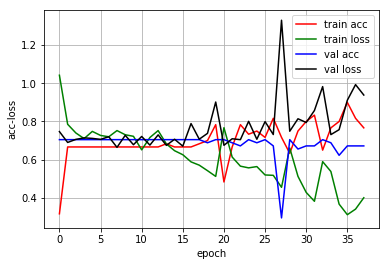

In [55]:
matrix_label09 = np.array(matrix_label)[:,24:27]
print(matrix_label09[:5])
print(len(matrix_label09))

model_09 = Sequential()
model_09.add(Dense(units=256, activation='relu', input_dim=len(list_vecOfNodeText[0])))
model_09.add(Dense(units=128, activation='relu'))
model_09.add(Dense(units=64, activation='relu'))
model_09.add(Dense(units=len(list_NODEVALUE), activation='sigmoid'))

model_09.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

print(model_09.summary())


check_point_09 = keras.callbacks.ModelCheckpoint('./CheckPoint/extract_feature_model09_checkpoint.hdf5', monitor='val_loss', verbose=0,                                               
                                                 save_best_only=True, save_weights_only=False, mode='auto', period=1)
early_stop_09 = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=30, verbose=0,
                              mode='auto', baseline=None, restore_best_weights=True)
#创建一个实例history
history_09 = LossHistory()
callbacks_09 = [check_point_09, early_stop_09,history_09]

model_09.fit(np.array(list_vecOfNodeText), matrix_label09, epochs=10000, batch_size=32,callbacks=callbacks_09, validation_split=0.5)

score_09 = model_09.evaluate(np.array(list_vecOfNodeText), matrix_label09, verbose=0)
print('Test score:', score_09[0])
print('Test accuracy:', score_09[1])

#绘制acc-loss曲线
history_09.loss_plot('epoch')

[[0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]]
121
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_125 (Dense)            (None, 256)               196864    
_________________________________________________________________
dense_126 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_127 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_128 (Dense)            (None, 3)                 195       
Total params: 238,211
Trainable params: 238,211
Non-trainable params: 0
_________________________________________________________________
None
Train on 60 samples, validate on 61 samples
Epoch 1/10000
60/60 [==============================] - 1s 24ms/step - loss: 1.0976 - acc: 0.4333 - val_loss: 0.9507 - val_acc: 0.5902
Epoch 2/10000
60/60 [==============

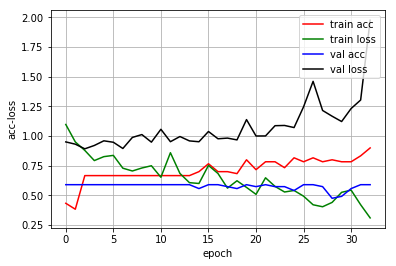

In [54]:
matrix_label010 = np.array(matrix_label)[:,27:30]
print(matrix_label010[:5])
print(len(matrix_label010))

model_010 = Sequential()
model_010.add(Dense(units=256, activation='relu', input_dim=len(list_vecOfNodeText[0])))
model_010.add(Dense(units=128, activation='relu'))
model_010.add(Dense(units=64, activation='relu'))
model_010.add(Dense(units=len(list_NODEVALUE), activation='sigmoid'))

model_010.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

print(model_010.summary())


check_point_010 = keras.callbacks.ModelCheckpoint('./CheckPoint/extract_feature_model010_checkpoint.hdf5', monitor='val_loss', verbose=0,                                               
                                                 save_best_only=True, save_weights_only=False, mode='auto', period=1)
early_stop_010 = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=30, verbose=0,
                              mode='auto', baseline=None, restore_best_weights=True)
#创建一个实例history
history_010 = LossHistory()
callbacks_010 = [check_point_010, early_stop_010,history_010]

model_010.fit(np.array(list_vecOfNodeText), matrix_label010, epochs=10000, batch_size=32,
              callbacks=callbacks_010, validation_split=0.5)

score_010 = model_010.evaluate(np.array(list_vecOfNodeText), matrix_label010, verbose=0)
print('Test score:', score_010[0])
print('Test accuracy:', score_010[1])

#绘制acc-loss曲线
history_010.loss_plot('epoch')

[[0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]]
121
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_121 (Dense)            (None, 256)               196864    
_________________________________________________________________
dense_122 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_123 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_124 (Dense)            (None, 3)                 195       
Total params: 238,211
Trainable params: 238,211
Non-trainable params: 0
_________________________________________________________________
None
Train on 60 samples, validate on 61 samples
Epoch 1/10000
60/60 [==============================] - 1s 23ms/step - loss: 1.1678 - acc: 0.3500 - val_loss: 0.9706 - val_acc: 0.3443
Epoch 2/10000
60/60 [==============

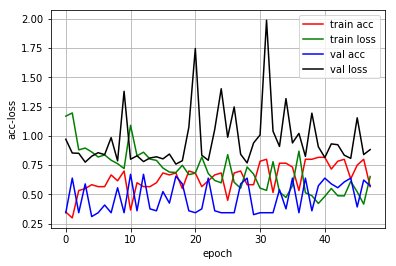

In [53]:
matrix_label011 = np.array(matrix_label)[:,30:33]
print(matrix_label011[:5])
print(len(matrix_label011))

model_011 = Sequential()
model_011.add(Dense(units=256, activation='relu', input_dim=len(list_vecOfNodeText[0])))
model_011.add(Dense(units=128, activation='relu'))
model_011.add(Dense(units=64, activation='relu'))
model_011.add(Dense(units=len(list_NODEVALUE), activation='sigmoid'))

model_011.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

print(model_011.summary())


check_point_011 = keras.callbacks.ModelCheckpoint('./CheckPoint/extract_feature_model011_checkpoint.hdf5', monitor='val_loss', verbose=0,                                               
                                                 save_best_only=True, save_weights_only=False, mode='auto', period=1)
early_stop_011 = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=30, verbose=0,
                              mode='auto', baseline=None, restore_best_weights=True)
#创建一个实例history
history_011 = LossHistory()
callbacks_011 = [check_point_011, early_stop_011,history_011]

model_011.fit(np.array(list_vecOfNodeText), matrix_label011, epochs=10000,
              batch_size=32,callbacks=callbacks_011, validation_split=0.5)

score_011 = model_011.evaluate(np.array(list_vecOfNodeText), matrix_label011, verbose=0)
print('Test score:', score_011[0])
print('Test accuracy:', score_011[1])

#绘制acc-loss曲线
history_011.loss_plot('epoch')

[[0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]]
121
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_145 (Dense)            (None, 256)               196864    
_________________________________________________________________
dense_146 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_147 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_148 (Dense)            (None, 3)                 195       
Total params: 238,211
Trainable params: 238,211
Non-trainable params: 0
_________________________________________________________________
None
Train on 60 samples, validate on 61 samples
Epoch 1/10000
60/60 [==============================] - 2s 27ms/step - loss: 1.1132 - acc: 0.3167 - val_loss: 1.1153 - val_acc: 0.4262
Epoch 2/10000
60/60 [==============

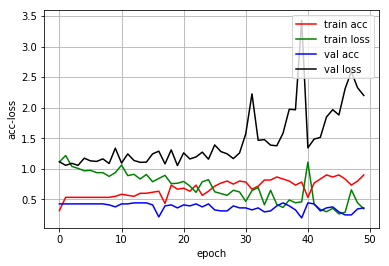

[[0.15218154 0.6919149  0.5060963 ]
 [0.1768821  0.64651155 0.5544338 ]
 [0.11258116 0.71791923 0.41529483]
 [0.12863337 0.74796563 0.73534316]
 [0.14088796 0.6820287  0.6581214 ]
 [0.18056907 0.67268705 0.7290096 ]
 [0.32030052 0.6558042  0.76567   ]
 [0.25268897 0.6404826  0.8087782 ]
 [0.1915761  0.6459974  0.77194065]
 [0.20213354 0.6495221  0.8094431 ]
 [0.08002901 0.7478571  0.5850751 ]
 [0.8578162  0.14786887 0.27847904]
 [0.19531843 0.68307054 0.55938196]
 [0.27618006 0.5283616  0.80333585]
 [0.1576448  0.685083   0.63231015]
 [0.1497088  0.7034229  0.7361852 ]
 [0.26794457 0.6835237  0.6812565 ]
 [0.2906698  0.5629446  0.5858417 ]
 [0.246771   0.663011   0.7530465 ]
 [0.11547062 0.76891637 0.6460975 ]
 [0.2412233  0.5426179  0.69022834]
 [0.06242085 0.7682292  0.47598872]
 [0.10478849 0.6830602  0.45290077]
 [0.38826722 0.49353626 0.73449856]
 [0.11394759 0.7000441  0.6363101 ]
 [0.77567184 0.24778135 0.3501065 ]
 [0.21924958 0.5576437  0.8064883 ]
 [0.21262453 0.6497328  0.68

In [59]:
matrix_label012 = np.array(matrix_label)[:,33:36]
print(matrix_label012[:5])
print(len(matrix_label012))

model_012 = Sequential()
model_012.add(Dense(units=256, activation='relu', input_dim=len(list_vecOfNodeText[0])))
model_012.add(Dense(units=128, activation='relu'))
model_012.add(Dense(units=64, activation='relu'))
model_012.add(Dense(units=len(list_NODEVALUE), activation='sigmoid'))

model_012.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

print(model_012.summary())


check_point_012 = keras.callbacks.ModelCheckpoint('./CheckPoint/extract_feature_model012_checkpoint.hdf5', monitor='val_loss', verbose=0,                                               
                                                 save_best_only=True, save_weights_only=False, mode='auto', period=1)
early_stop_012 = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=30, verbose=0,
                              mode='auto', baseline=None, restore_best_weights=True)
#创建一个实例history
history_012 = LossHistory()
callbacks_012 = [check_point_012, early_stop_012,history_012]

model_012.fit(np.array(list_vecOfNodeText), matrix_label012, epochs=10000, batch_size=32,
              callbacks=callbacks_012, validation_split=0.5)

score_012 = model_012.evaluate(np.array(list_vecOfNodeText), matrix_label012, verbose=0)
print('Test score:', score_012[0])
print('Test accuracy:', score_012[1])

#绘制acc-loss曲线
history_012.loss_plot('epoch')

predict_012 = model_012.predict(np.array(list_vecOfNodeText))
print(predict_012)
print(matrix_label012)

[[0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]]
121
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_101 (Dense)            (None, 256)               196864    
_________________________________________________________________
dense_102 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_103 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_104 (Dense)            (None, 3)                 195       
Total params: 238,211
Trainable params: 238,211
Non-trainable params: 0
_________________________________________________________________
None
Train on 60 samples, validate on 61 samples
Epoch 1/10000
60/60 [==============================] - 1s 20ms/step - loss: 1.0049 - acc: 0.4667 - val_loss: 0.9359 - val_acc: 0.4098
Epoch 2/10000
60/60 [==============

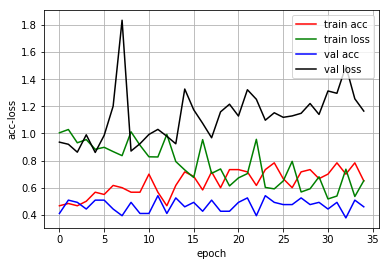

In [48]:
## matrix_label013 = np.array(matrix_label)[:,36:39]
print(matrix_label013[:5])
print(len(matrix_label013))

# X_train, X_test, y_train, y_test = train_test_split(np.array(list_vecOfNodeText), matrix_label013, test_size=0.33, random_state=42)

model_013 = Sequential()
model_013.add(Dense(units=256, activation='relu', input_dim=len(list_vecOfNodeText[0])))
model_013.add(Dense(units=128, activation='relu'))
model_013.add(Dense(units=64, activation='relu'))
model_013.add(Dense(units=len(list_NODEVALUE), activation='sigmoid'))

model_013.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

print(model_013.summary())


check_point_013 = keras.callbacks.ModelCheckpoint('./CheckPoint/extract_feature_model013_checkpoint.hdf5', monitor='val_loss', verbose=0,                                               
                                                 save_best_only=True, save_weights_only=False, mode='auto', period=1)
early_stop_013 = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=30, verbose=0,
                              mode='auto', baseline=None, restore_best_weights=True)
#创建一个实例history
history_013 = LossHistory()
callbacks_013 = [check_point_013, early_stop_013,history_013]

model_013.fit(np.array(list_vecOfNodeText), matrix_label013, epochs=10000, 
              batch_size=32,callbacks=callbacks_013, validation_split=0.5)

score_013 = model_013.evaluate(np.array(list_vecOfNodeText), matrix_label013, verbose=0)
print('Test score:', score_013[0])
print('Test accuracy:', score_013[1])

#绘制acc-loss曲线
history_013.loss_plot('epoch')

[[0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]]
121
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_89 (Dense)             (None, 256)               196864    
_________________________________________________________________
dense_90 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_91 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_92 (Dense)             (None, 3)                 195       
Total params: 238,211
Trainable params: 238,211
Non-trainable params: 0
_________________________________________________________________
None
Train on 60 samples, validate on 61 samples
Epoch 1/10000
60/60 [==============================] - 1s 18ms/step - loss: 0.9687 - acc: 0.4333 - val_loss: 1.0105 - val_acc: 0.1311
Epoch 2/10000
60/60 [==============

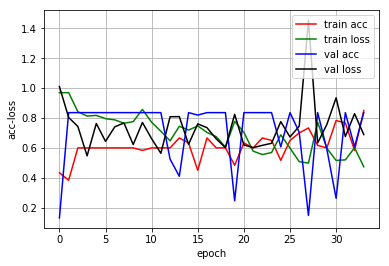

In [43]:
matrix_label014 = np.array(matrix_label)[:,39:42]
print(matrix_label014[:5])
print(len(matrix_label014))

model_014 = Sequential()
model_014.add(Dense(units=256, activation='relu', input_dim=len(list_vecOfNodeText[0])))
model_014.add(Dense(units=128, activation='relu'))
model_014.add(Dense(units=64, activation='relu'))
model_014.add(Dense(units=len(list_NODEVALUE), activation='sigmoid'))

model_014.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

print(model_014.summary())


check_point_014 = keras.callbacks.ModelCheckpoint('./CheckPoint/extract_feature_model014_checkpoint.hdf5', monitor='val_loss', verbose=0,                                               
                                                 save_best_only=True, save_weights_only=False, mode='auto', period=1)
early_stop_014 = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=30, verbose=0,
                              mode='auto', baseline=None, restore_best_weights=True)
#创建一个实例history
history_014 = LossHistory()
callbacks_014 = [check_point_014, early_stop_014, history_014]

model_014.fit(np.array(list_vecOfNodeText), matrix_label014, epochs=10000, batch_size=32,callbacks=callbacks_014, validation_split=0.5)

score_014 = model_014.evaluate(np.array(list_vecOfNodeText), matrix_label014, verbose=0)
print('Test score:', score_014[0])
print('Test accuracy:', score_014[1])

#绘制acc-loss曲线
history_014.loss_plot('epoch')

In [38]:
matrix_label015 = np.array(matrix_label)[:,42:45]
print(matrix_label015[:5])
print(len(matrix_label015))

model_015 = Sequential()
model_015.add(Dense(units=256, activation='relu', input_dim=len(list_vecOfNodeText[0])))
model_015.add(Dense(units=128, activation='relu'))
model_015.add(Dense(units=64, activation='relu'))
model_015.add(Dense(units=len(list_NODEVALUE), activation='sigmoid'))

model_015.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

print(model_015.summary())


check_point_015 = keras.callbacks.ModelCheckpoint('./CheckPoint/extract_feature_model015_checkpoint.hdf5', monitor='val_loss', verbose=0,                                               
                                                 save_best_only=True, save_weights_only=False, mode='auto', period=1)
early_stop_015 = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=30, verbose=0,
                              mode='auto', baseline=None, restore_best_weights=True)
callbacks_015 = [check_point_015, early_stop_015]

model_015.fit(np.array(list_vecOfNodeText), matrix_label015, epochs=10000, batch_size=32,
              callbacks=callbacks_015, validation_split=0.5)

# Epoch 2/10000
# 60/60 [==============================] - 0s 236us/step - loss: 0.6371 - acc: 0.8000 - val_loss: 0.5731 - val_acc: 0.8033

[[0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]]
121
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 256)               196864    
_________________________________________________________________
dense_78 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_79 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_80 (Dense)             (None, 3)                 195       
Total params: 238,211
Trainable params: 238,211
Non-trainable params: 0
_________________________________________________________________
None
Train on 60 samples, validate on 61 samples
Epoch 1/10000
60/60 [==============================] - 1s 17ms/step - loss: 0.7579 - acc: 0.7833 - val_loss: 0.7466 - val_acc: 0.8033
Epoch 2/10000
60/60 [==============

In [37]:
matrix_label016 = np.array(matrix_label)[:,45:48]
print(matrix_label016[:5])
print(len(matrix_label016))

model_016 = Sequential()
model_016.add(Dense(units=256, activation='relu', input_dim=len(list_vecOfNodeText[0])))
model_016.add(Dense(units=128, activation='relu'))
model_016.add(Dense(units=64, activation='relu'))
model_016.add(Dense(units=len(list_NODEVALUE), activation='sigmoid'))

model_016.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

print(model_016.summary())


check_point_016 = keras.callbacks.ModelCheckpoint('./CheckPoint/extract_feature_model016_checkpoint.hdf5', monitor='val_loss', verbose=0,                                               
                                                 save_best_only=True, save_weights_only=False, mode='auto', period=1)
early_stop_016 = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=30, verbose=0,
                              mode='auto', baseline=None, restore_best_weights=True)
callbacks_016 = [check_point_016, early_stop_016]

model_016.fit(np.array(list_vecOfNodeText), matrix_label016, epochs=10000, batch_size=32,
              callbacks=callbacks_016, validation_split=0.5)

# Epoch 32/10000
# 60/60 [==============================] - 0s 336us/step - loss: 0.2615 - acc: 0.8333 - val_loss: 0.5272 - val_acc: 0.8197

[[0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]]
121
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 256)               196864    
_________________________________________________________________
dense_74 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_75 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_76 (Dense)             (None, 3)                 195       
Total params: 238,211
Trainable params: 238,211
Non-trainable params: 0
_________________________________________________________________
None
Train on 60 samples, validate on 61 samples
Epoch 1/10000
60/60 [==============================] - 1s 16ms/step - loss: 1.0373 - acc: 0.4833 - val_loss: 0.6904 - val_acc: 0.7213
Epoch 2/10000
60/60 [==============

60/60 [==============================] - 0s 336us/step - loss: 0.6091 - acc: 0.7167 - val_loss: 0.5925 - val_acc: 0.8033
Epoch 55/10000
60/60 [==============================] - 0s 366us/step - loss: 0.1066 - acc: 0.9833 - val_loss: 0.6286 - val_acc: 0.8033
Epoch 56/10000
60/60 [==============================] - 0s 295us/step - loss: 0.0981 - acc: 0.9833 - val_loss: 0.6638 - val_acc: 0.8033
Epoch 57/10000
60/60 [==============================] - 0s 329us/step - loss: 0.0838 - acc: 0.9833 - val_loss: 0.6988 - val_acc: 0.8033
Epoch 58/10000
60/60 [==============================] - 0s 357us/step - loss: 0.0539 - acc: 1.0000 - val_loss: 0.6805 - val_acc: 0.7869
Epoch 59/10000
60/60 [==============================] - 0s 307us/step - loss: 0.0436 - acc: 1.0000 - val_loss: 0.7477 - val_acc: 0.7869
Epoch 60/10000
60/60 [==============================] - 0s 368us/step - loss: 0.0362 - acc: 1.0000 - val_loss: 0.7421 - val_acc: 0.7541
Epoch 61/10000
60/60 [==============================] - 0s 328u

# 分特征模型后进行层次二分类，先分是否提及，再在提及里分有无

In [72]:
# matrix_label012 = np.array(matrix_label)[:,33:36]
# print(matrix_label012[:5])
# print(len(matrix_label012))

matrix_label012_mentioned = matrix_label012[:,2]
matrix_label012_exist = np.array(list(filter(lambda x: x[2] != 1, matrix_label012)))[:,0]
list_vecOfNodeText_exist = []
for i in range(len(list_vecOfNodeText)):
    if matrix_label012[i][2] == 0:
        list_vecOfNodeText_exist.append(list_vecOfNodeText[i])
print(len(matrix_label012_mentioned))
print(len(matrix_label012_exist))
print(len(list_vecOfNodeText_exist))

121
84
84


Train on 60 samples, validate on 61 samples
Epoch 1/1000
60/60 [==============================] - 2s 35ms/step - loss: 0.9294 - acc: 0.4000 - val_loss: 0.6660 - val_acc: 0.6230
Epoch 2/1000
60/60 [==============================] - 0s 262us/step - loss: 0.5911 - acc: 0.7667 - val_loss: 0.6640 - val_acc: 0.6230
Epoch 3/1000
60/60 [==============================] - 0s 347us/step - loss: 0.5268 - acc: 0.7667 - val_loss: 0.8378 - val_acc: 0.6230
Epoch 4/1000
60/60 [==============================] - 0s 398us/step - loss: 0.5212 - acc: 0.7667 - val_loss: 0.6794 - val_acc: 0.6230
Epoch 5/1000
60/60 [==============================] - 0s 468us/step - loss: 0.4939 - acc: 0.7667 - val_loss: 0.7785 - val_acc: 0.6230
Epoch 6/1000
60/60 [==============================] - 0s 332us/step - loss: 0.5079 - acc: 0.7667 - val_loss: 0.8339 - val_acc: 0.6230
Epoch 7/1000
60/60 [==============================] - 0s 461us/step - loss: 0.5678 - acc: 0.7500 - val_loss: 0.8486 - val_acc: 0.6230
Epoch 8/1000
60/60 

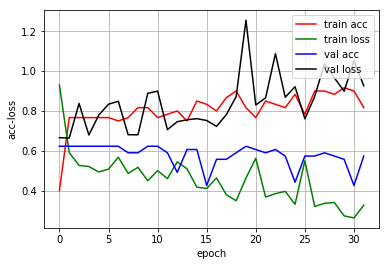

[[0.3489658 ]
 [0.3583489 ]
 [0.349656  ]
 [0.3649932 ]
 [0.34062085]
 [0.35330594]
 [0.35120586]
 [0.3957525 ]
 [0.41004544]
 [0.40963125]
 [0.33015326]
 [0.39221874]
 [0.32946357]
 [0.44034323]
 [0.35834056]
 [0.3554534 ]
 [0.35312438]
 [0.34890598]
 [0.38017604]
 [0.340022  ]
 [0.37802467]
 [0.32462475]
 [0.35487345]
 [0.39381254]
 [0.34646252]
 [0.35128313]
 [0.4691606 ]
 [0.3493511 ]
 [0.34257331]
 [0.33674005]
 [0.35946146]
 [0.3484675 ]
 [0.37876943]
 [0.35313752]
 [0.37458527]
 [0.35342973]
 [0.36407185]
 [0.3459182 ]
 [0.44572952]
 [0.35165796]
 [0.3399192 ]
 [0.34706712]
 [0.35731253]
 [0.3534847 ]
 [0.39186284]
 [0.38426033]
 [0.34919158]
 [0.35907647]
 [0.35193413]
 [0.39204225]
 [0.3540402 ]
 [0.35060748]
 [0.3785313 ]
 [0.3873295 ]
 [0.32907432]
 [0.3469453 ]
 [0.38415653]
 [0.3455431 ]
 [0.3465317 ]
 [0.35315204]
 [0.35053933]
 [0.38490924]
 [0.37019622]
 [0.34058803]
 [0.38553238]
 [0.35403562]
 [0.35623854]
 [0.3317537 ]
 [0.35907838]
 [0.34963372]
 [0.37819183]
 [0.35

In [69]:
model_012_mentioned = Sequential()
model_012_mentioned.add(Dense(units=256, activation='relu', input_dim=len(list_vecOfNodeText[0])))
model_012_mentioned.add(Dense(units=128, activation='relu'))
model_012_mentioned.add(Dense(units=64, activation='relu'))
model_012_mentioned.add(Dense(units=1, activation='sigmoid'))

model_012_mentioned.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

print(model_012_mentioned.summary())

check_point_012_mentioned = keras.callbacks.ModelCheckpoint('./CheckPoint/extract_feature_model012_mentioned_checkpoint.hdf5', monitor='val_loss', verbose=0,                                               
                                                 save_best_only=True, save_weights_only=False, mode='auto', period=1)
early_stop_012_mentioned = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=30, verbose=0,
                              mode='auto', baseline=None, restore_best_weights=True)
#创建一个实例history
history_012_mentioned = LossHistory()
callbacks_012_mentioned = [check_point_012_mentioned, early_stop_012_mentioned,history_012_mentioned]
model_012_mentioned.fit(np.array(list_vecOfNodeText), matrix_label012_mentioned, epochs=1000, batch_size=32,
              callbacks=callbacks_012_mentioned, validation_split=0.5)

score_012_mentioned = model_012_mentioned.evaluate(np.array(list_vecOfNodeText), matrix_label012_mentioned, verbose=0)
print('Test score:', score_012_mentioned[0])
print('Test accuracy:', score_012_mentioned[1])

#绘制acc-loss曲线
history_012_mentioned.loss_plot('epoch')

predict_012_mentioned = model_012_mentioned.predict(np.array(list_vecOfNodeText))
print(predict_012_mentioned)
print(matrix_label012_mentioned)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_173 (Dense)            (None, 256)               196864    
_________________________________________________________________
dense_174 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_175 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_176 (Dense)            (None, 1)                 65        
Total params: 238,081
Trainable params: 238,081
Non-trainable params: 0
_________________________________________________________________
None
Train on 42 samples, validate on 42 samples
Epoch 1/1000
42/42 [==============================] - 2s 51ms/step - loss: 0.6748 - acc: 0.6429 - val_loss: 0.6601 - val_acc: 0.6429
Epoch 2/1000
42/42 [==============================] - 0s 348us/step - loss: 0.6598 - a

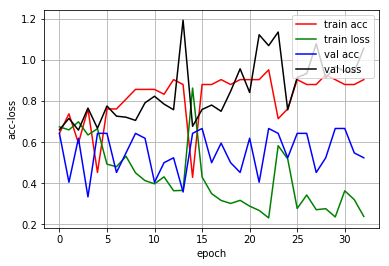

[[0.35139483]
 [0.35945642]
 [0.34952328]
 [0.3515773 ]
 [0.36784887]
 [0.39012614]
 [0.41222516]
 [0.36486384]
 [0.59597105]
 [0.36566347]
 [0.36495444]
 [0.37221405]
 [0.37561947]
 [0.3855561 ]
 [0.3827426 ]
 [0.31466433]
 [0.33271366]
 [0.50130117]
 [0.36905944]
 [0.35617802]
 [0.3513975 ]
 [0.3393752 ]
 [0.3474828 ]
 [0.42241704]
 [0.36383307]
 [0.34552532]
 [0.37343854]
 [0.36947453]
 [0.36319417]
 [0.33457407]
 [0.39050987]
 [0.3914734 ]
 [0.36625215]
 [0.34368283]
 [0.41785434]
 [0.44648793]
 [0.38290074]
 [0.48072958]
 [0.40106958]
 [0.40444437]
 [0.320298  ]
 [0.36066714]
 [0.4462277 ]
 [0.34047332]
 [0.3903008 ]
 [0.36166573]
 [0.37169495]
 [0.342319  ]
 [0.34488338]
 [0.37504235]
 [0.3942785 ]
 [0.362565  ]
 [0.38214615]
 [0.41216108]
 [0.38057658]
 [0.4051026 ]
 [0.40914717]
 [0.3588294 ]
 [0.35973167]
 [0.40676677]
 [0.37570935]
 [0.41634297]
 [0.38848078]
 [0.3904323 ]
 [0.37554908]
 [0.5101306 ]
 [0.41300124]
 [0.39697665]
 [0.39338157]
 [0.39017463]
 [0.38116854]
 [0.40

In [77]:
model_012_exist = Sequential()
model_012_exist.add(Dense(units=256, activation='relu', input_dim=len(list_vecOfNodeText[0])))
model_012_exist.add(Dense(units=128, activation='relu'))
model_012_exist.add(Dense(units=64, activation='relu'))
model_012_exist.add(Dense(units=1, activation='sigmoid'))

model_012_exist.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

print(model_012_exist.summary())

check_point_012_exist = keras.callbacks.ModelCheckpoint('./CheckPoint/extract_feature_model012_exist_checkpoint.hdf5', monitor='val_loss', verbose=0,                                               
                                                 save_best_only=True, save_weights_only=False, mode='auto', period=1)
early_stop_012_exist = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=30, verbose=0,
                              mode='auto', baseline=None, restore_best_weights=True)
#创建一个实例history
history_012_exist = LossHistory()
callbacks_012_exist = [check_point_012_exist, early_stop_012_exist,history_012_exist]
model_012_exist.fit(np.array(list_vecOfNodeText_exist), matrix_label012_exist, epochs=1000, batch_size=32,
              callbacks=callbacks_012_exist, validation_split=0.5)

score_012_exist = model_012_exist.evaluate(np.array(list_vecOfNodeText_exist), matrix_label012_exist, verbose=0)
print('Test score:', score_012_exist[0])
print('Test accuracy:', score_012_exist[1])

#绘制acc-loss曲线
history_012_exist.loss_plot('epoch')

predict_012_exist = model_012_exist.predict(np.array(list_vecOfNodeText_exist))
print(predict_012_exist)
print(matrix_label012_exist)